In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras import datasets

In [3]:
fashion_datset=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_datset.load_data()
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


Text(0.5, 0, 'Ankle boot')

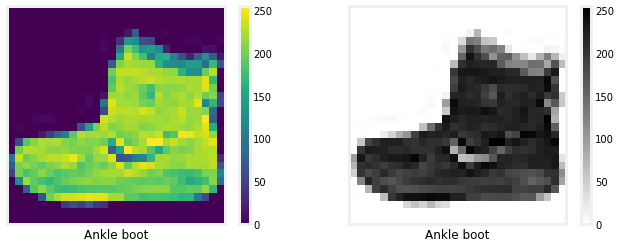

In [5]:
i=0
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[i]])
plt.subplot(1,2,2)
plt.imshow(train_images[i],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[i]])

In [6]:
train_images=train_images/255
test_images=test_images/255

Text(0.5, 0, 'T-shirt/top')

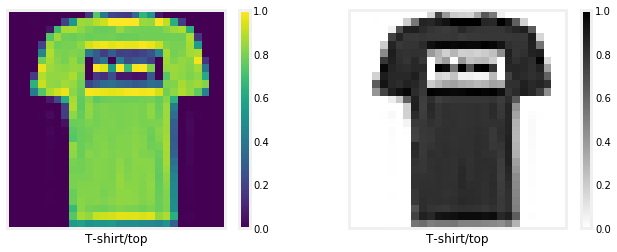

In [7]:
i=1
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[i]])
plt.subplot(1,2,2)
plt.imshow(train_images[i],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel(class_name[train_labels[i]])

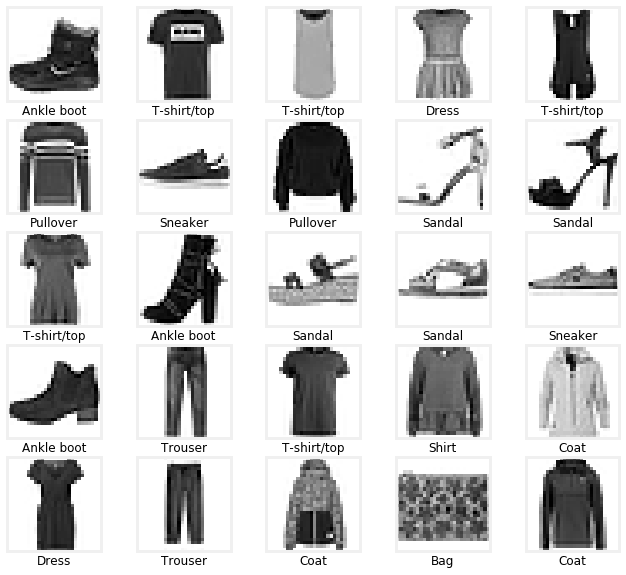

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
train_labels1=to_categorical(train_labels)
test_labels1=to_categorical(test_labels)

In [11]:
train_labels1.shape

(60000, 10)

In [12]:
train_images=train_images.reshape(60000,28,28,1)
test_images=test_images.reshape(10000,28,28,1)

In [13]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
def createmodel(optimizer="adam",loss="categorical_crossentropy"):
    model=Sequential()
    model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    model.compile(optimizer=optimizer,loss=loss,metrics=["accuracy"])
    return model
model=createmodel()

In [15]:
callbacks=EarlyStopping(monitor="val_loss",mode="min",patience=5)

In [16]:
model.fit(x=train_images,y=train_labels1,
         validation_data=(test_images,test_labels1),
         epochs=20,callbacks=[callbacks])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 36s 598us/sample - loss: 0.4116 - accuracy: 0.8542 - val_loss: 0.3344 - val_accuracy: 0.8812
Epoch 2/20
60000/60000 [==============================] - 32s 529us/sample - loss: 0.2849 - accuracy: 0.8957 - val_loss: 0.2947 - val_accuracy: 0.8905
Epoch 3/20
60000/60000 [==============================] - 32s 528us/sample - loss: 0.2393 - accuracy: 0.9104 - val_loss: 0.2939 - val_accuracy: 0.8963
Epoch 4/20
60000/60000 [==============================] - 34s 567us/sample - loss: 0.2064 - accuracy: 0.9233 - val_loss: 0.2623 - val_accuracy: 0.9042
Epoch 5/20
60000/60000 [==============================] - 34s 564us/sample - loss: 0.1782 - accuracy: 0.9330 - val_loss: 0.2605 - val_accuracy: 0.9063
Epoch 6/20
60000/60000 [==============================] - 34s 573us/sample - loss: 0.1570 - accuracy: 0.9413 - val_loss: 0.2602 - val_accuracy: 0.9124
Epoch 7/20
60000/60000 [====================

In [17]:
loss=pd.DataFrame(model.history.history)
loss.tail()

loss  accuracy  val_loss  val_accuracy
6   0.133624  0.950467  0.280086        0.9088
7   0.117968  0.955800  0.274807        0.9098
8   0.100984  0.962850  0.298027        0.9082
9   0.086013  0.968083  0.301936        0.9132
10  0.077802  0.970483  0.318424        0.9139

<Figure size 720x432 with 0 Axes>

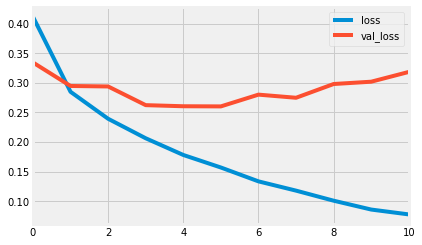

In [18]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

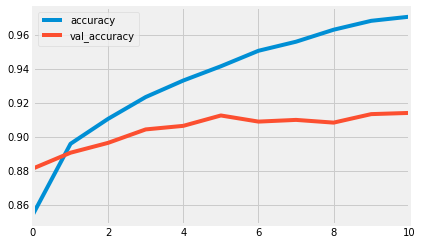

In [19]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [20]:
y_pred=model.predict_classes(test_images)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# analysing the results
print(confusion_matrix(test_labels,y_pred))
print(classification_report(test_labels,y_pred))
print(accuracy_score(test_labels,y_pred))

[[857   1  10  14   4   1 111   0   2   0]
 [  3 986   0   5   1   0   4   0   1   0]
 [ 21   0 823   7  75   0  74   0   0   0]
 [ 19   4   5 927  21   0  22   0   2   0]
 [  2   1  35  20 894   0  47   0   1   0]
 [  0   0   0   0   0 977   0  15   0   8]
 [ 84   1  40  24  76   0 768   0   7   0]
 [  0   0   0   0   0   9   0 974   0  17]
 [  5   1   2   3   1   2   3   3 979   1]
 [  0   0   0   0   0   7   0  38   1 954]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.82      0.86      1000
           3       0.93      0.93      0.93      1000
           4       0.83      0.89      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.77      0.76      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97     

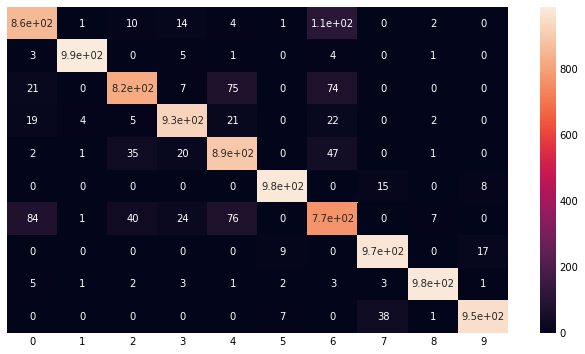

In [22]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_labels,y_pred),annot=True,yticklabels=False)

In [23]:
from tensorflow.keras.models import model_from_json

In [24]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

In [25]:
json_file=open("model.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

In [26]:
loaded_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [27]:
scores=loaded_model.evaluate(test_images,test_labels1)
print(loaded_model.metrics_names[1],scores[1]*100)

10000/10000 [==============================] - 2s 176us/sample - loss: 0.3184 - accuracy: 0.9139
accuracy 91.39000177383423


In [28]:
y_pred=model.predict_classes(test_images)
y=test_labels
y_pred_prob=model.predict_proba(test_images)

In [29]:
wrong_predictions=[]
for i in range(10000):
    if(y[i]!=y_pred[i]):
        wrong_predictions.append(i)
wrong_predictions[0:10]

[17, 23, 26, 40, 42, 49, 67, 68, 74, 98]

In [30]:
def plottingphoto(number):
    yp=y_pred[number]
    yo=test_labels[number]
    if yp==yo:
        color="blue"
    else:
        color="red"
    plt.imshow(test_images[number].reshape(28,28))
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlabel(class_name[yp]+" "+str(round(np.max(y_pred_prob[number])*100,2))+" %",color=color)

In [31]:
def plottingbargraph(number):
    yp=y_pred[number]
    yo=test_labels[number]
    barplot=plt.bar(range(10),y_pred_prob[number],color="black")
    if yp==yo:
        barplot[yp].set_color("blue")
    else:
        barplot[yp].set_color("red")

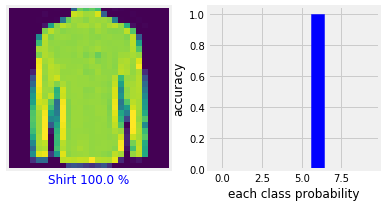

In [32]:
i=92
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plottingphoto(i)
plt.subplot(1,2,2)
plottingbargraph(i)
plt.ylabel("accuracy")
plt.xlabel("each class probability")
plt.show()

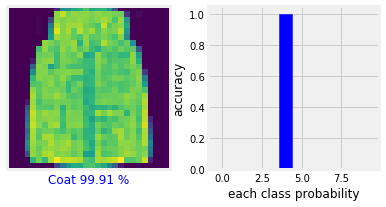

In [33]:
i=4589
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plottingphoto(i)
plt.subplot(1,2,2)
plottingbargraph(i)
plt.ylabel("accuracy")
plt.xlabel("each class probability")
plt.show()

In [34]:
print("Total wrong predictions "+ str(len(wrong_predictions)))

Total wrong predictions 861


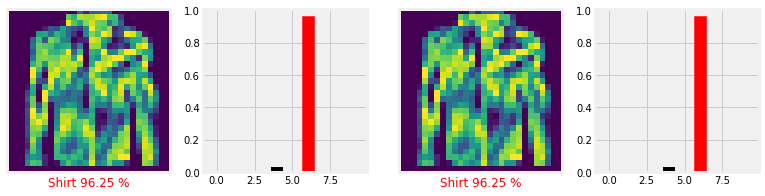

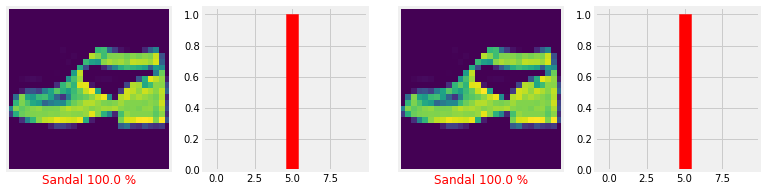

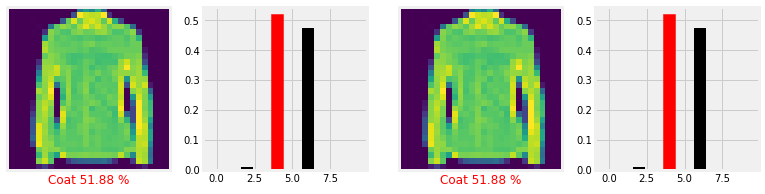

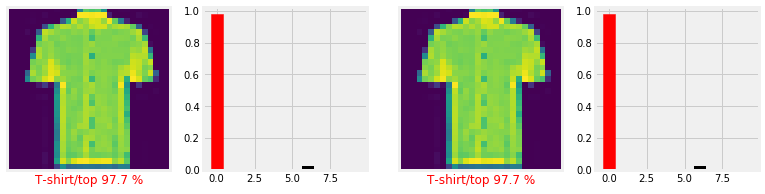

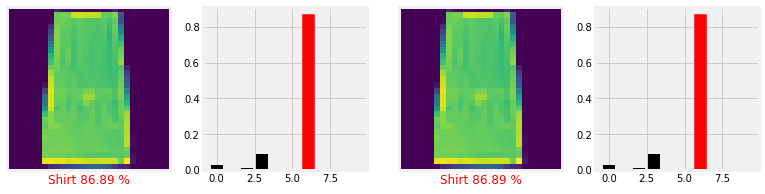

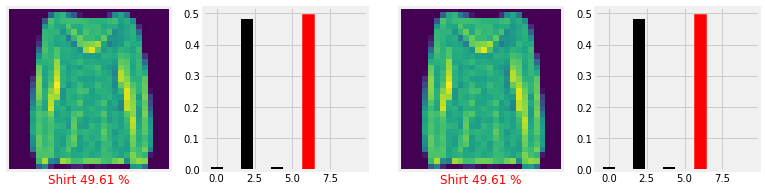

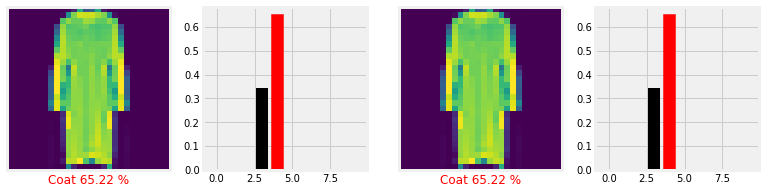

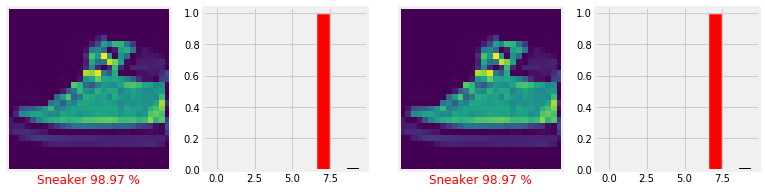

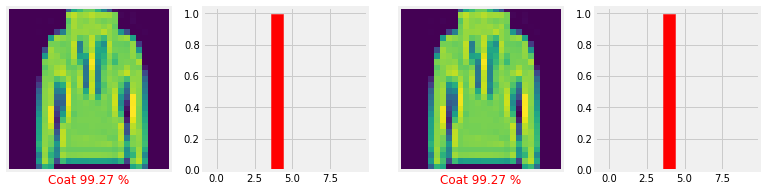

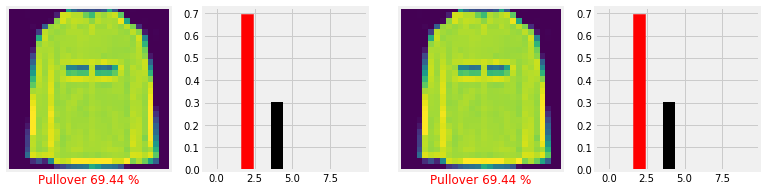

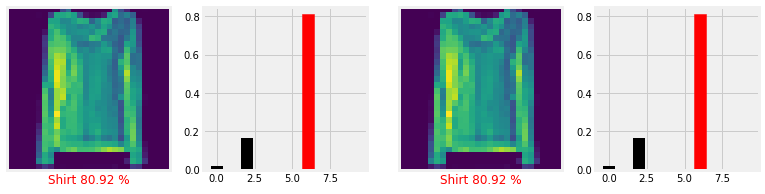

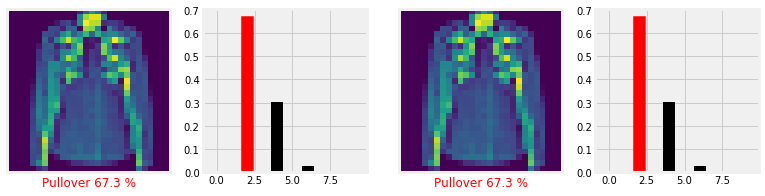

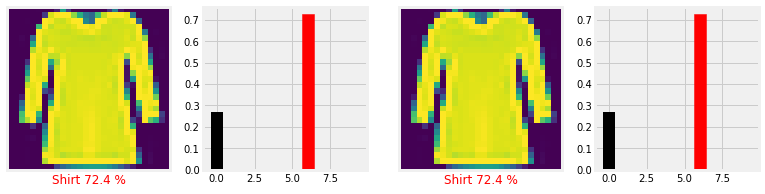

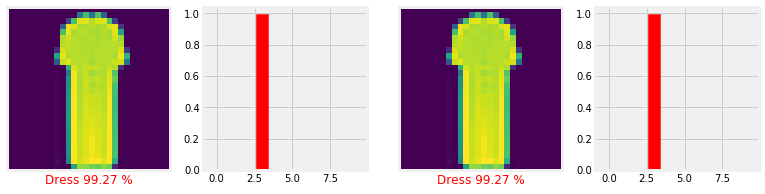

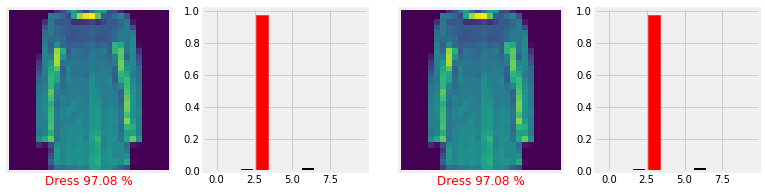

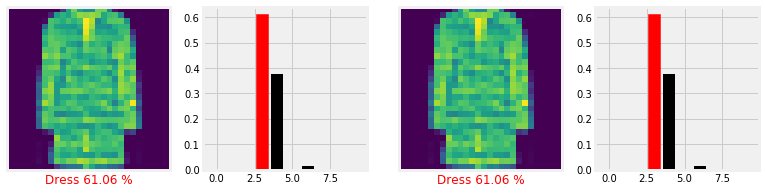

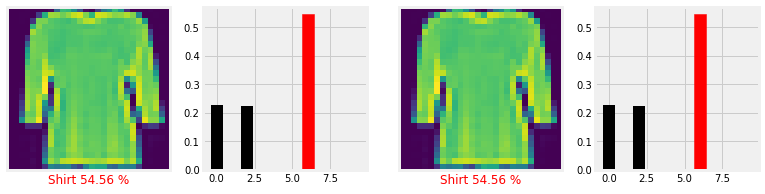

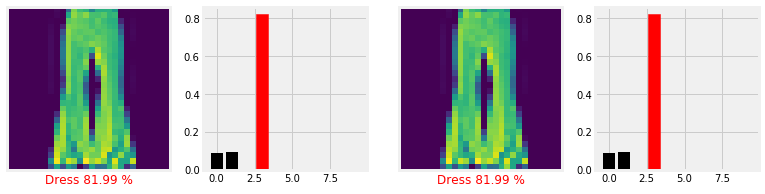

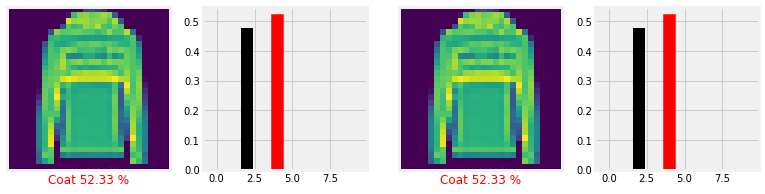

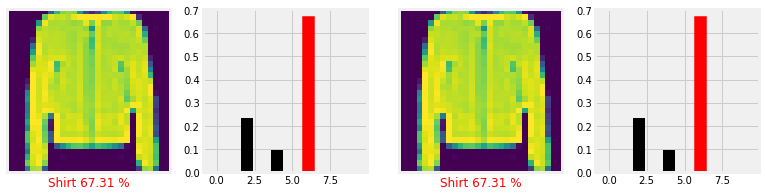

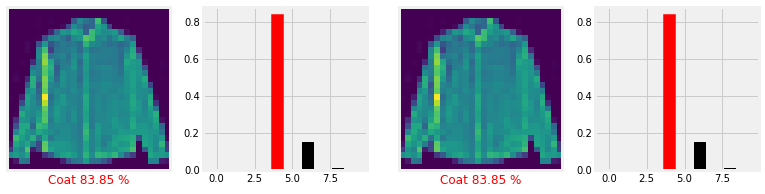

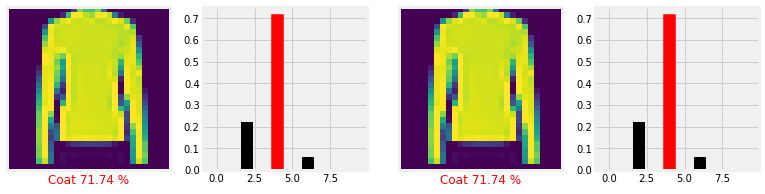

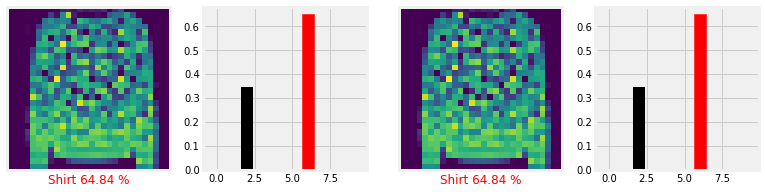

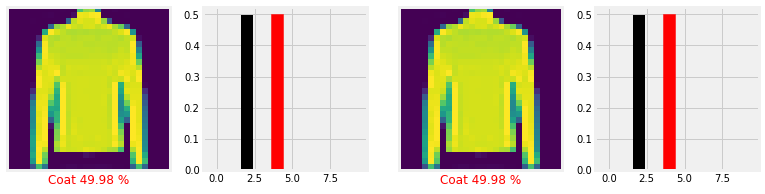

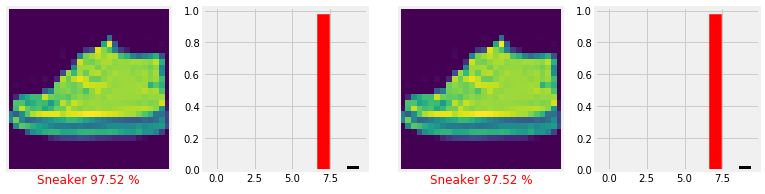

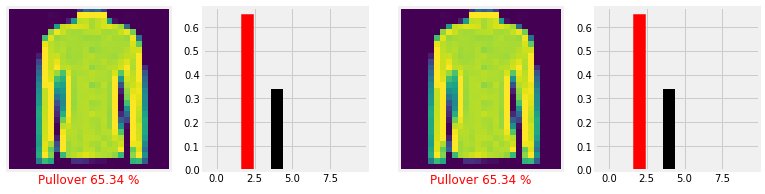

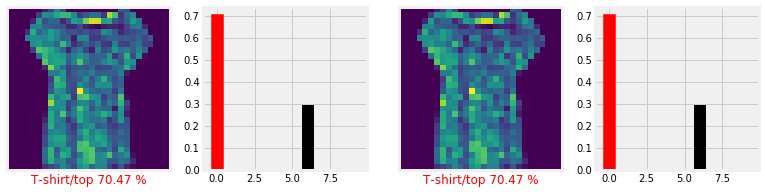

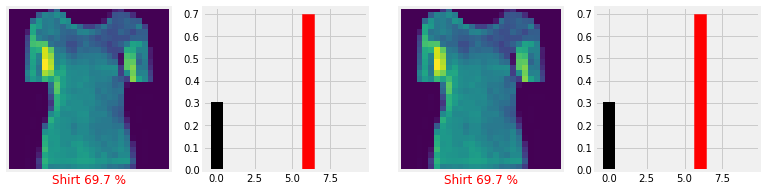

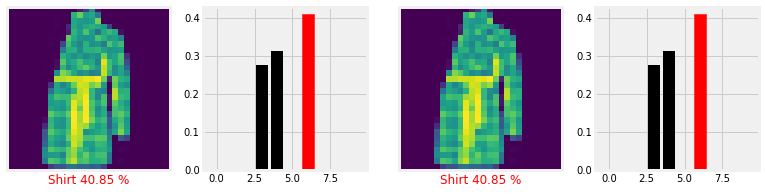

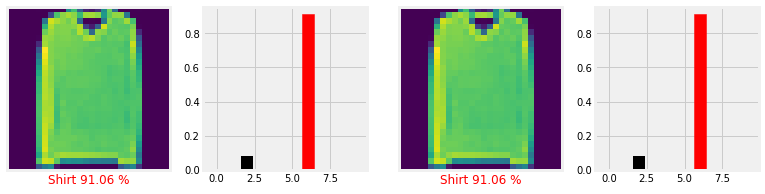

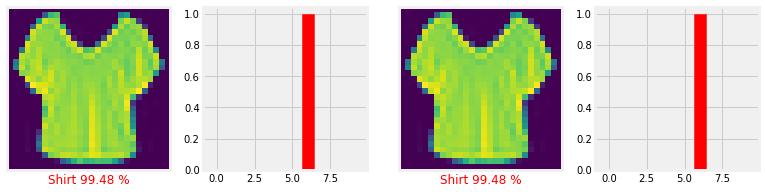

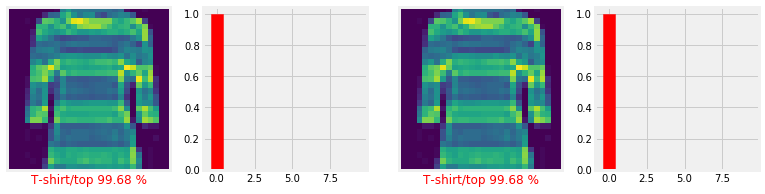

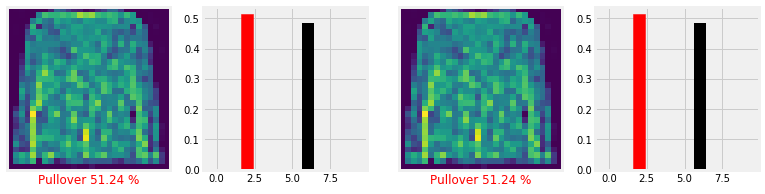

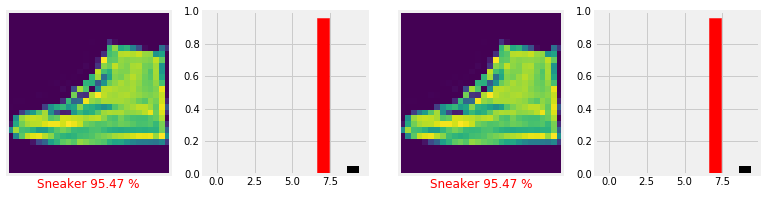

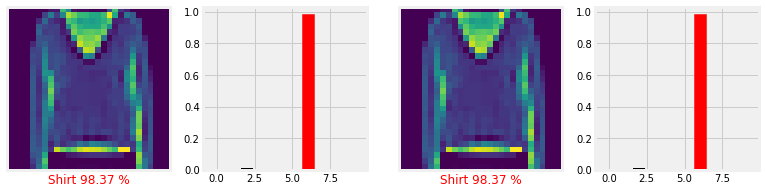

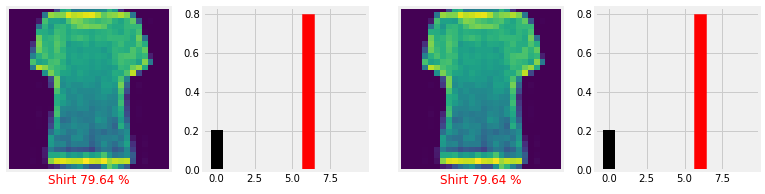

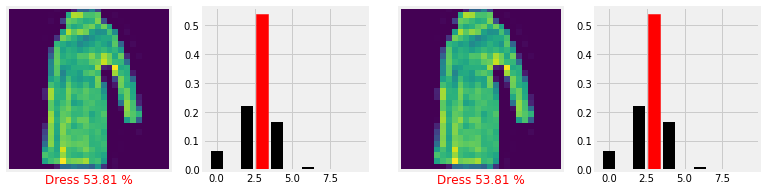

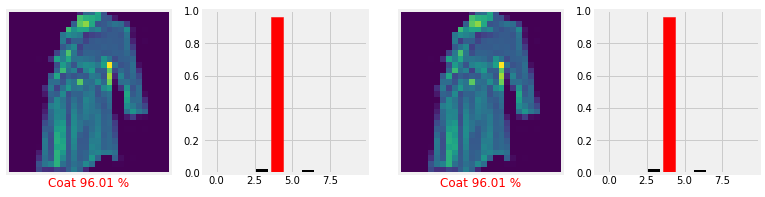

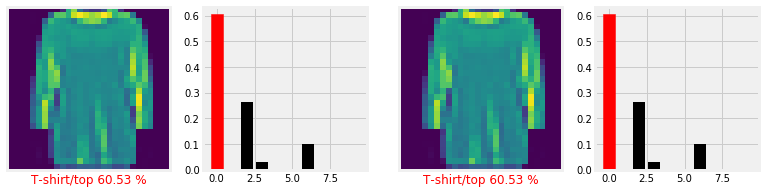

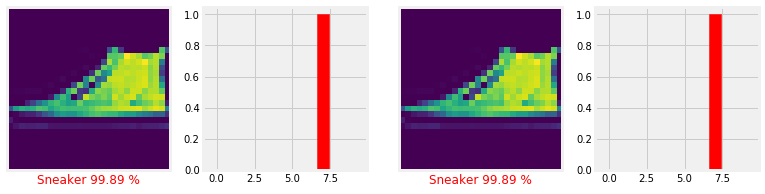

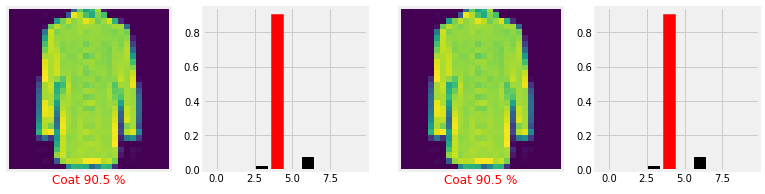

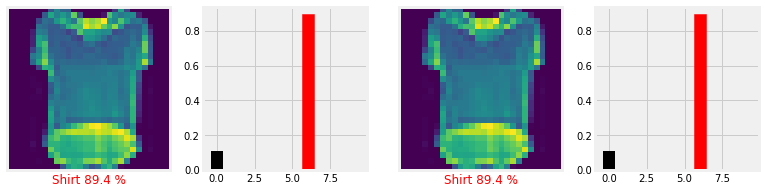

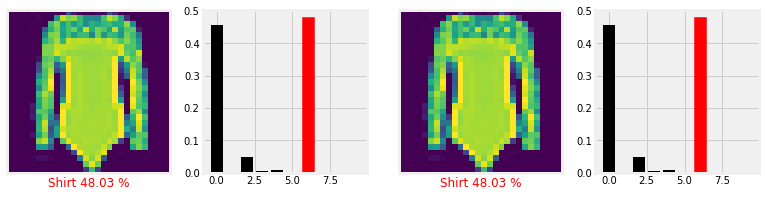

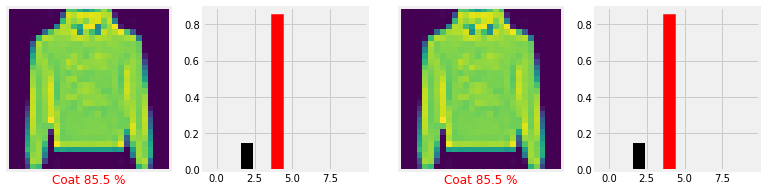

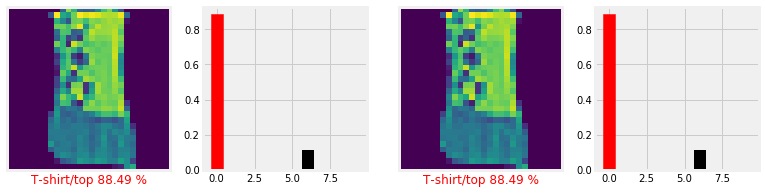

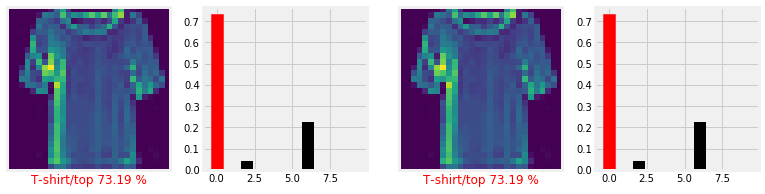

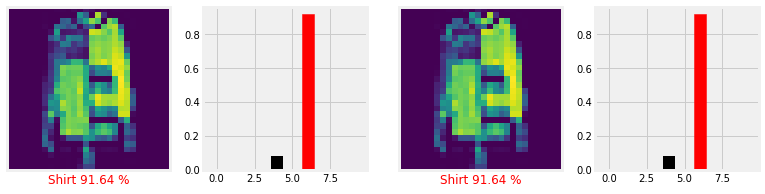

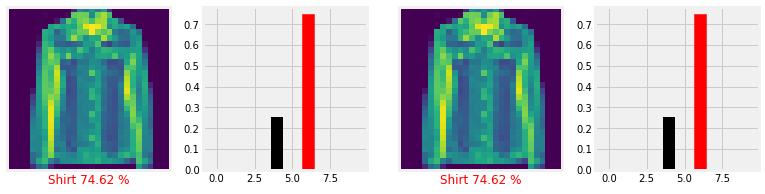

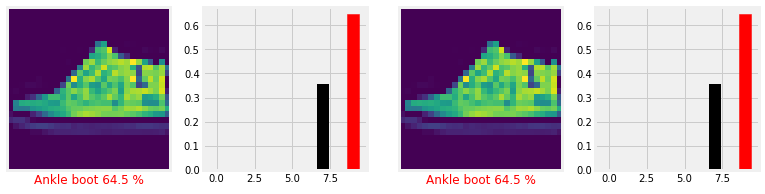

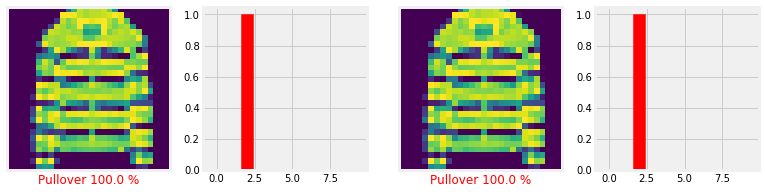

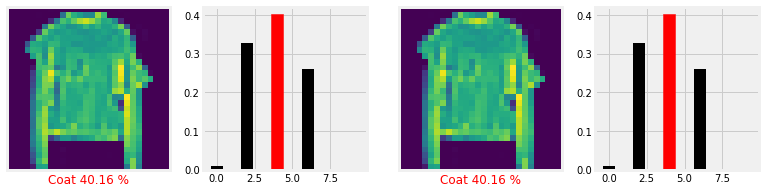

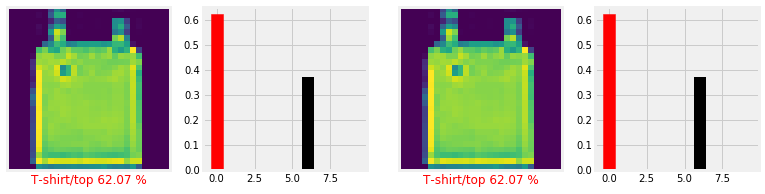

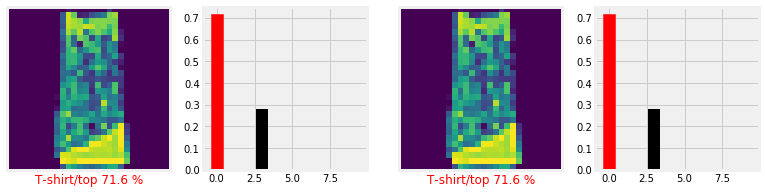

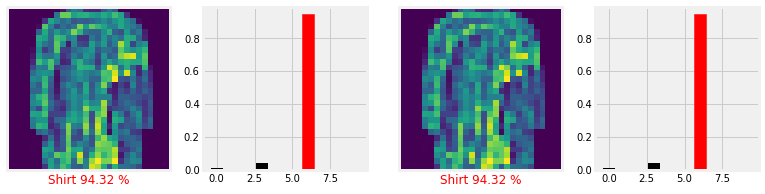

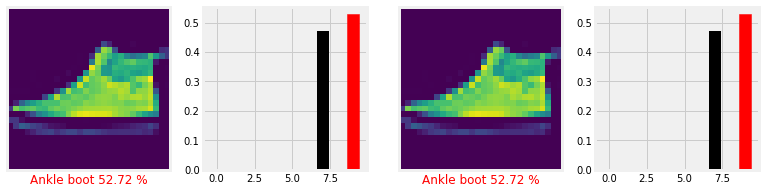

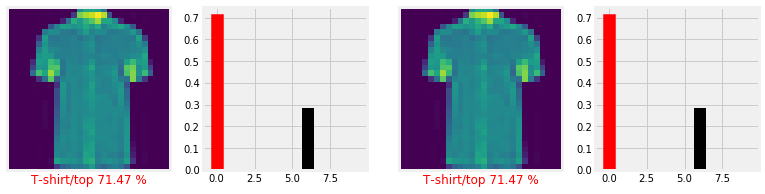

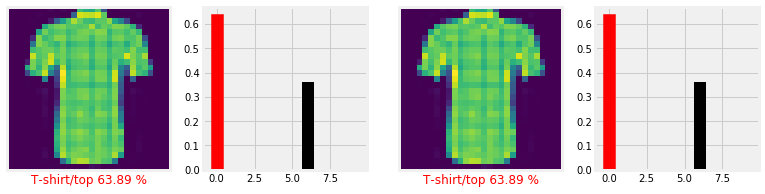

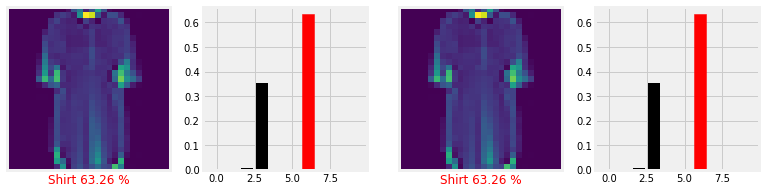

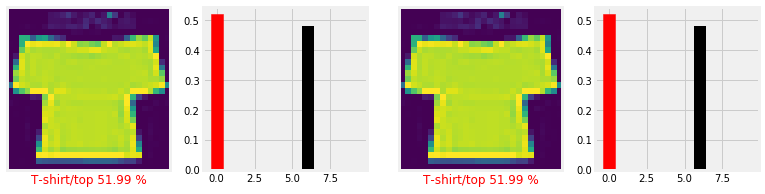

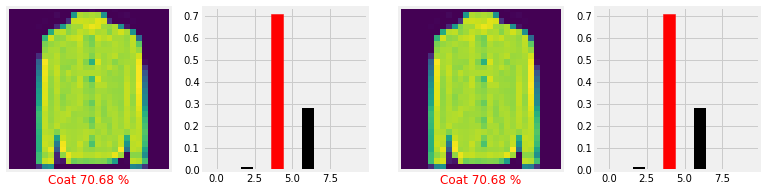

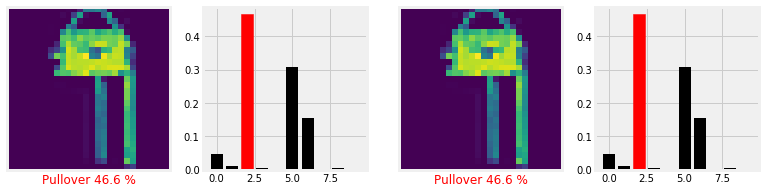

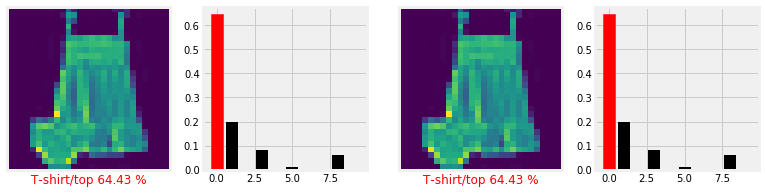

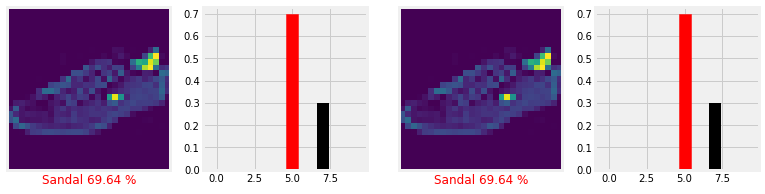

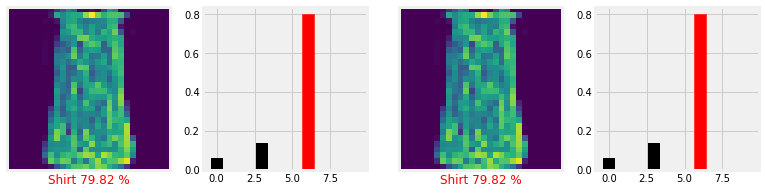

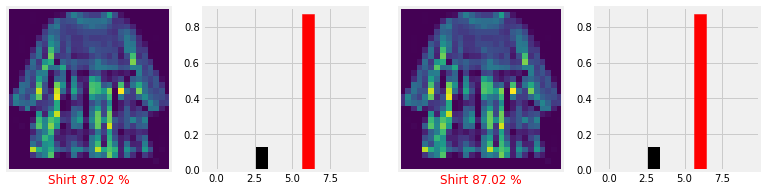

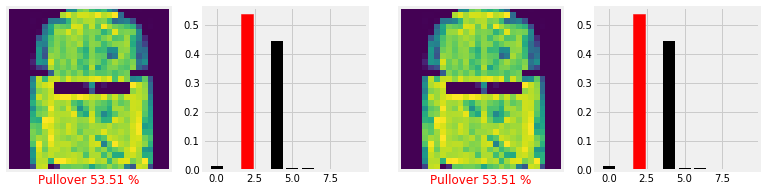

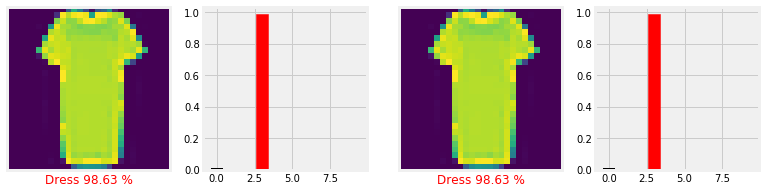

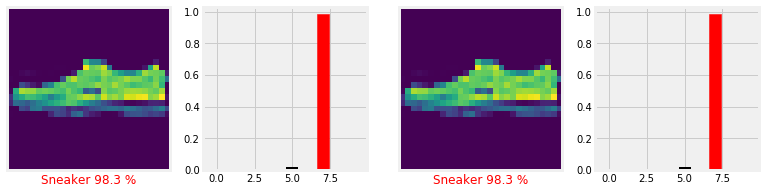

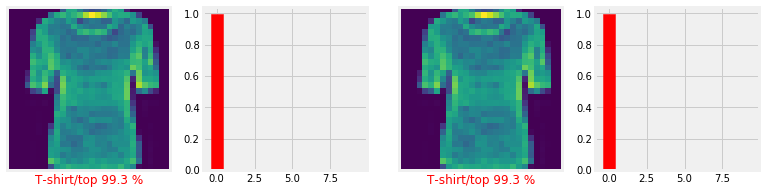

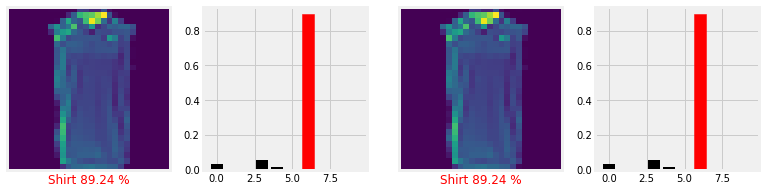

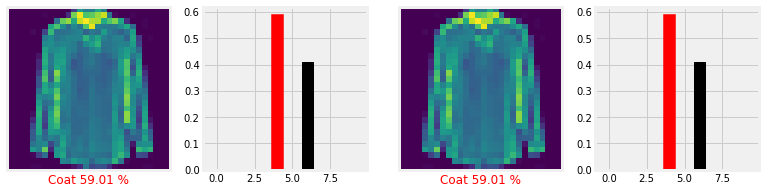

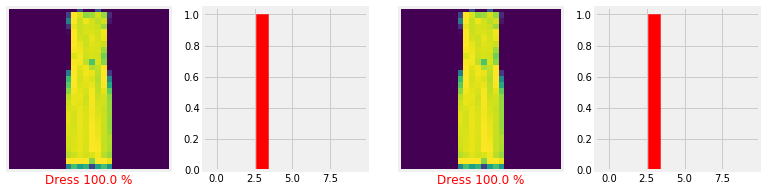

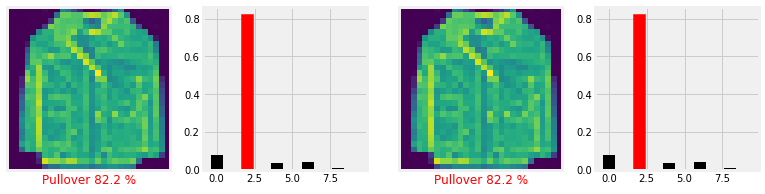

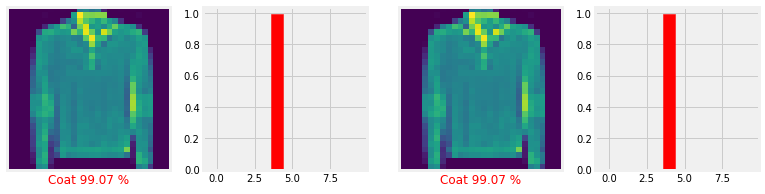

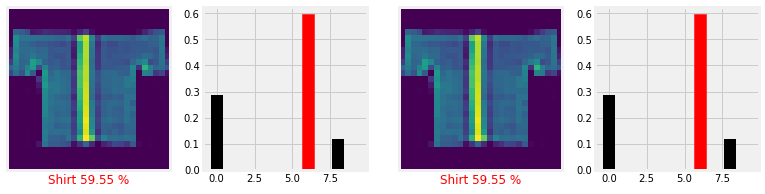

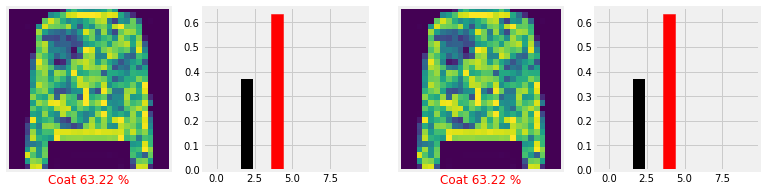

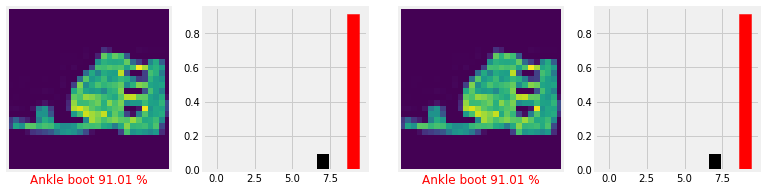

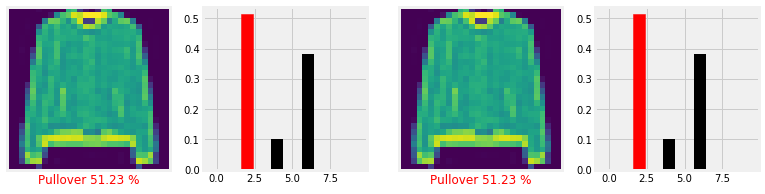

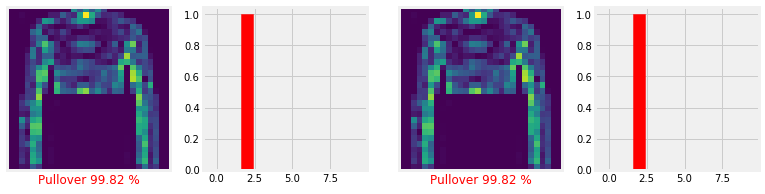

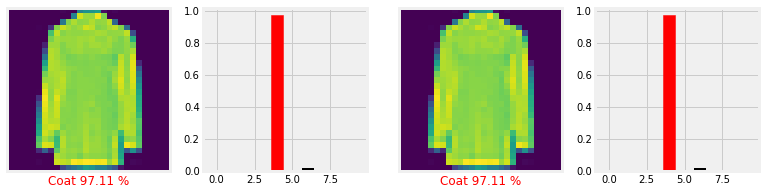

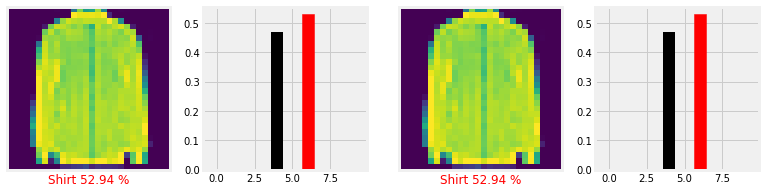

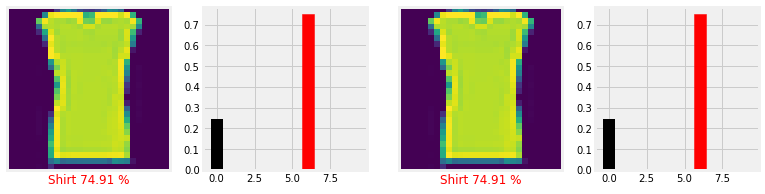

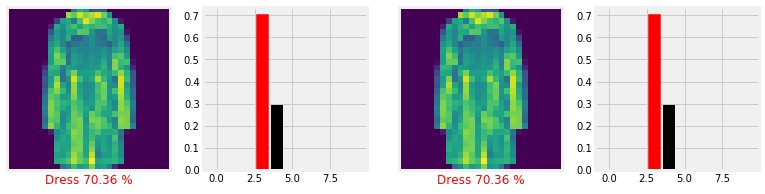

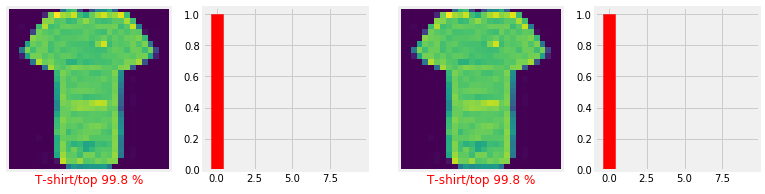

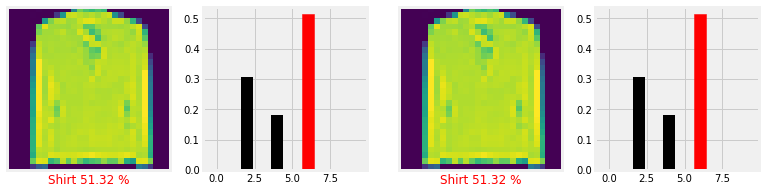

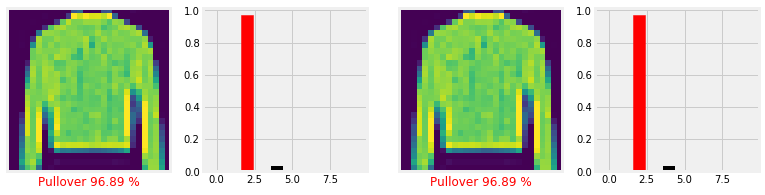

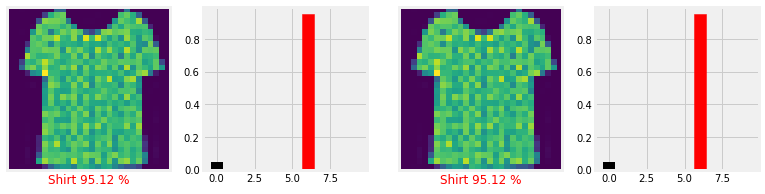

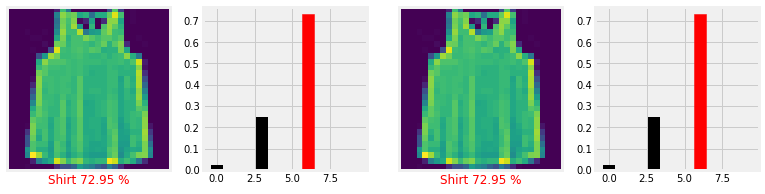

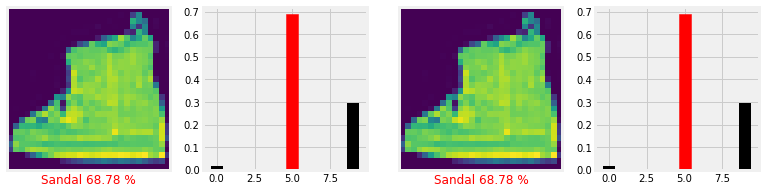

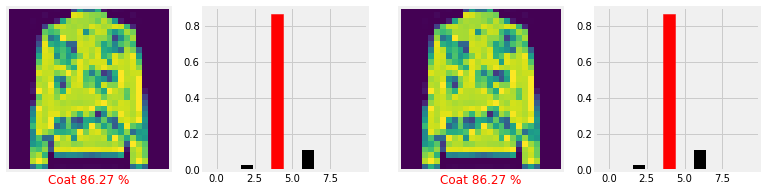

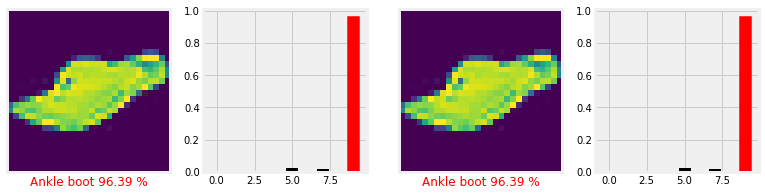

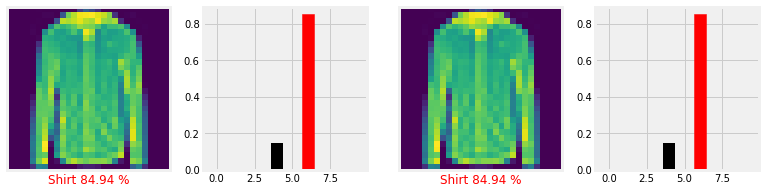

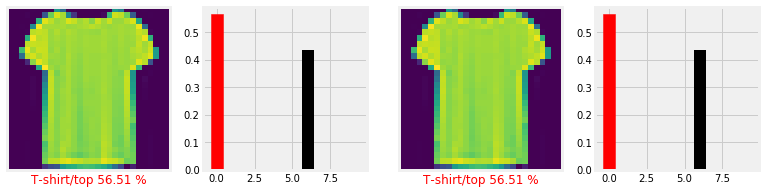

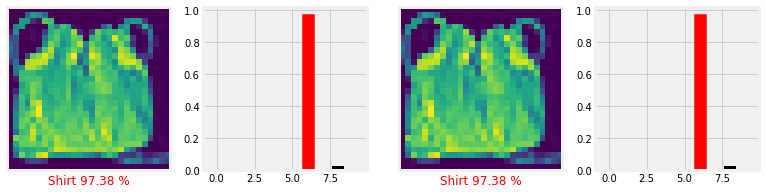

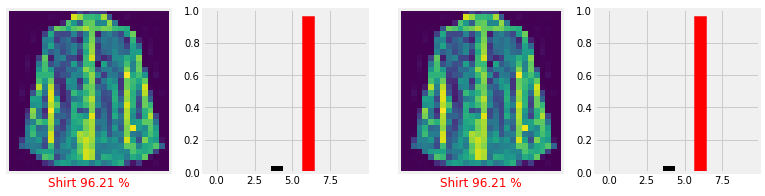

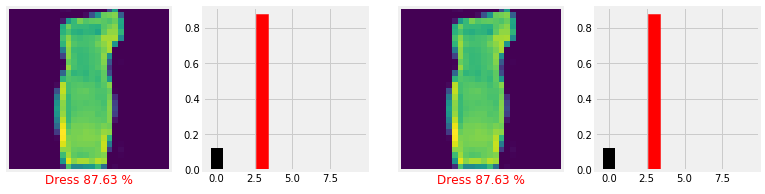

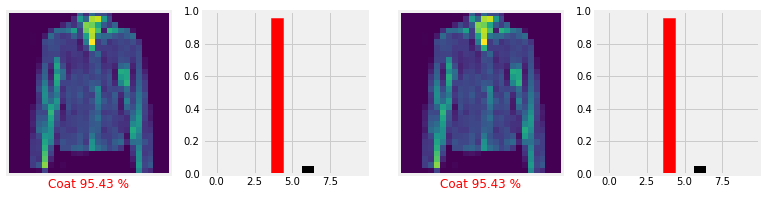

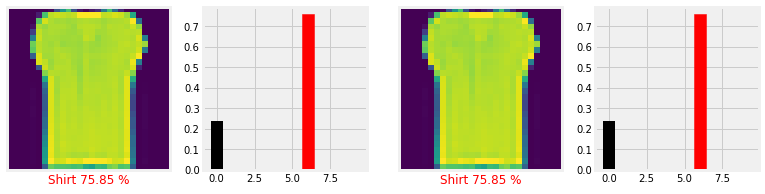

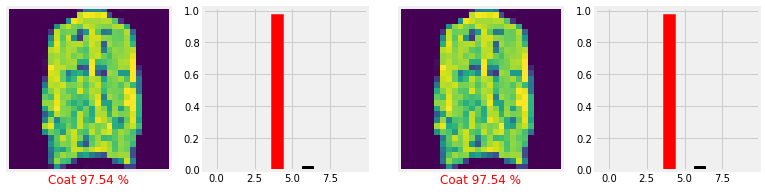

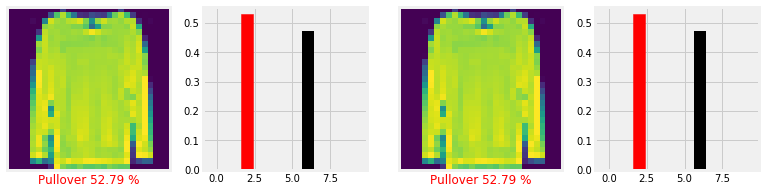

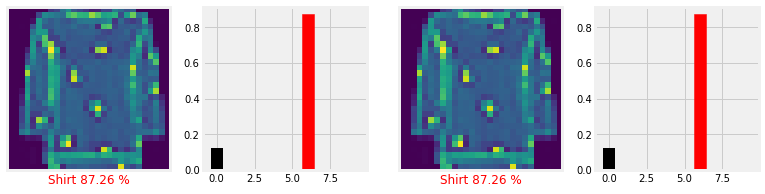

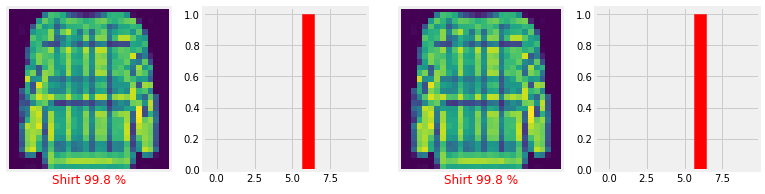

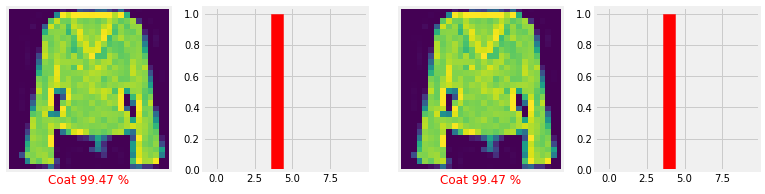

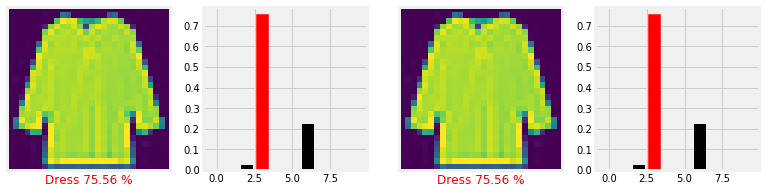

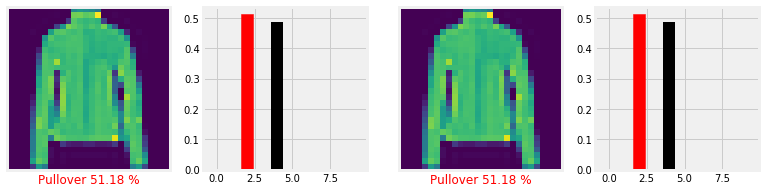

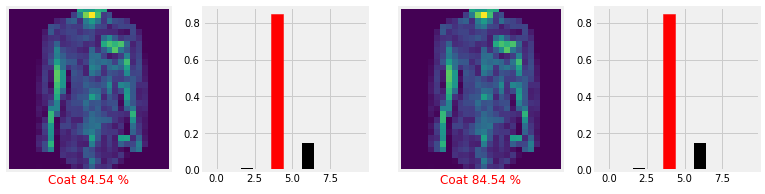

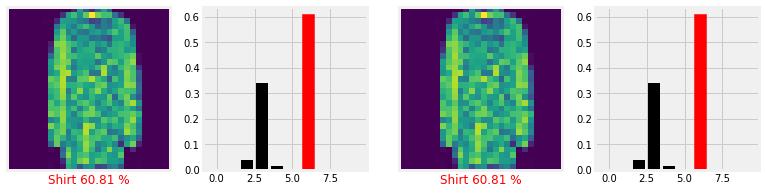

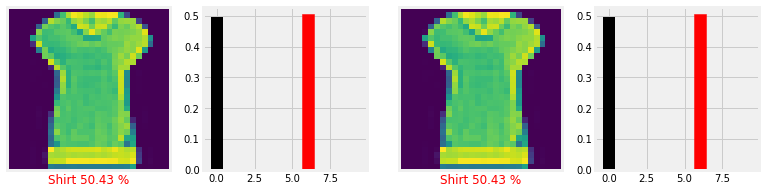

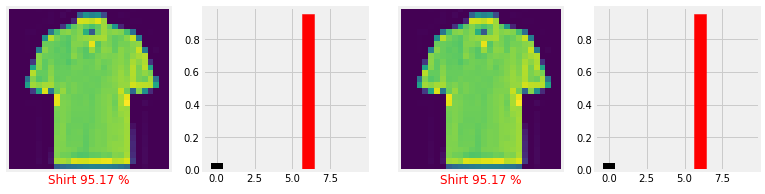

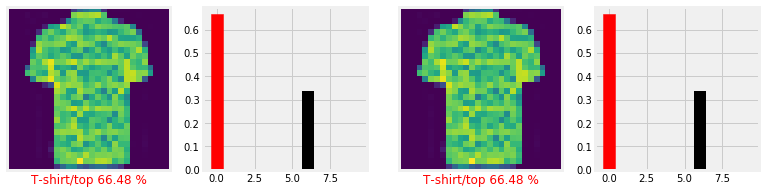

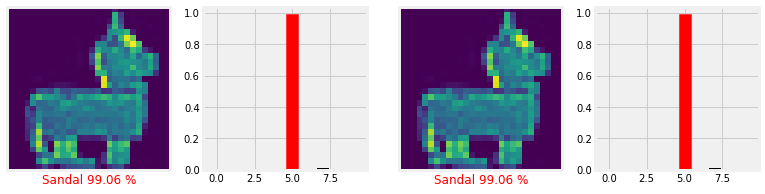

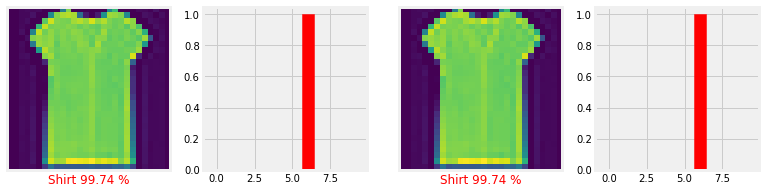

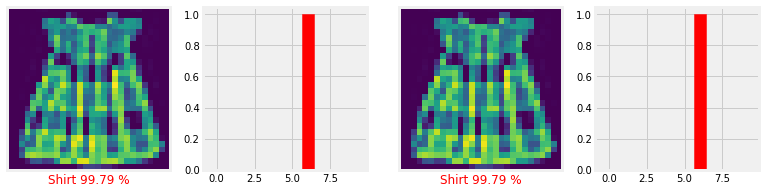

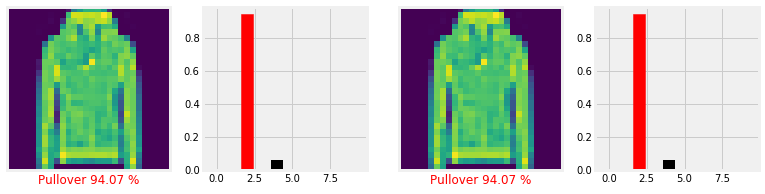

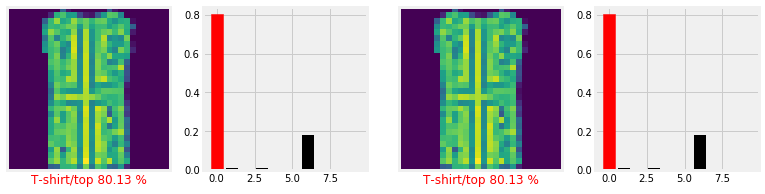

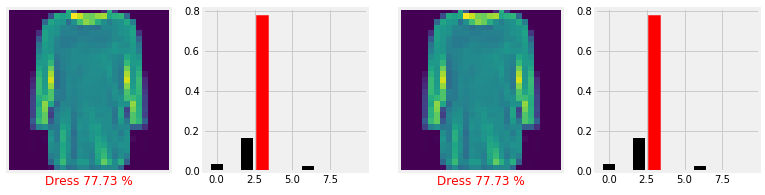

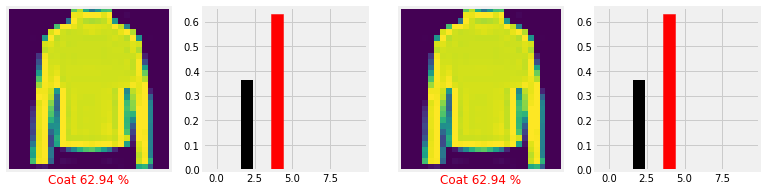

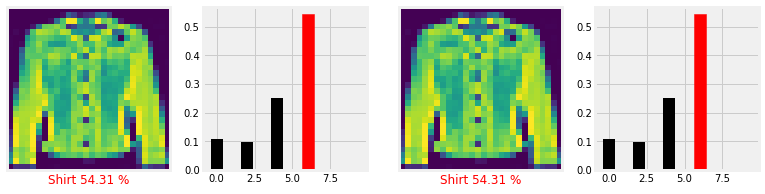

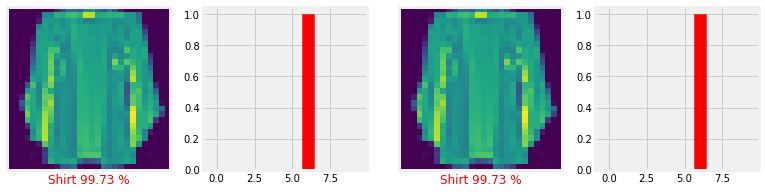

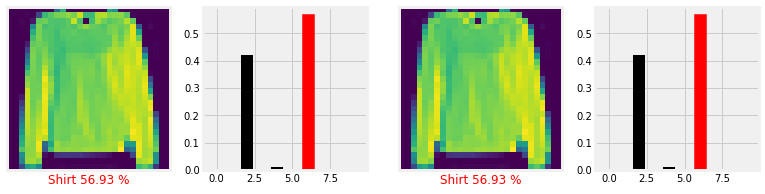

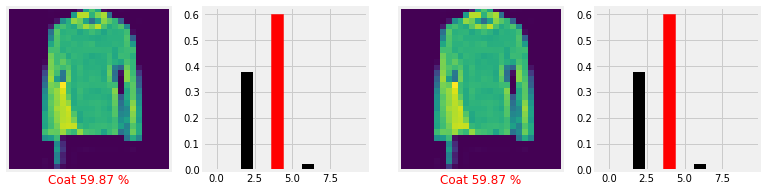

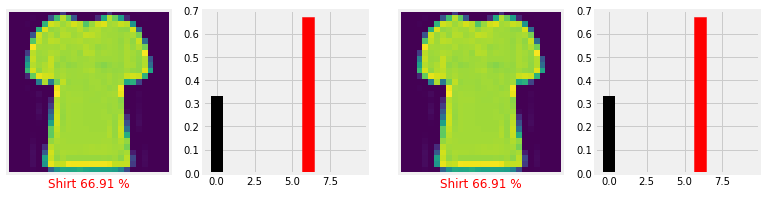

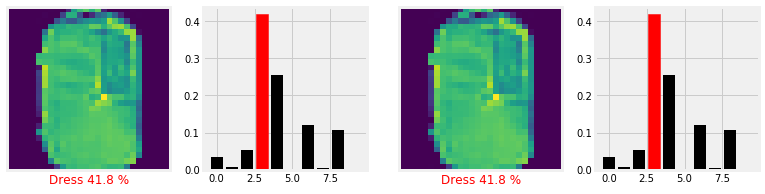

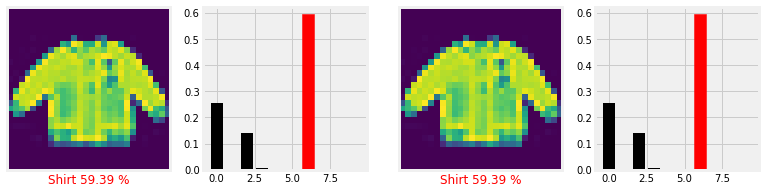

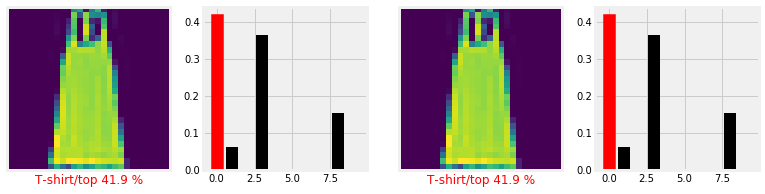

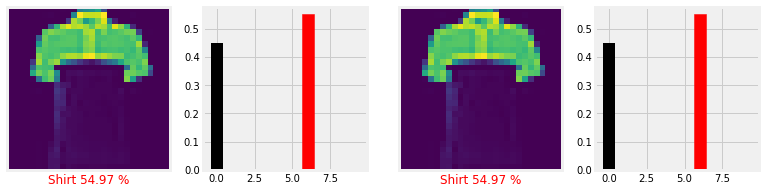

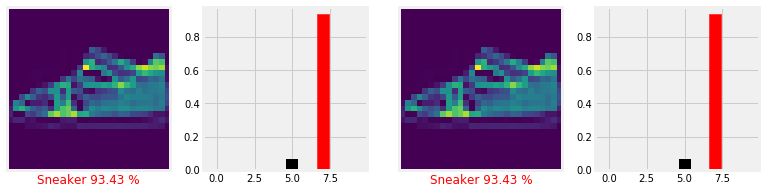

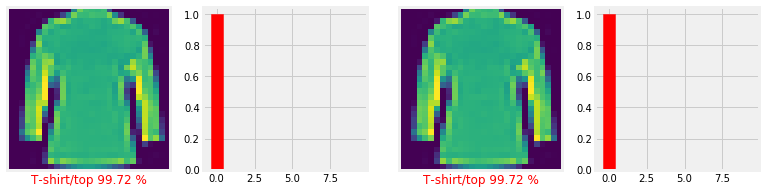

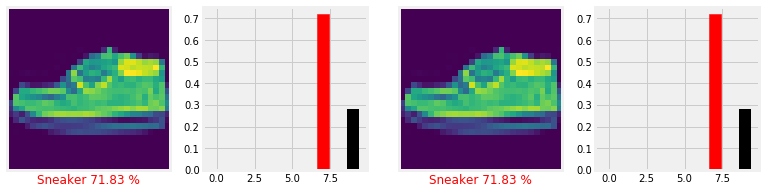

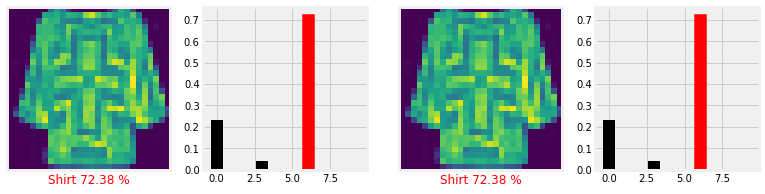

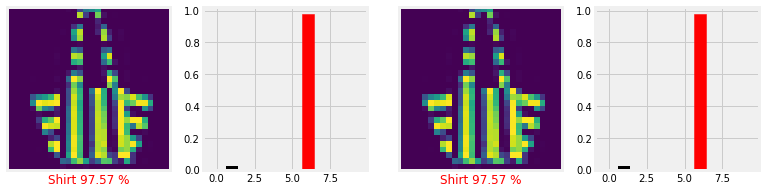

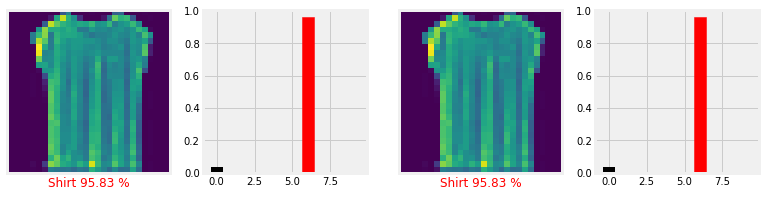

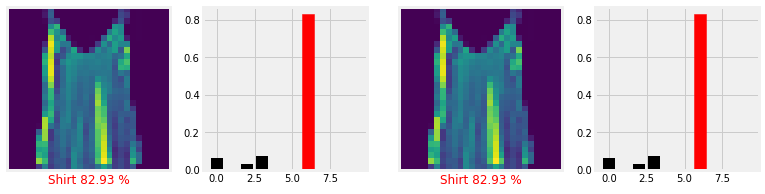

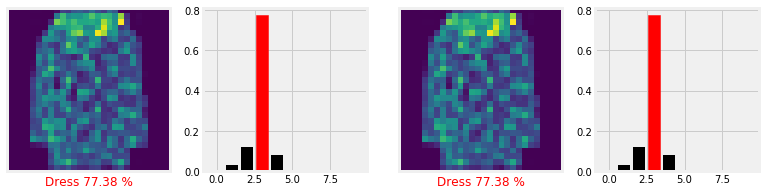

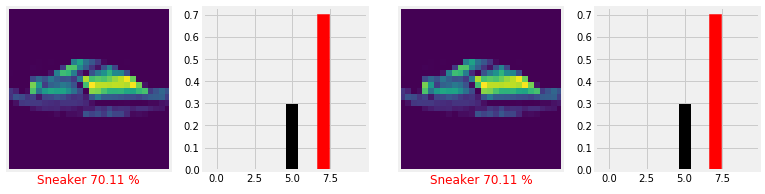

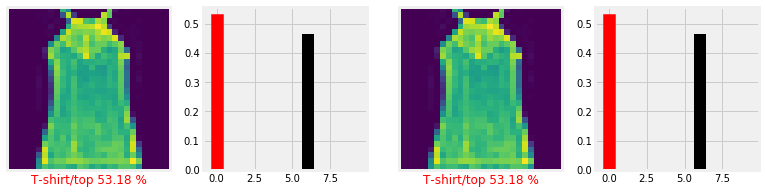

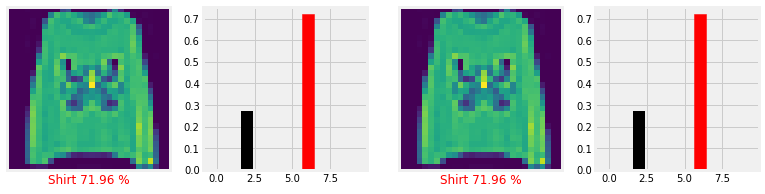

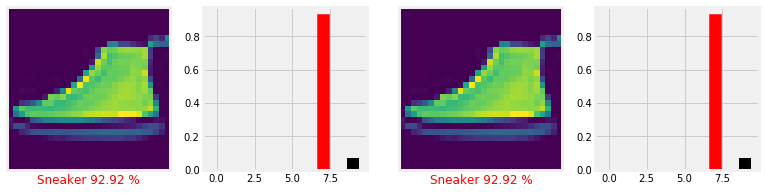

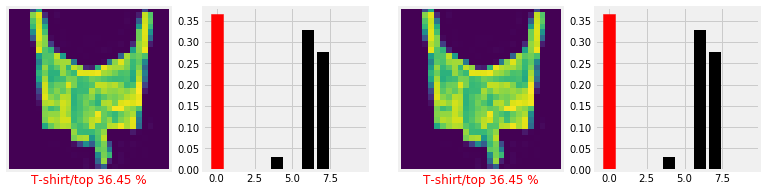

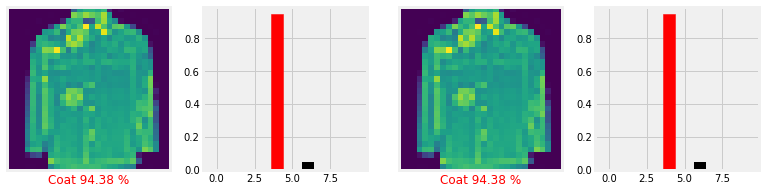

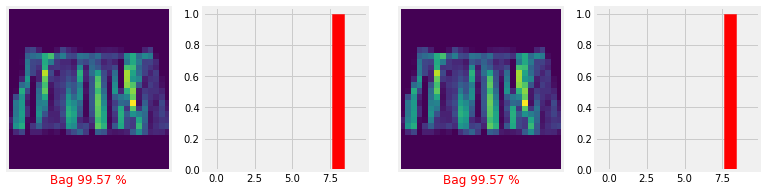

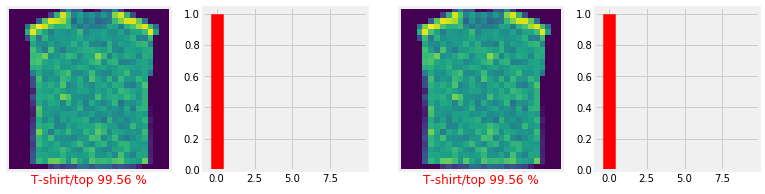

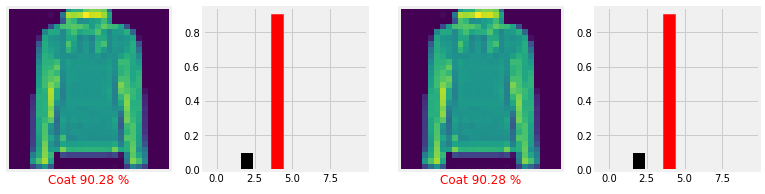

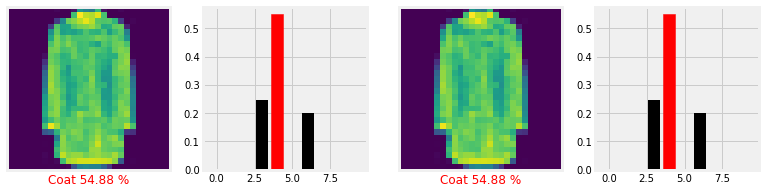

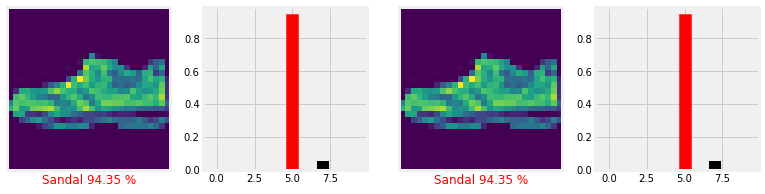

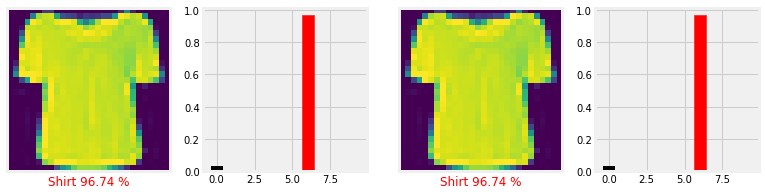

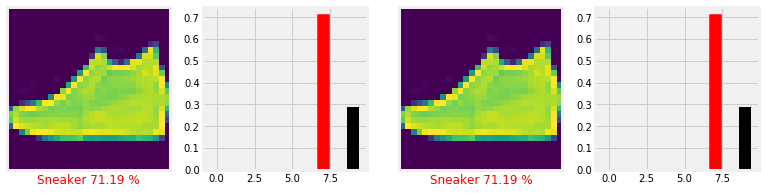

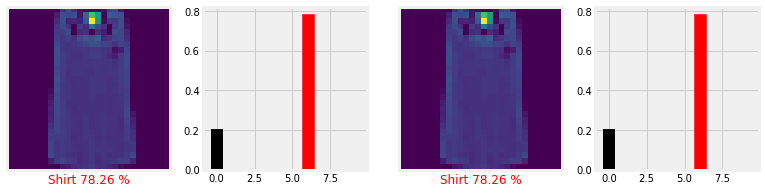

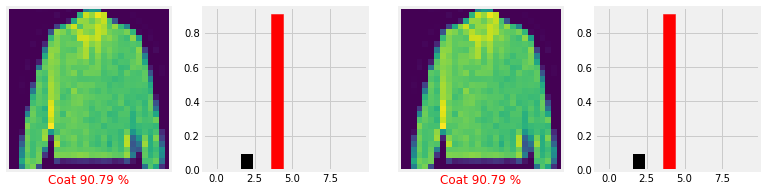

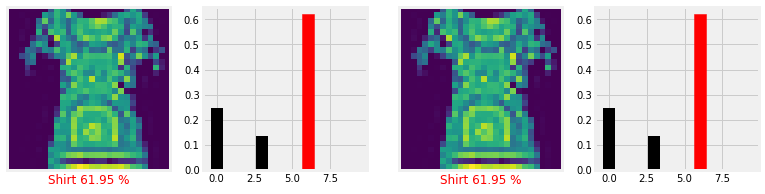

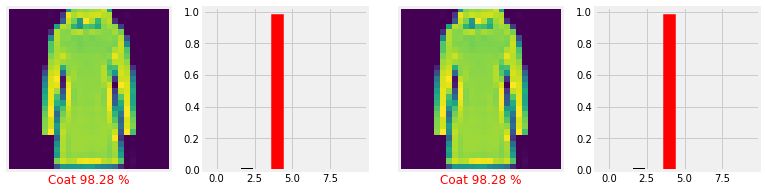

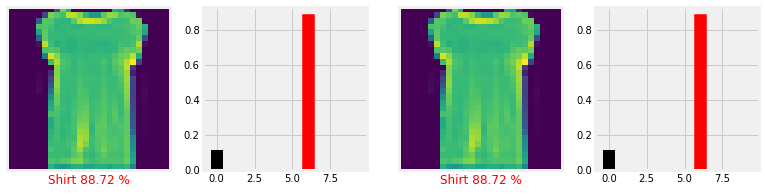

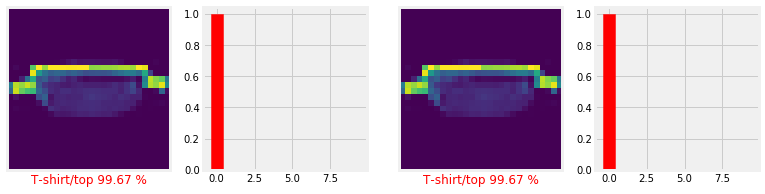

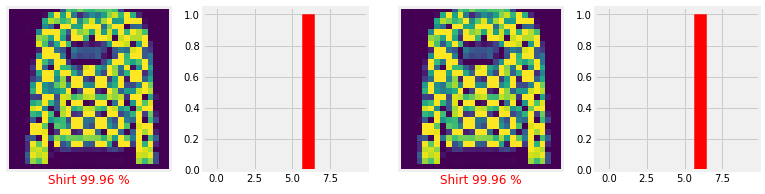

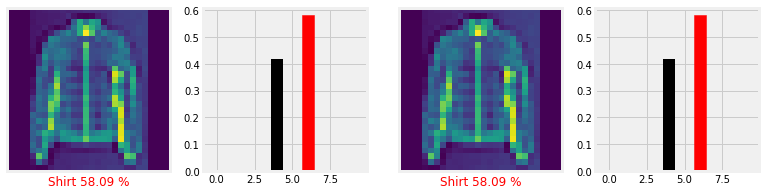

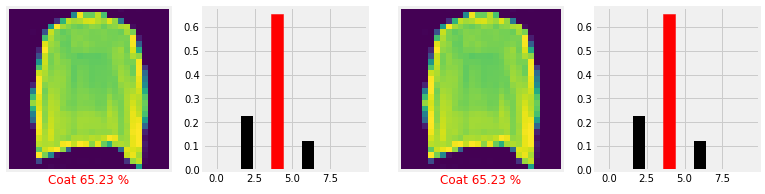

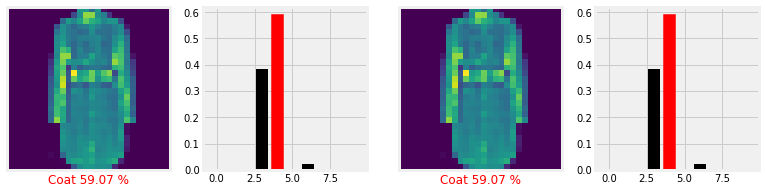

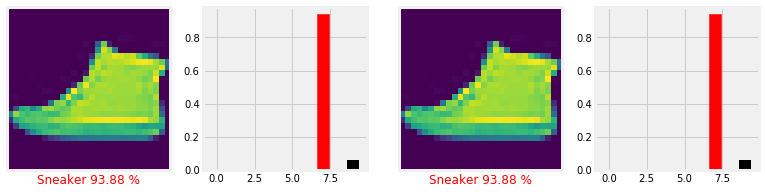

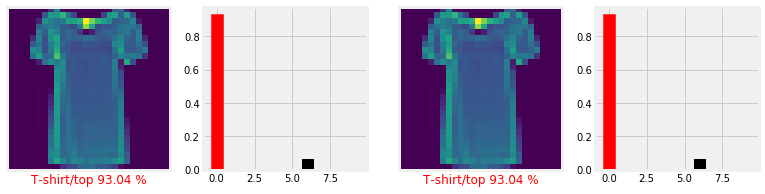

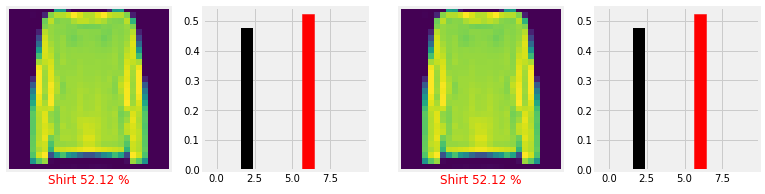

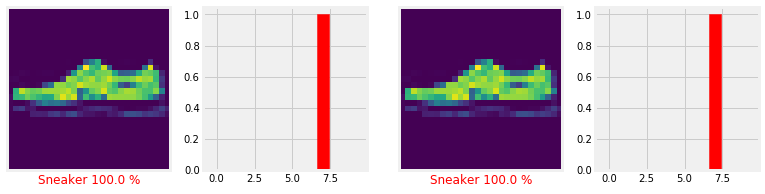

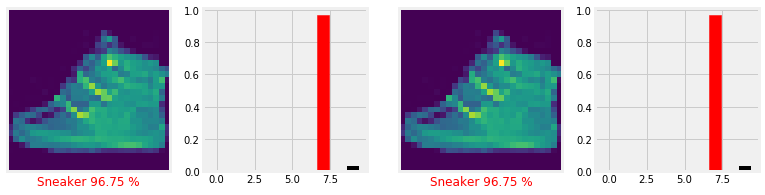

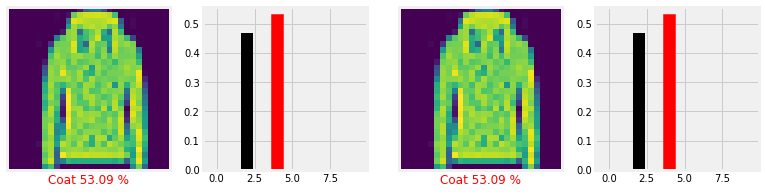

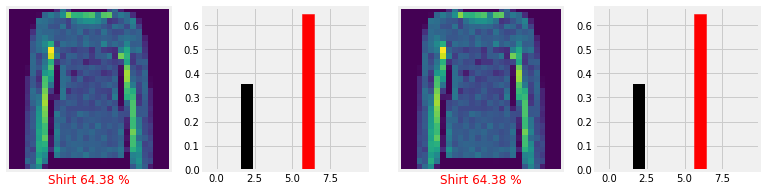

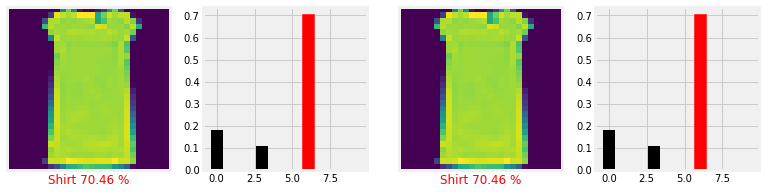

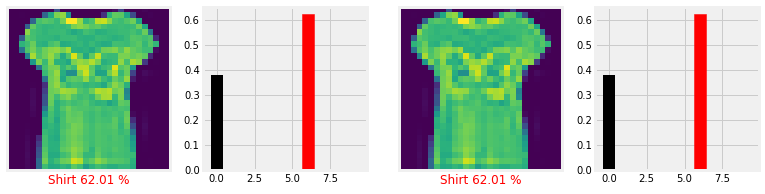

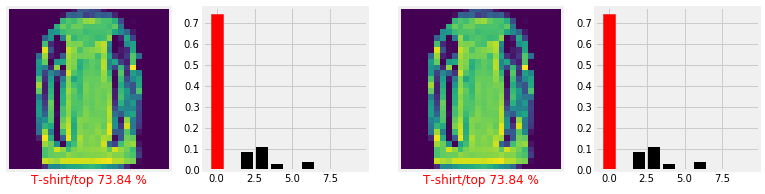

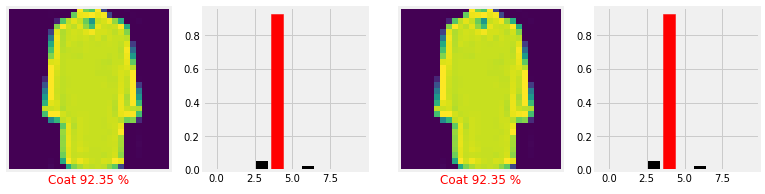

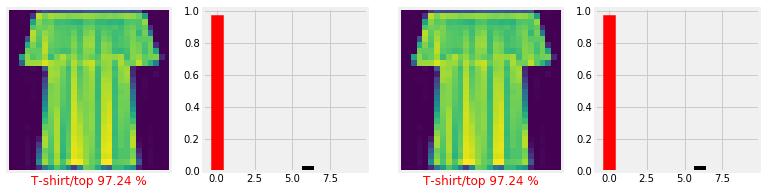

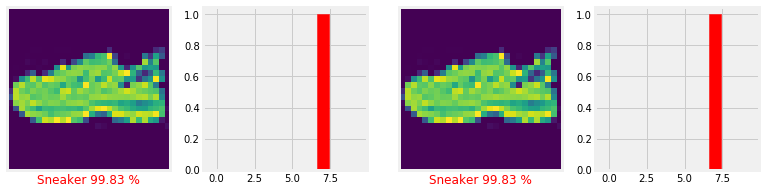

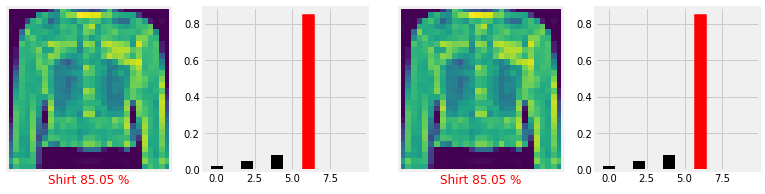

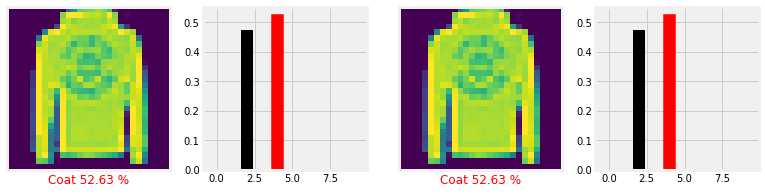

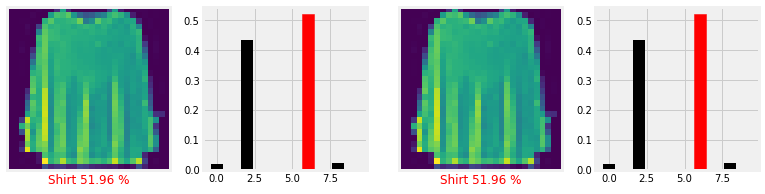

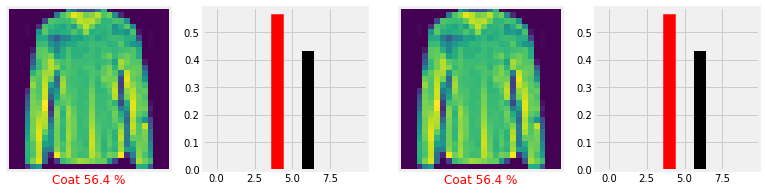

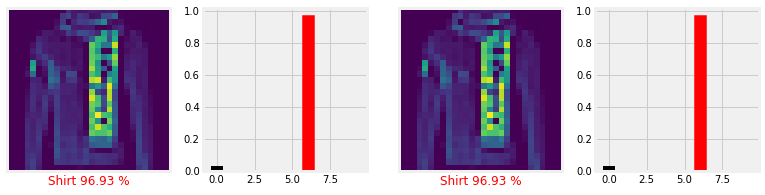

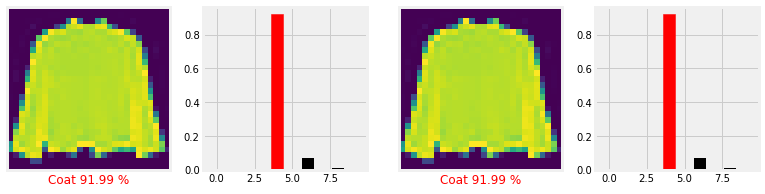

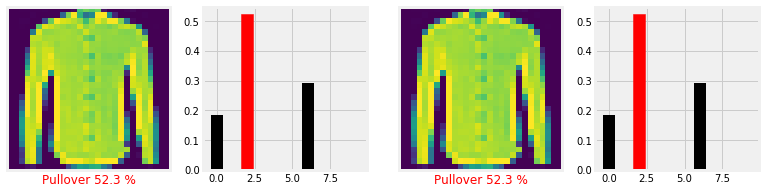

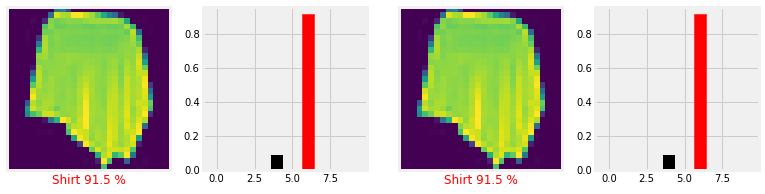

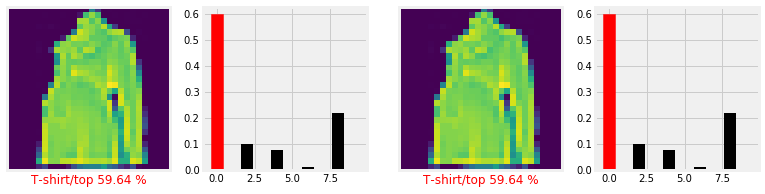

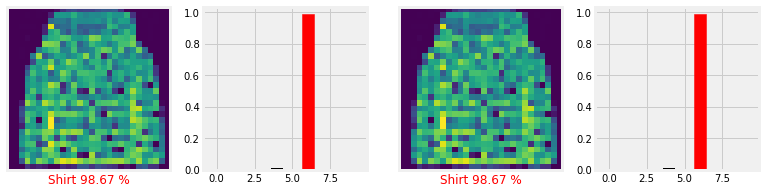

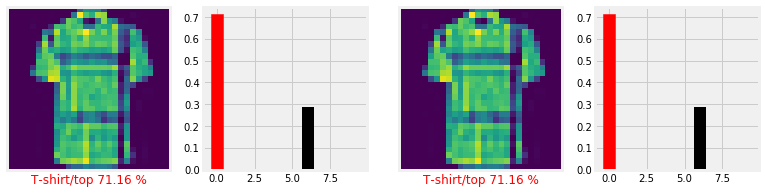

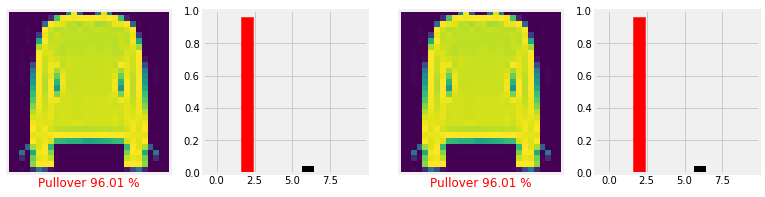

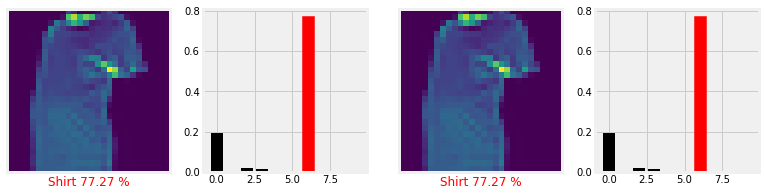

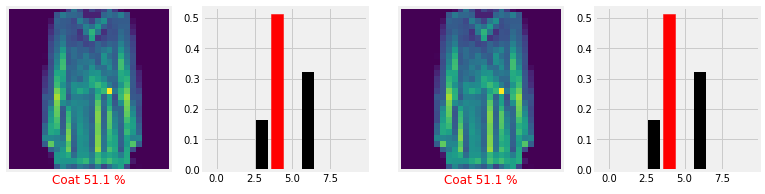

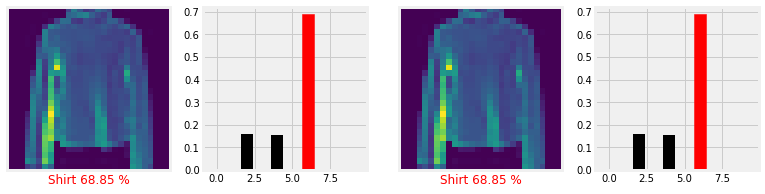

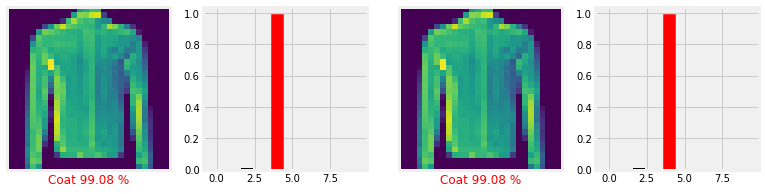

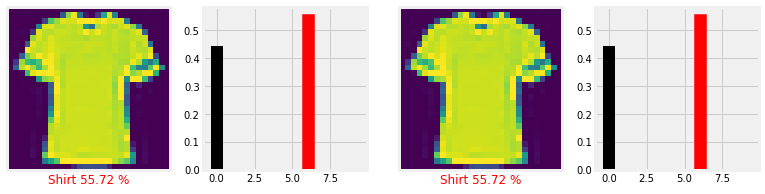

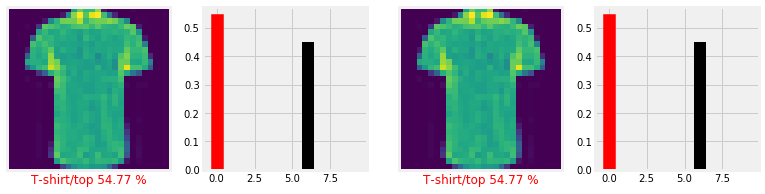

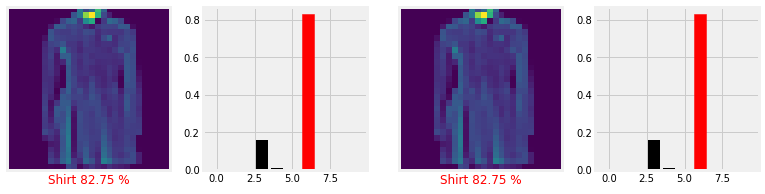

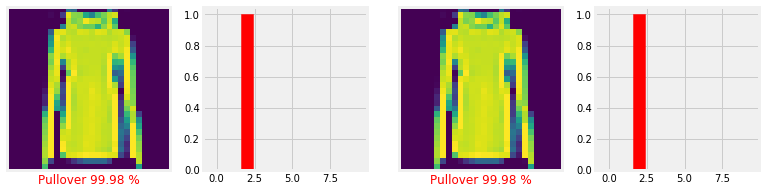

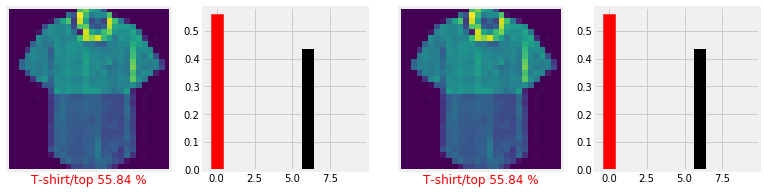

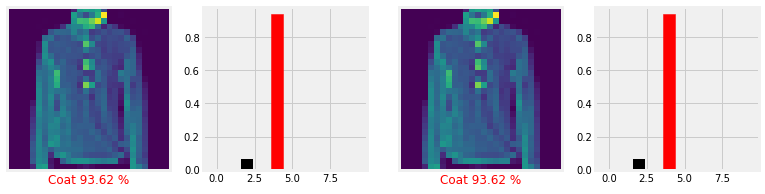

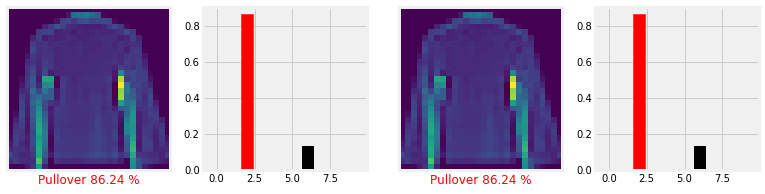

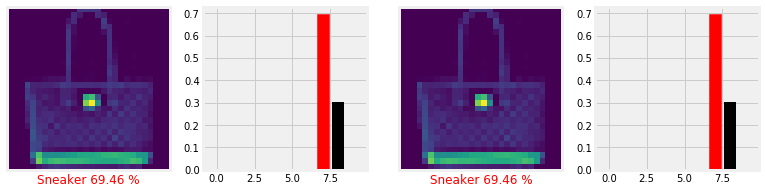

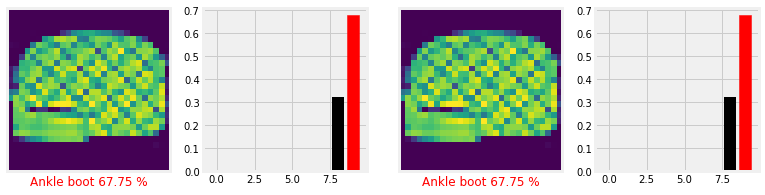

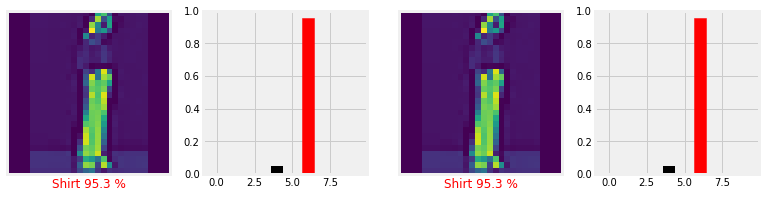

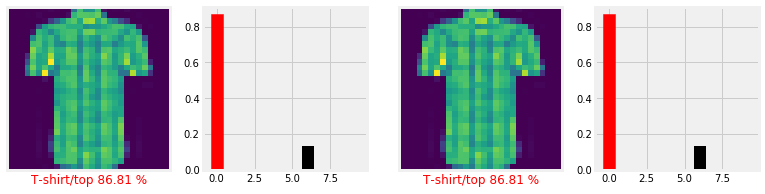

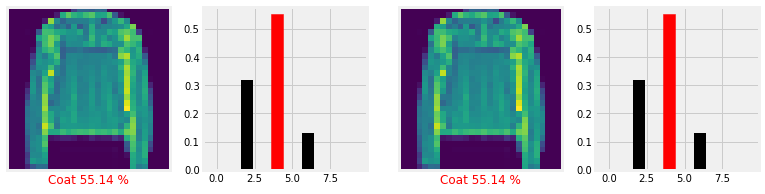

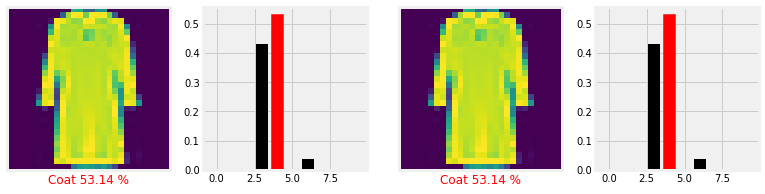

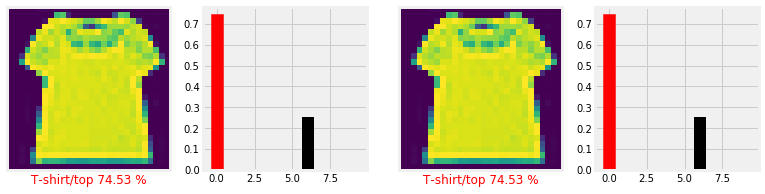

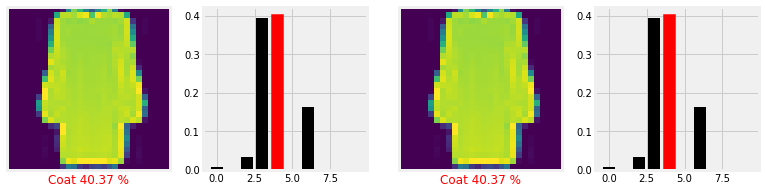

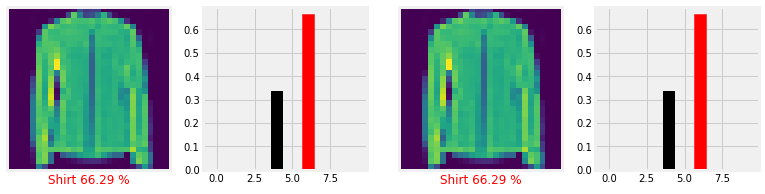

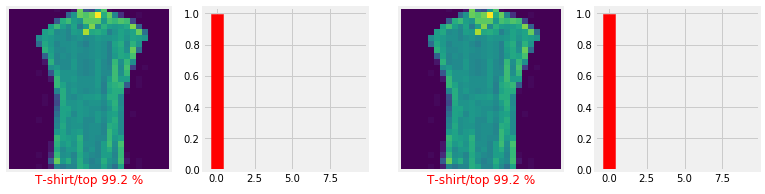

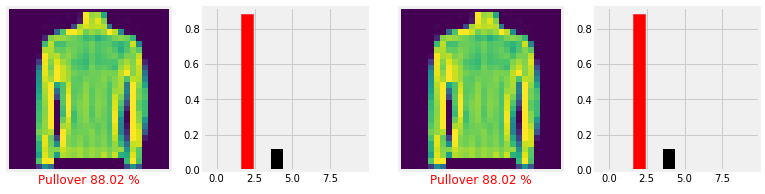

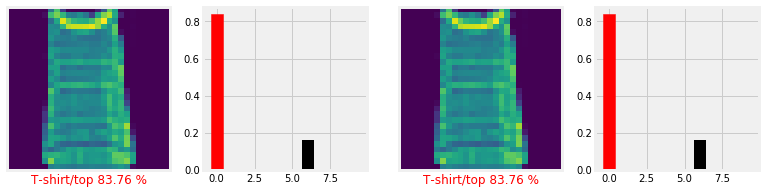

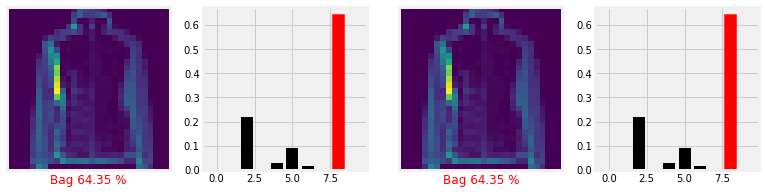

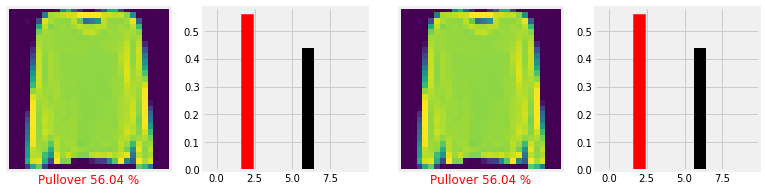

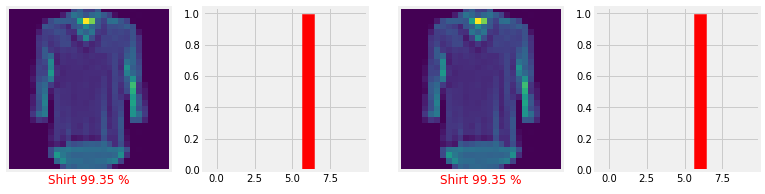

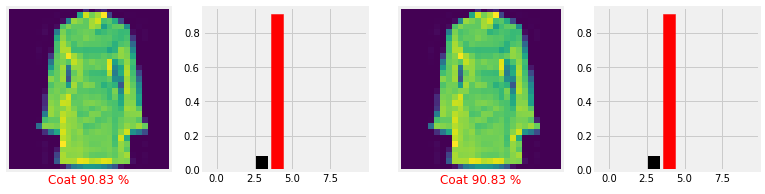

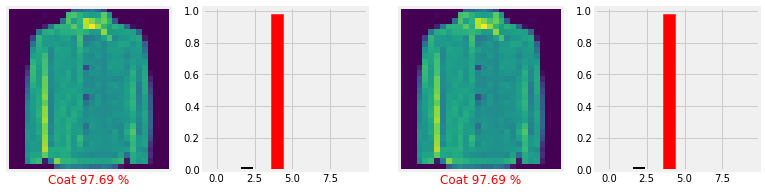

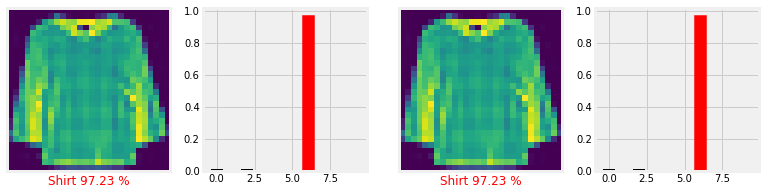

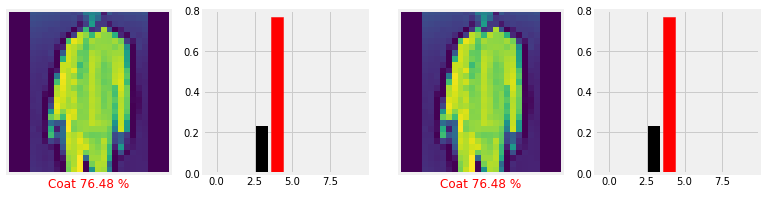

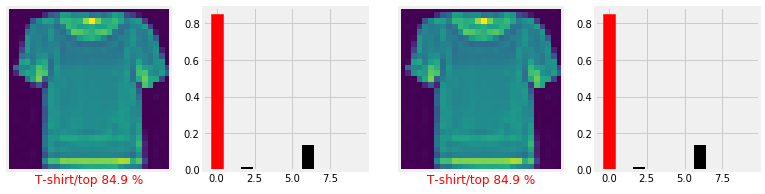

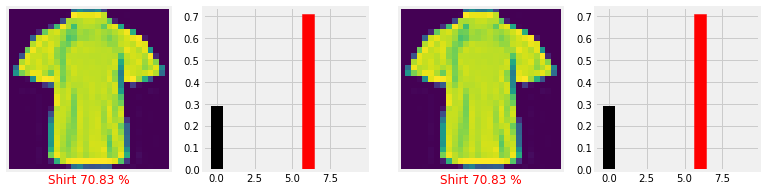

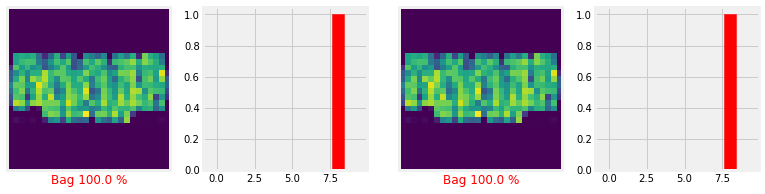

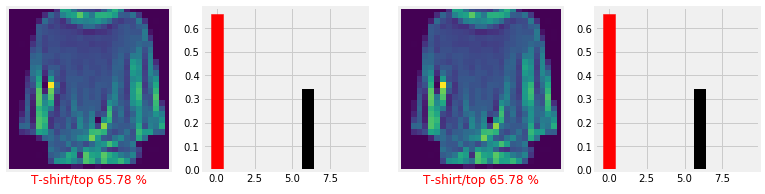

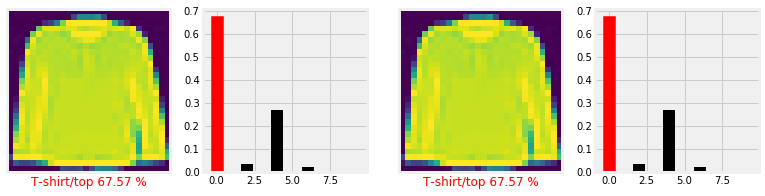

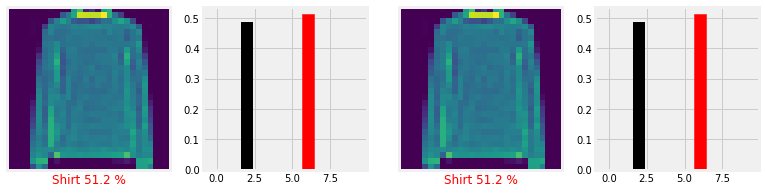

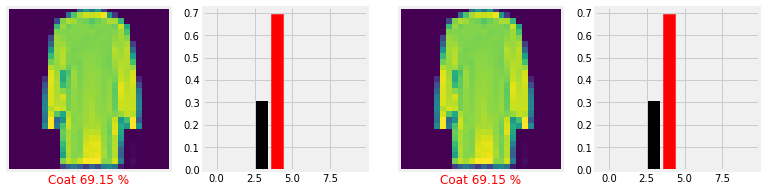

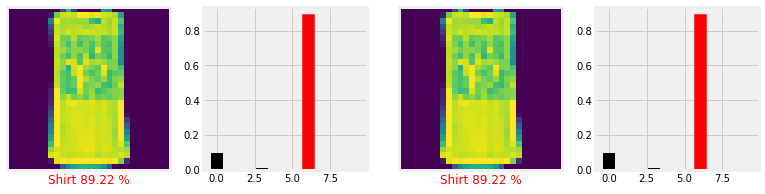

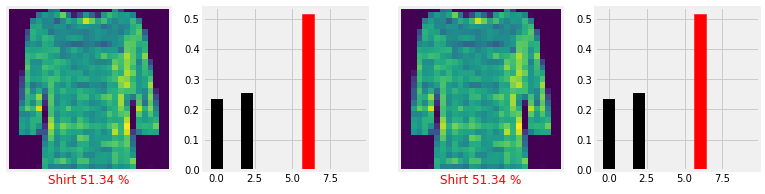

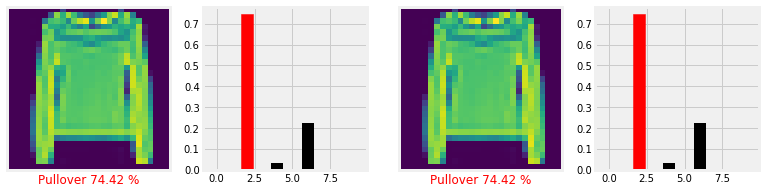

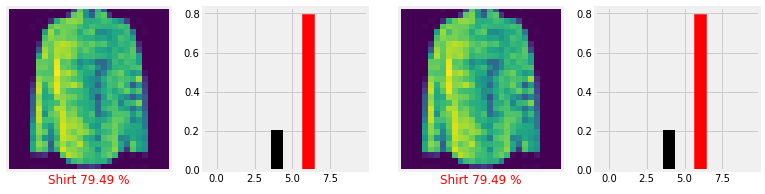

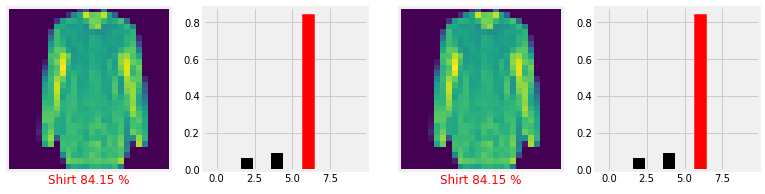

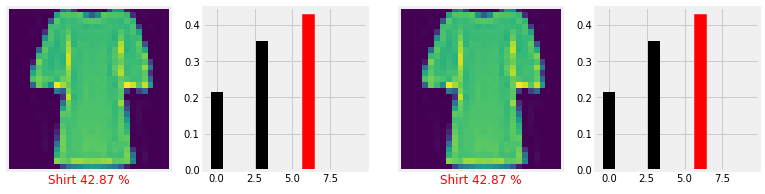

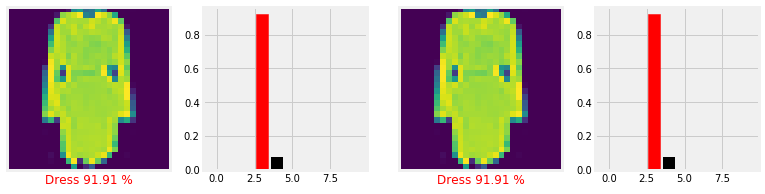

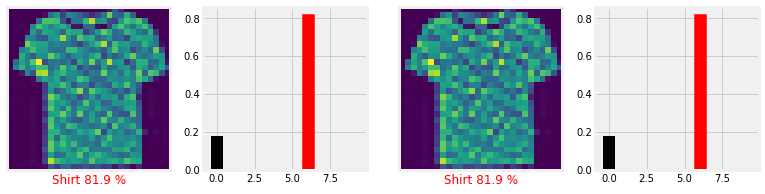

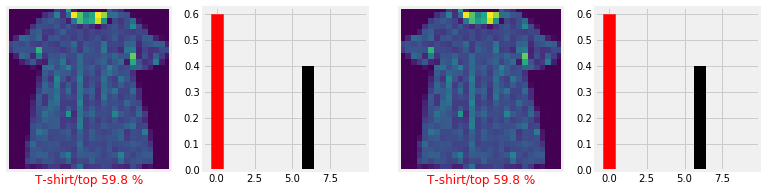

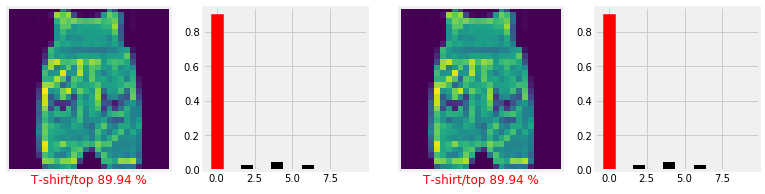

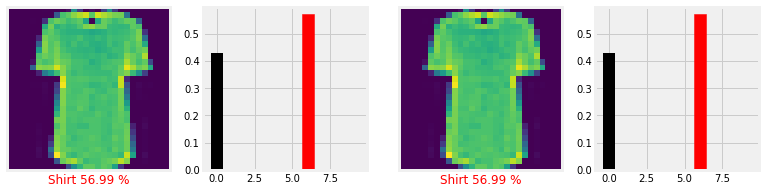

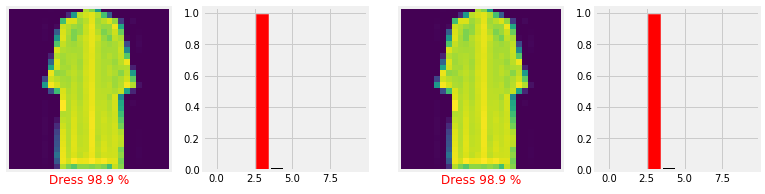

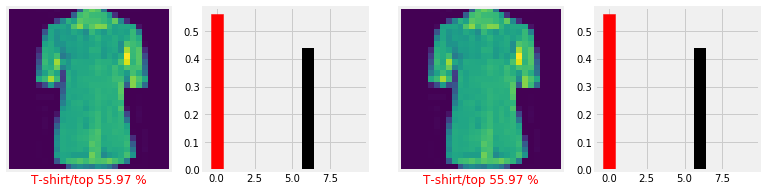

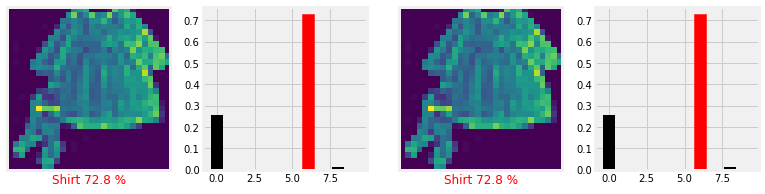

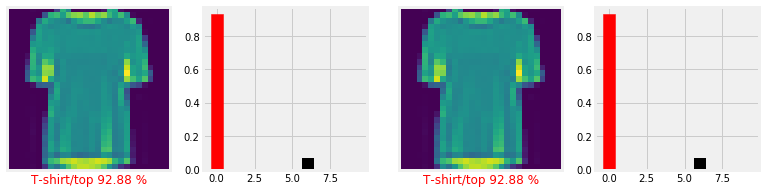

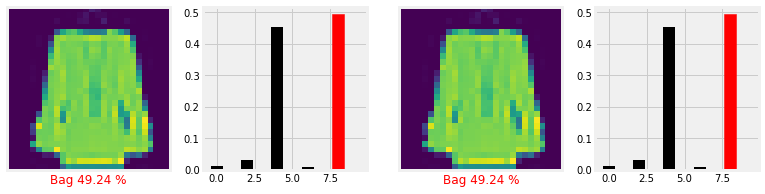

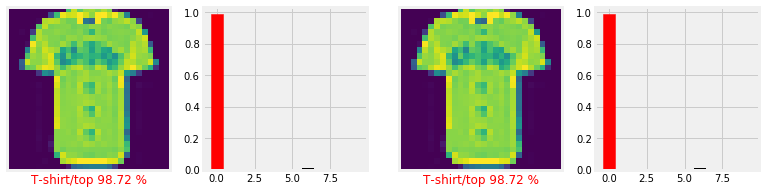

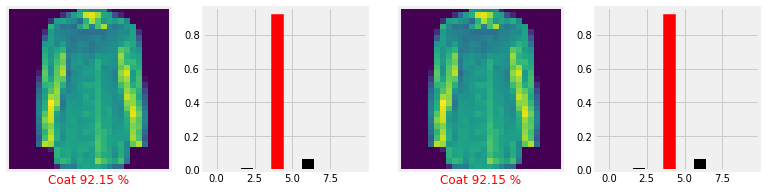

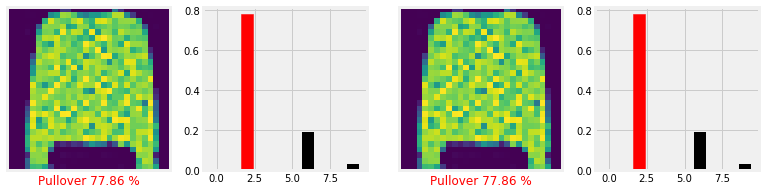

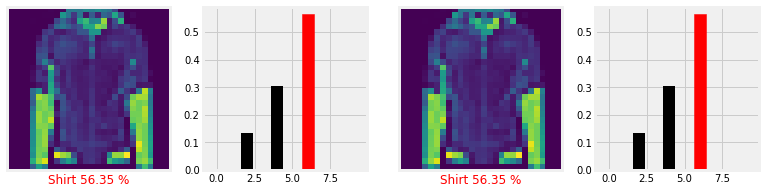

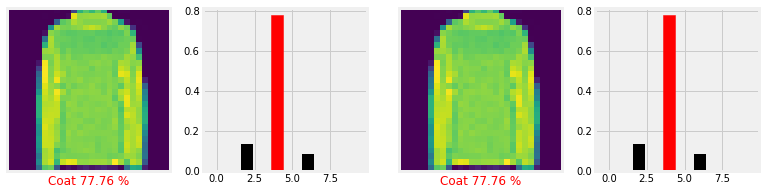

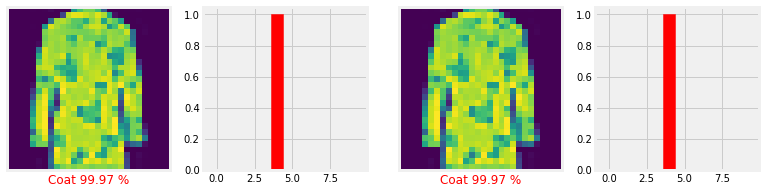

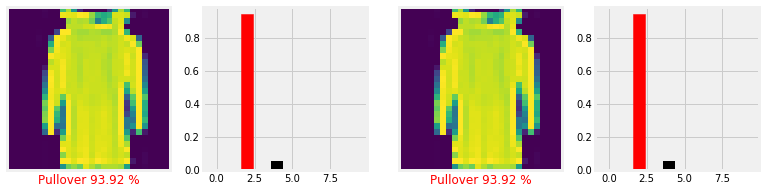

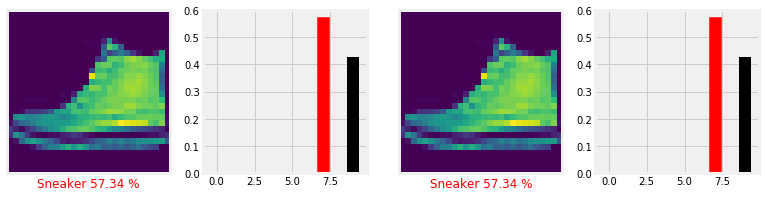

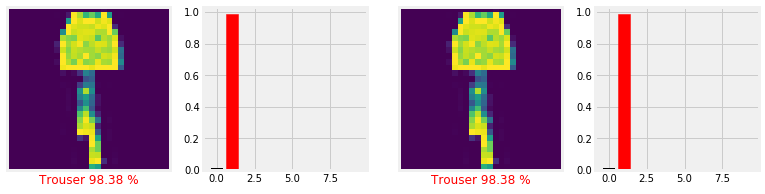

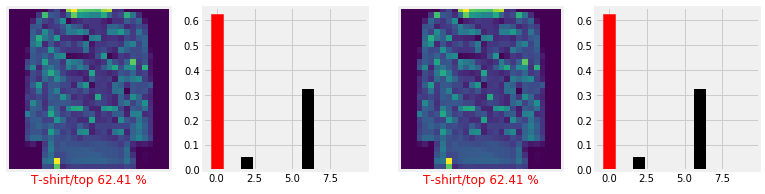

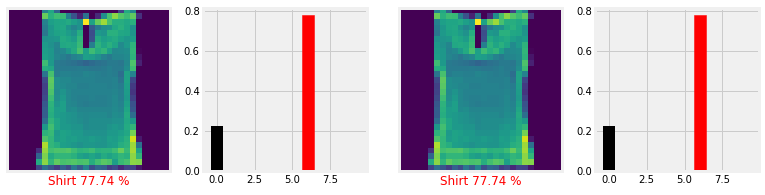

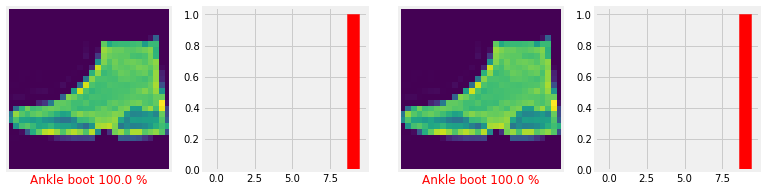

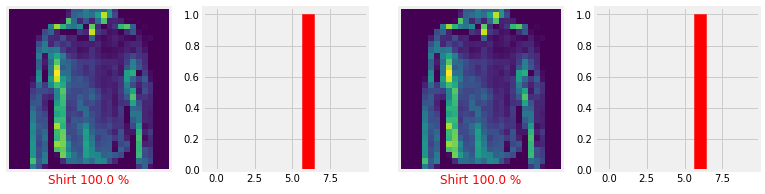

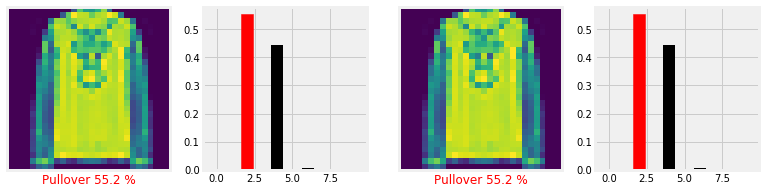

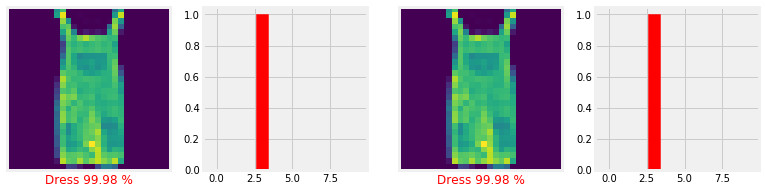

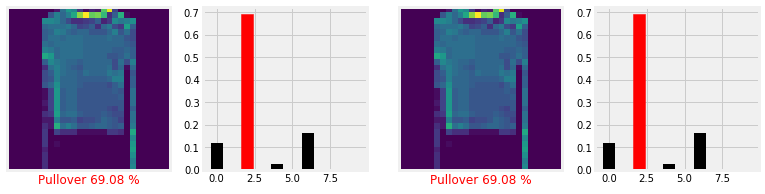

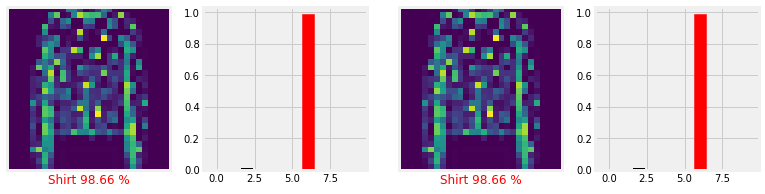

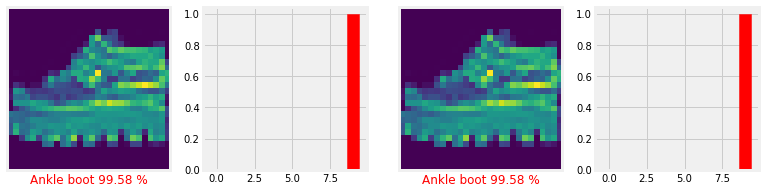

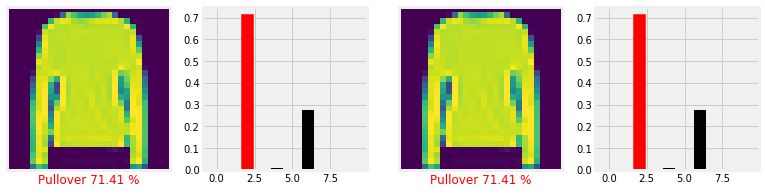

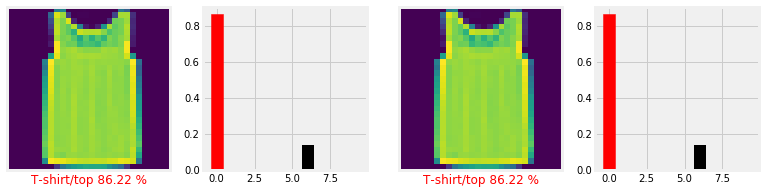

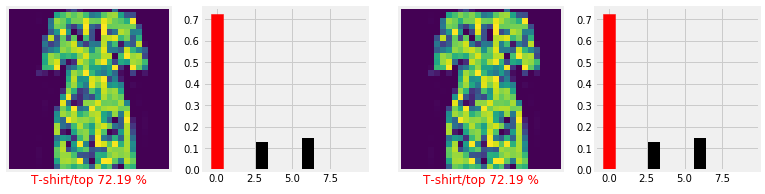

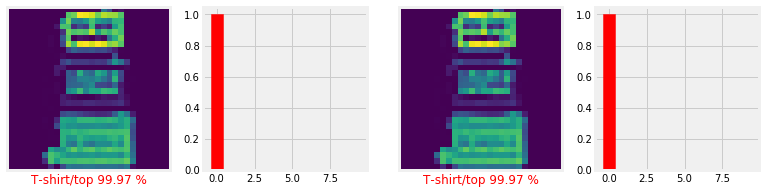

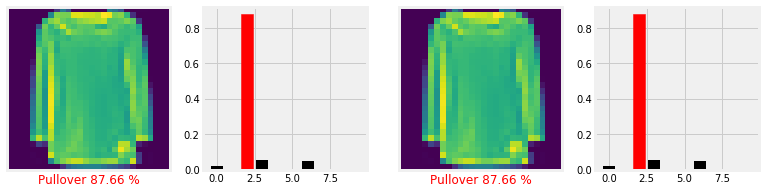

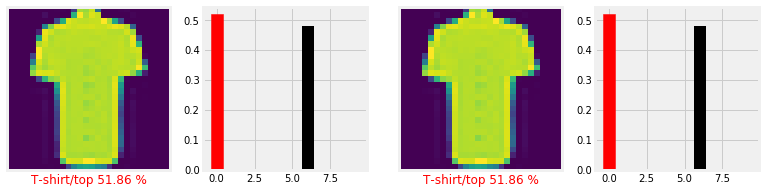

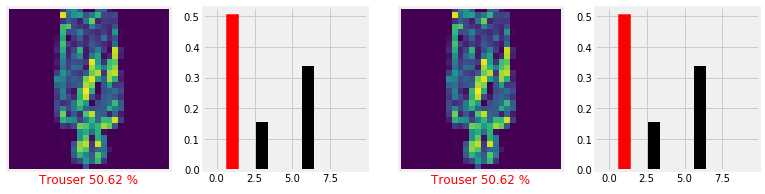

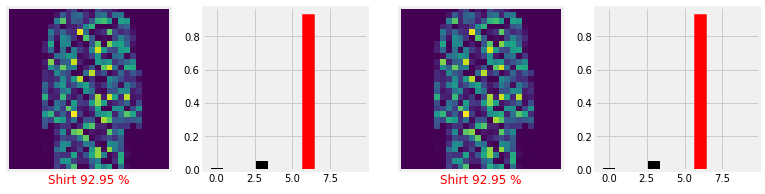

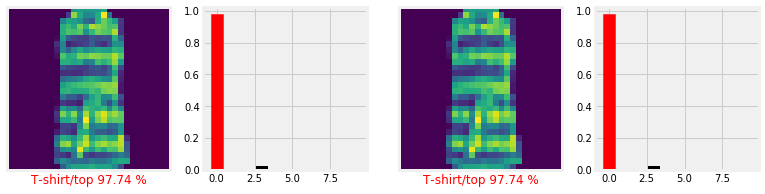

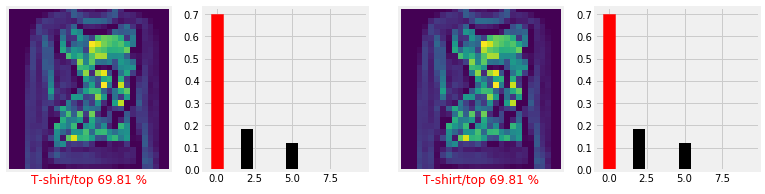

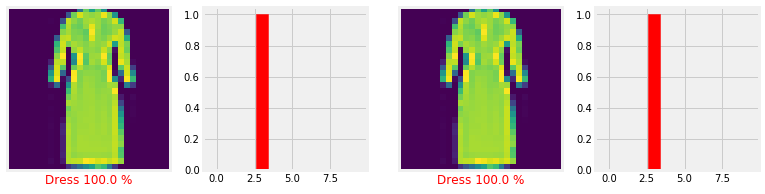

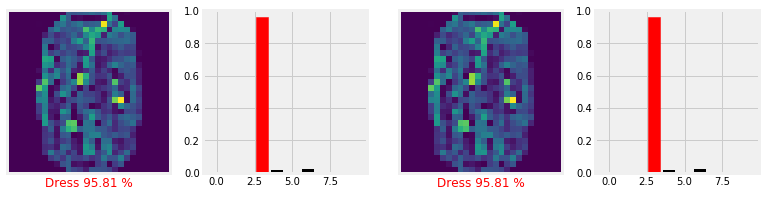

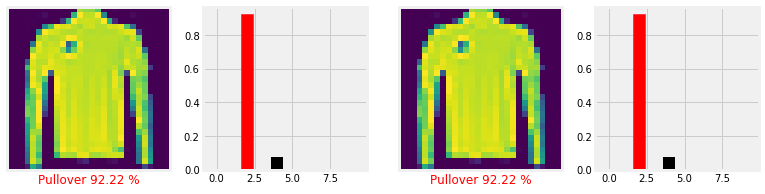

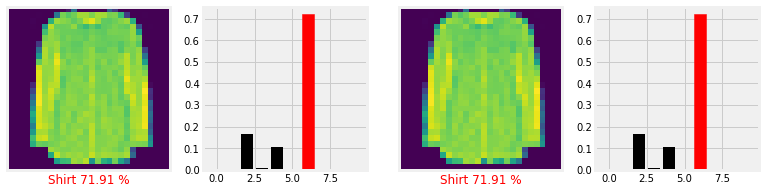

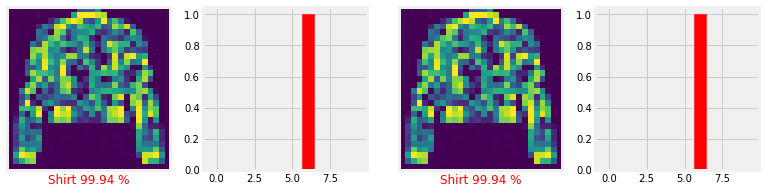

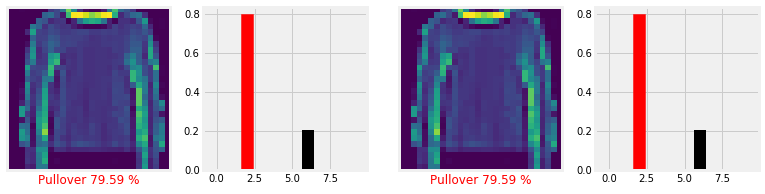

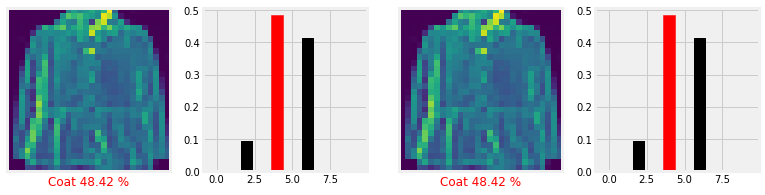

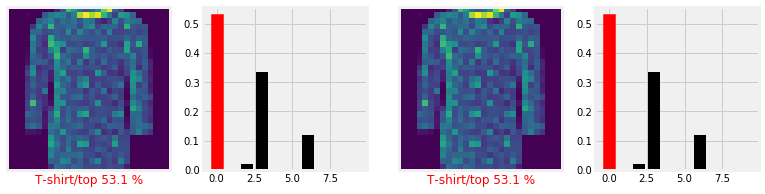

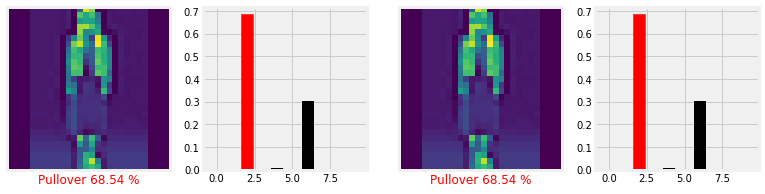

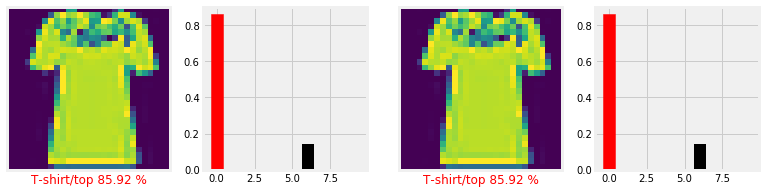

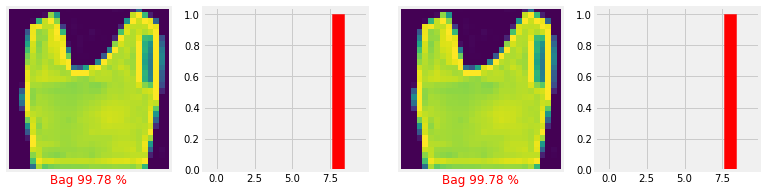

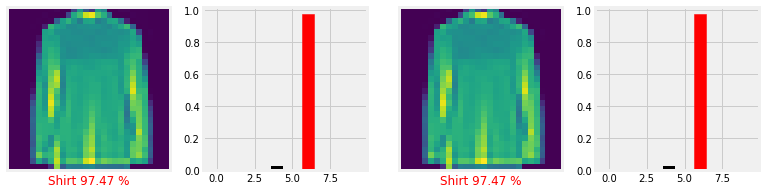

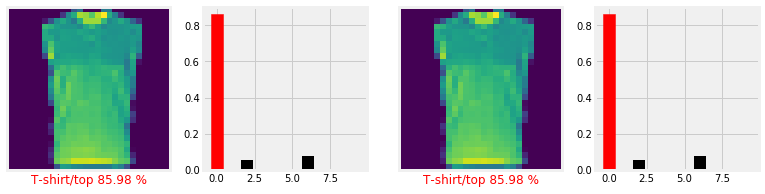

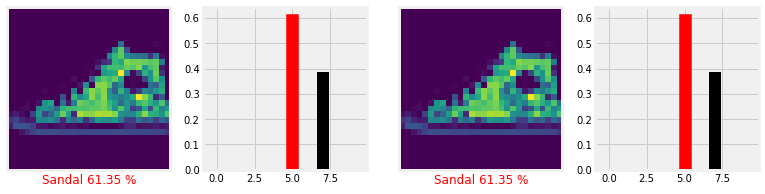

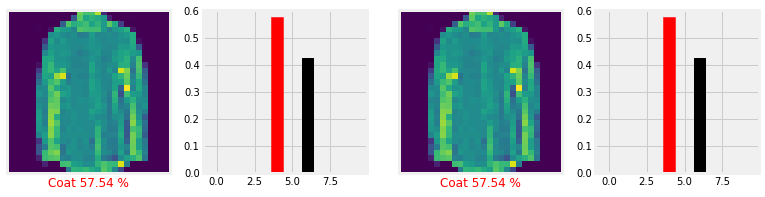

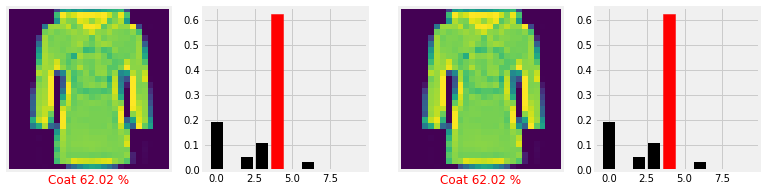

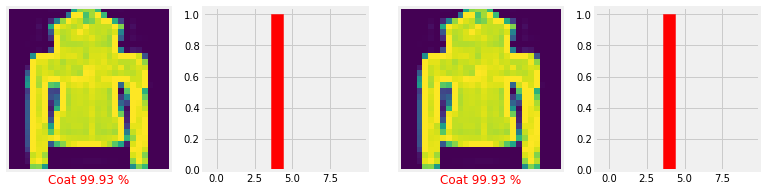

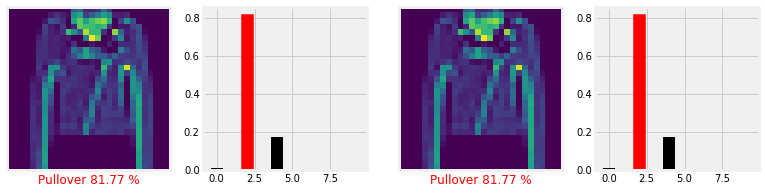

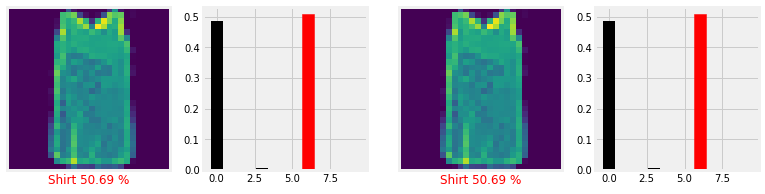

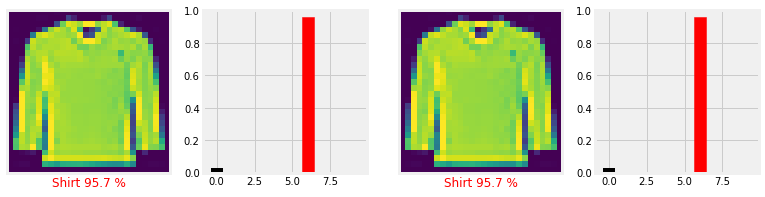

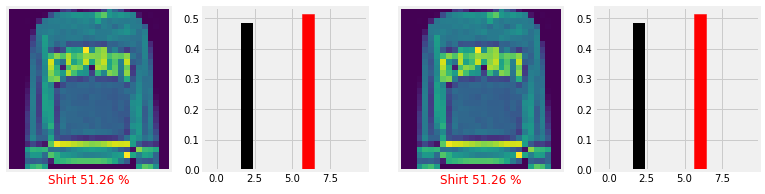

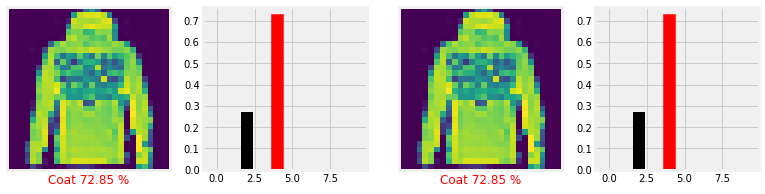

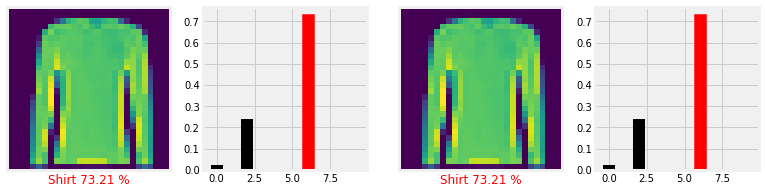

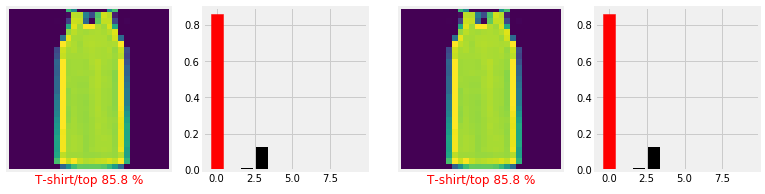

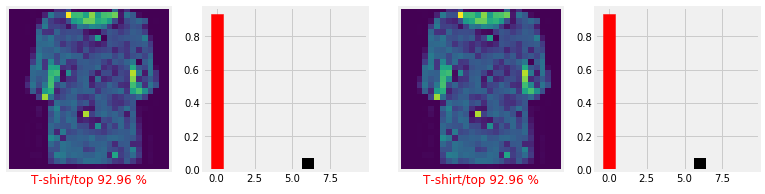

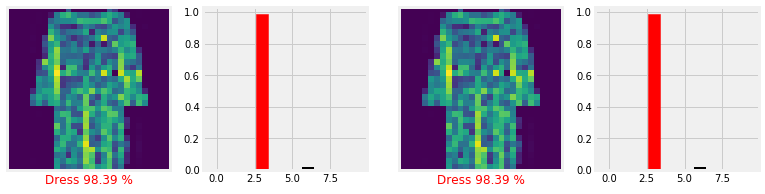

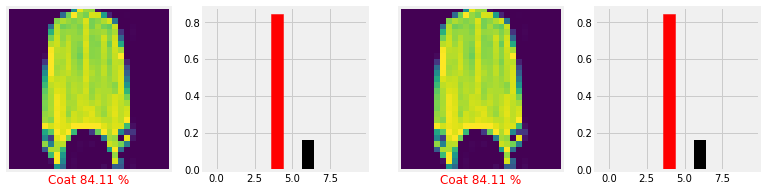

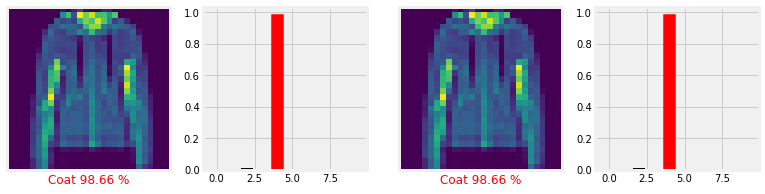

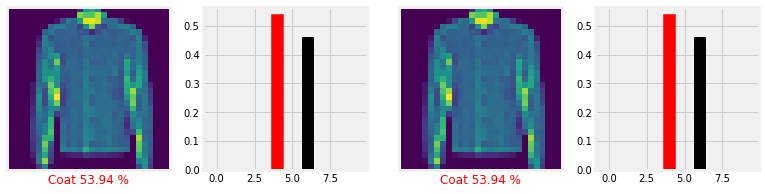

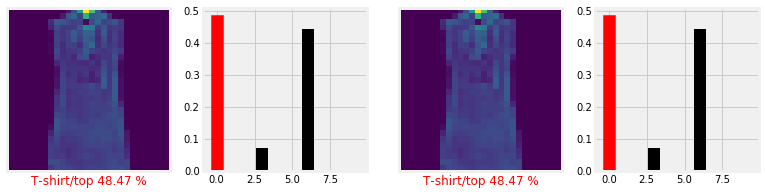

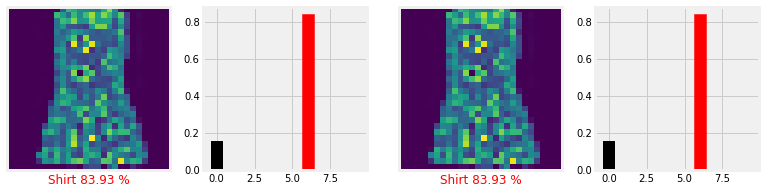

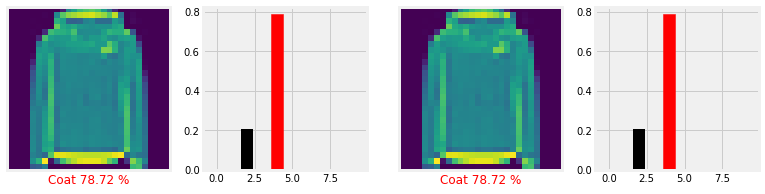

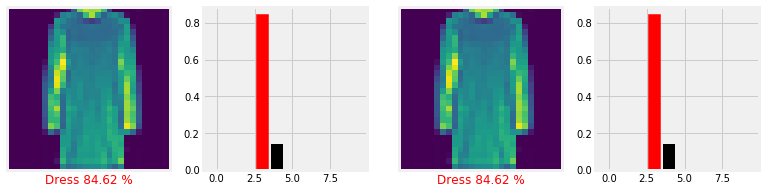

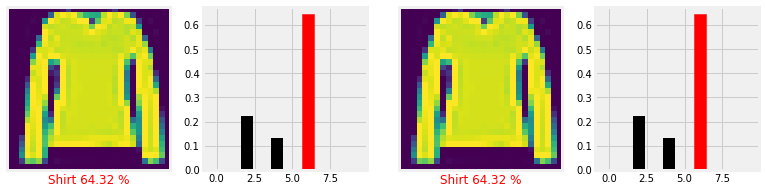

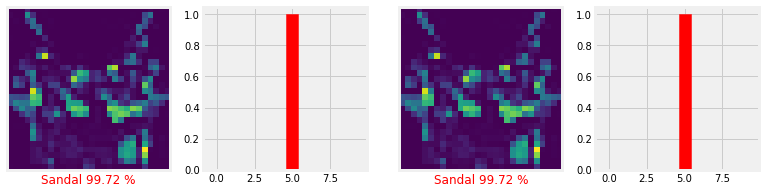

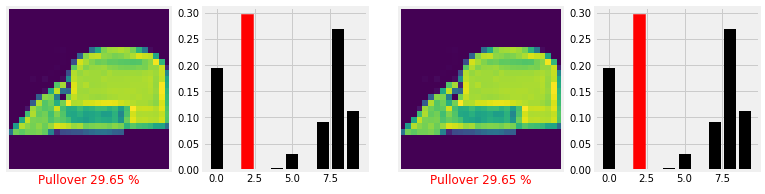

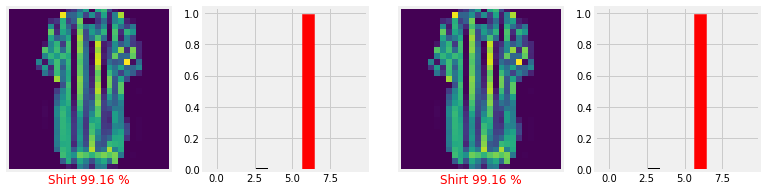

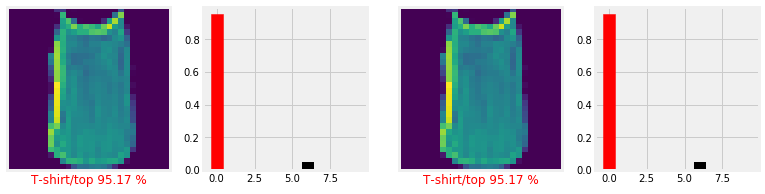

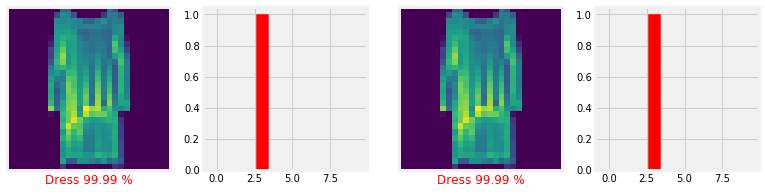

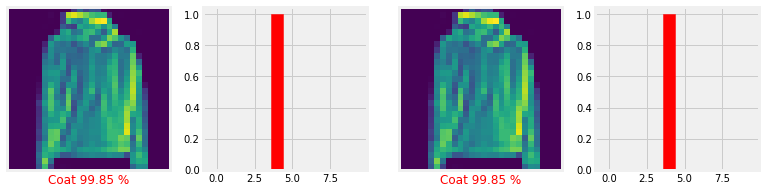

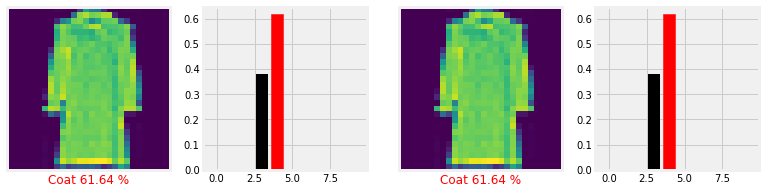

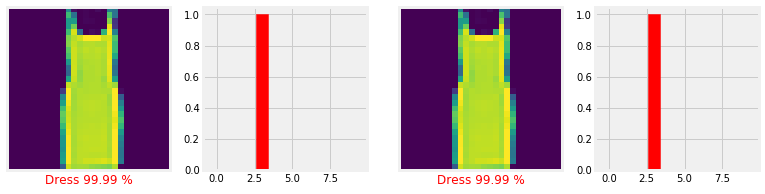

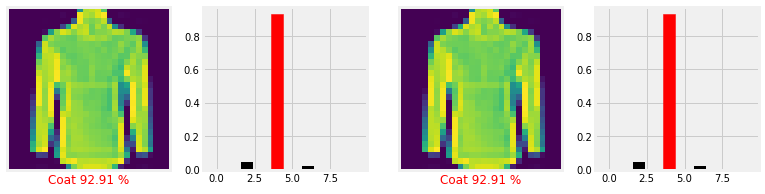

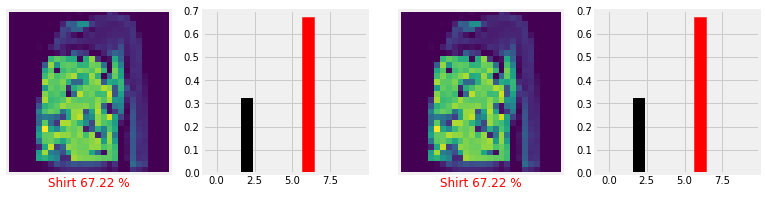

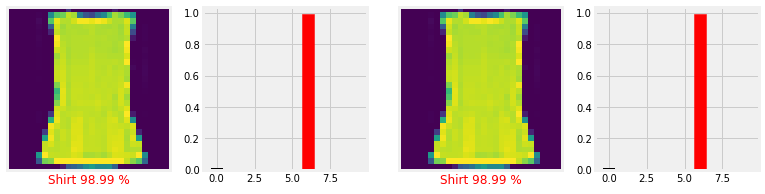

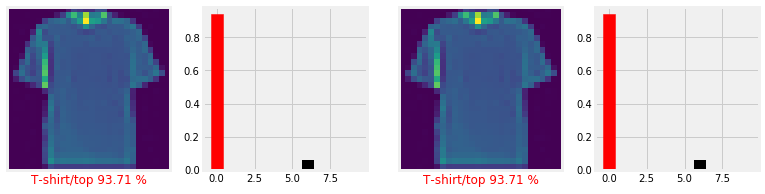

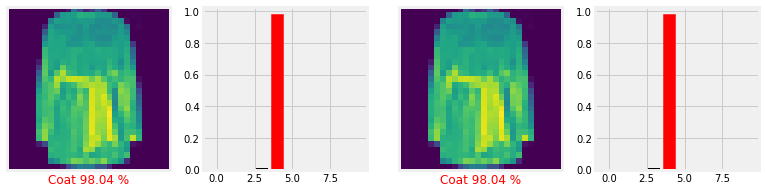

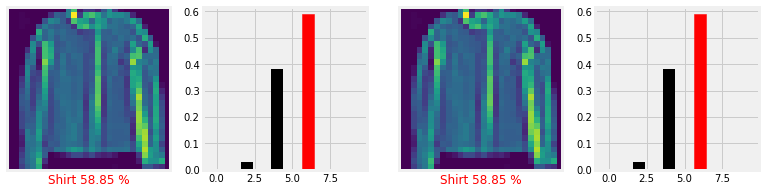

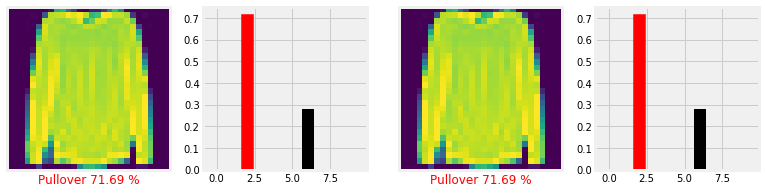

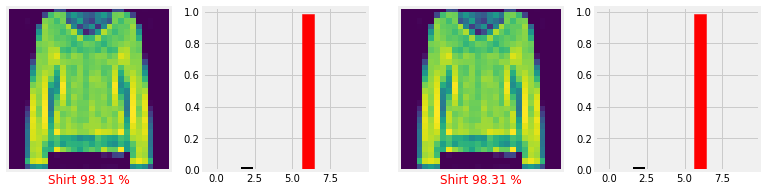

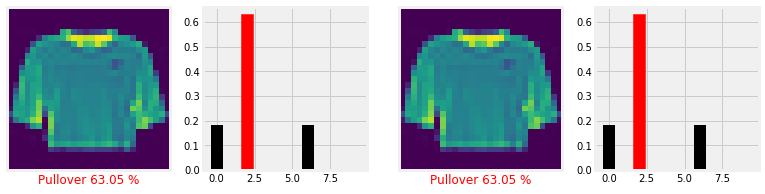

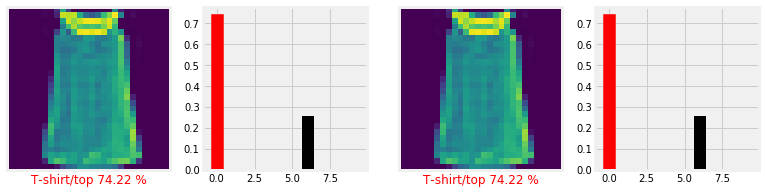

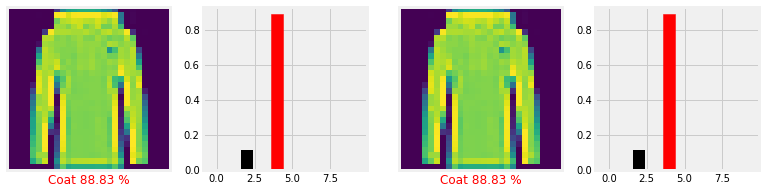

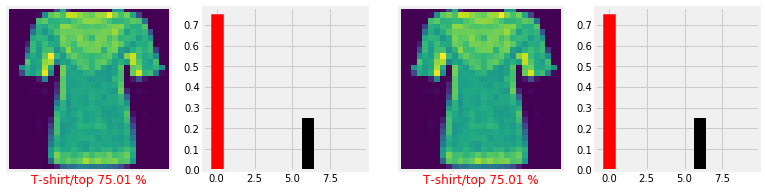

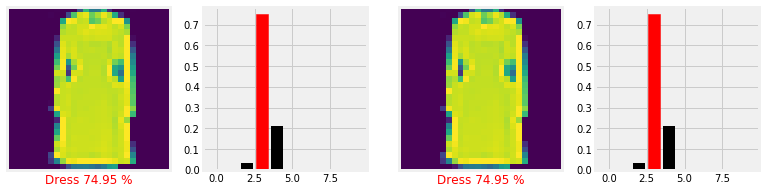

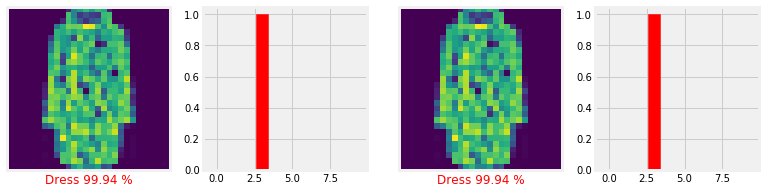

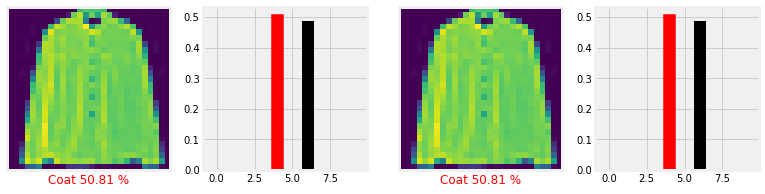

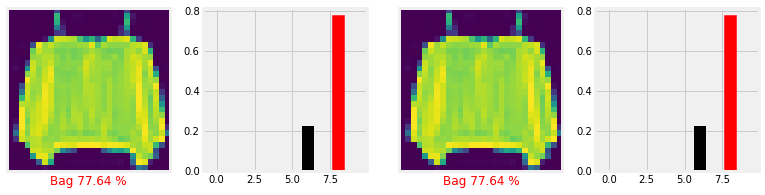

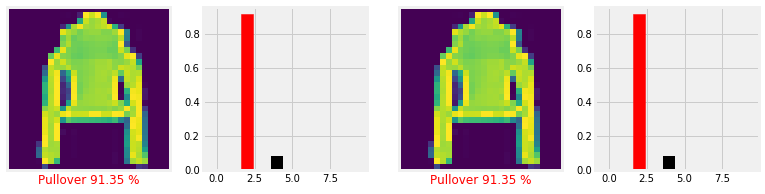

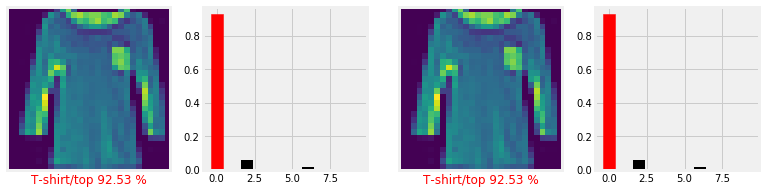

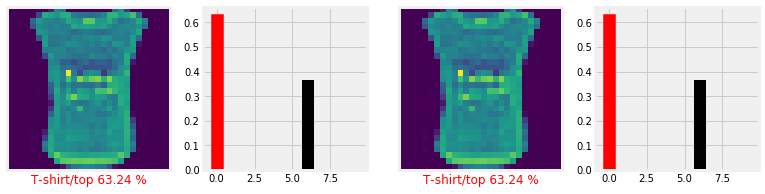

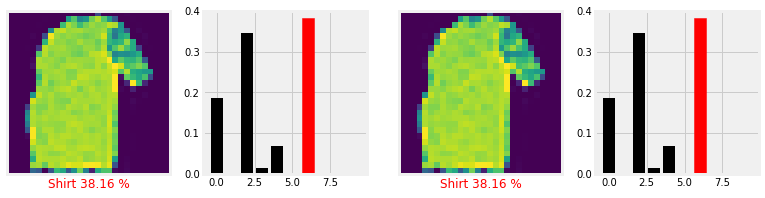

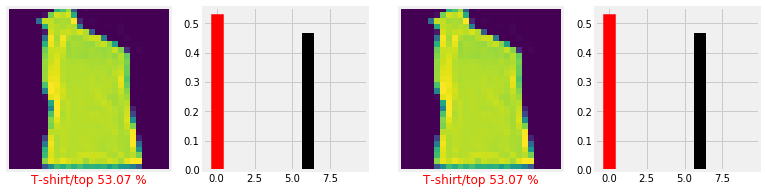

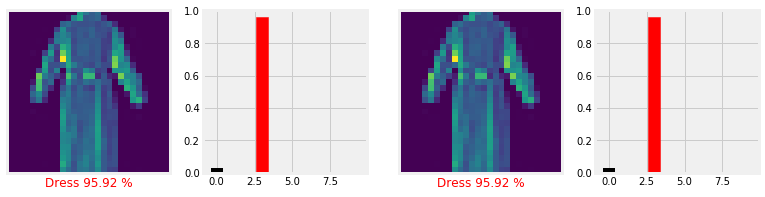

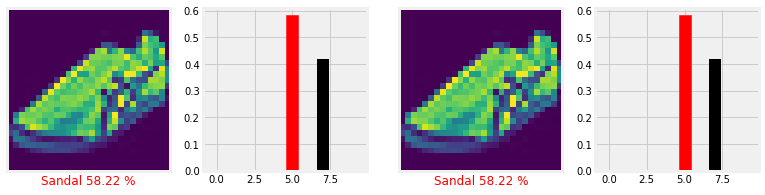

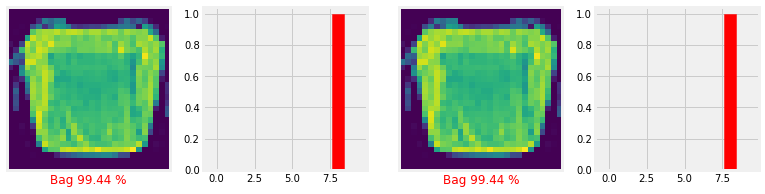

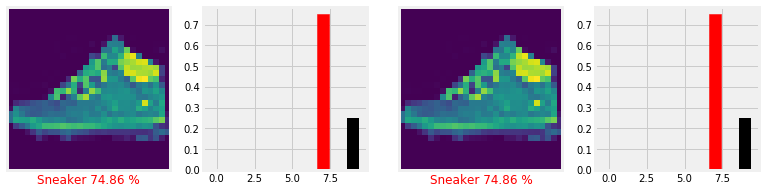

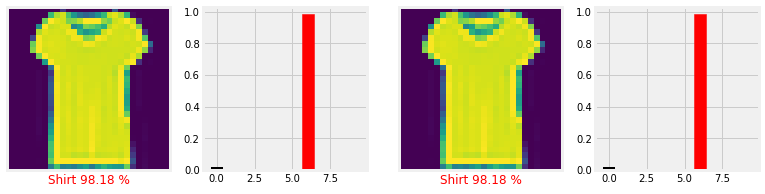

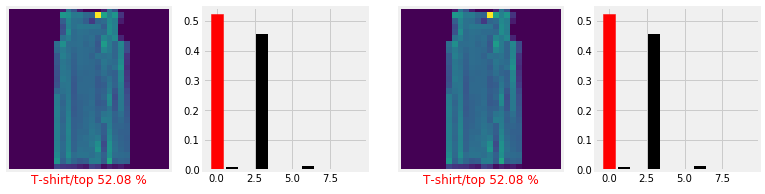

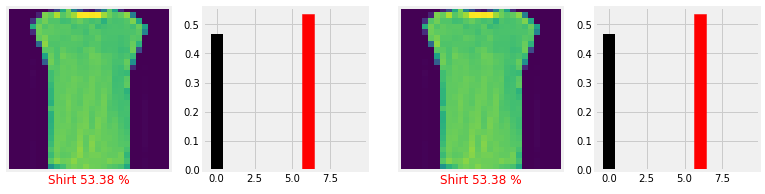

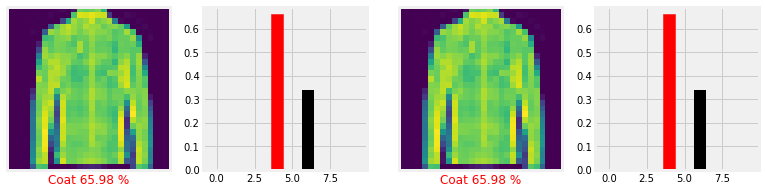

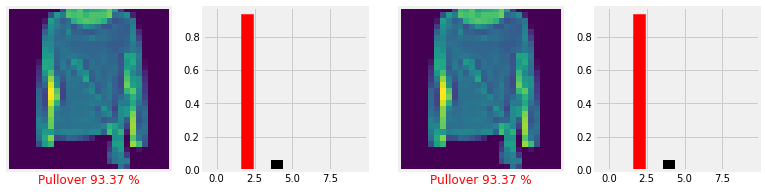

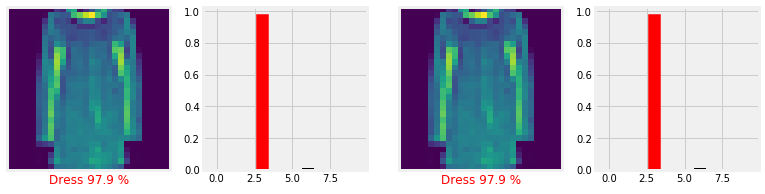

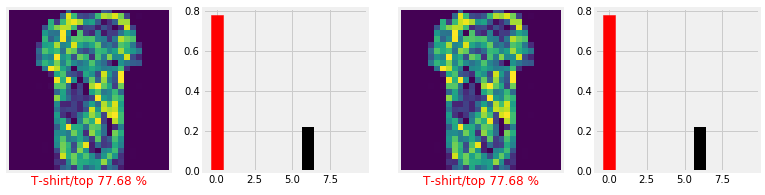

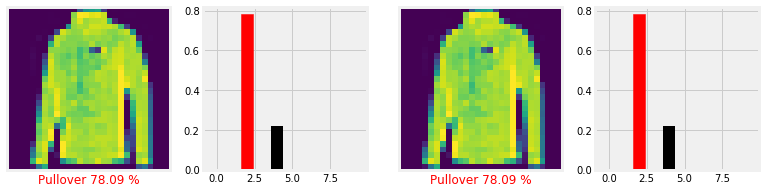

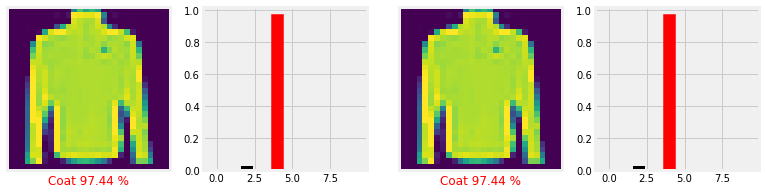

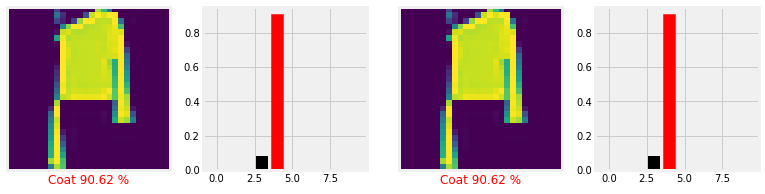

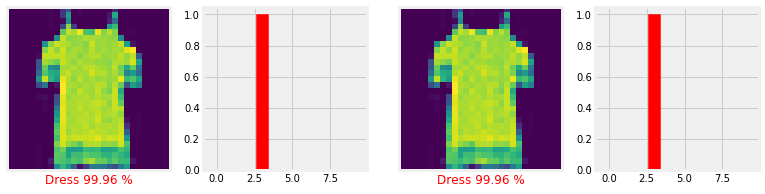

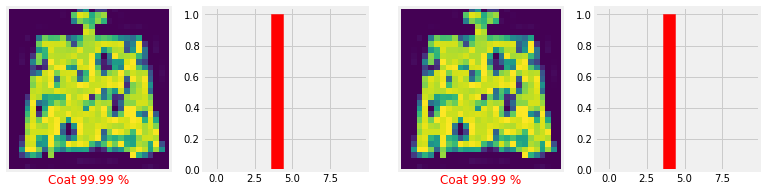

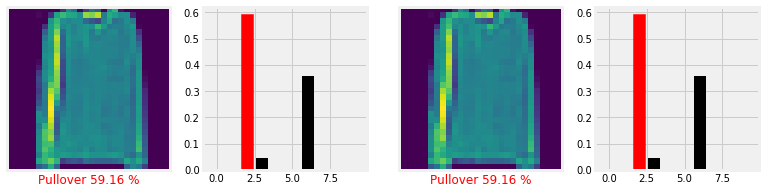

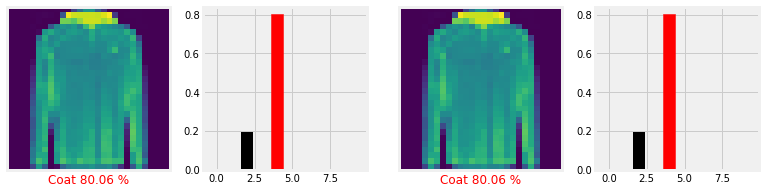

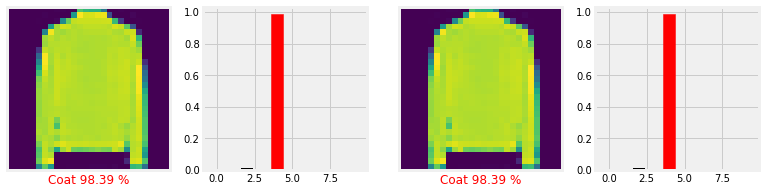

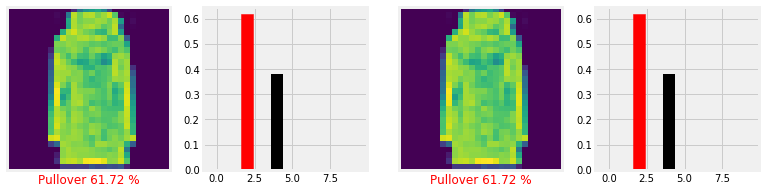

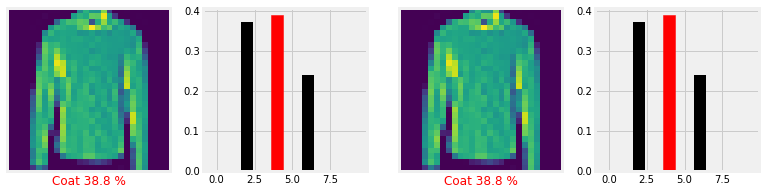

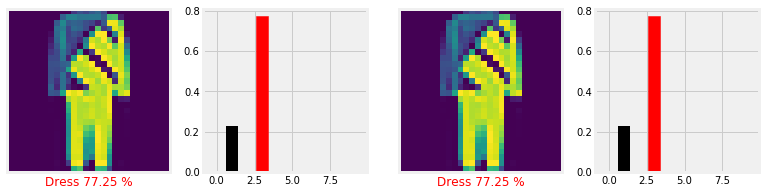

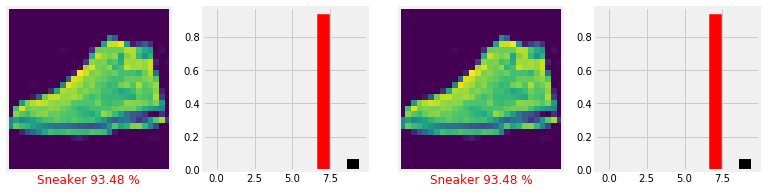

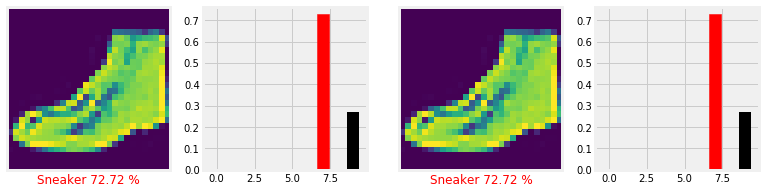

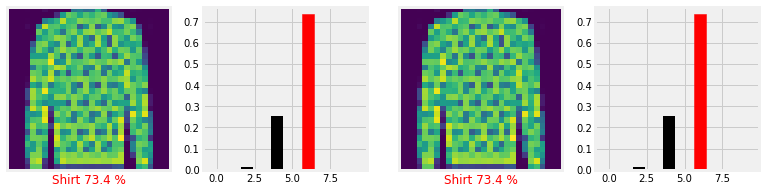

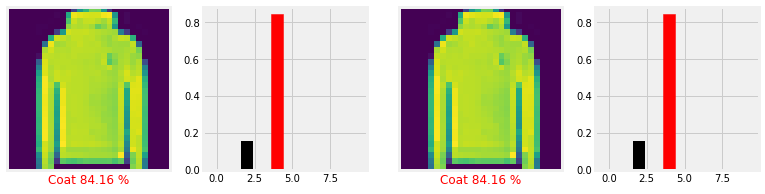

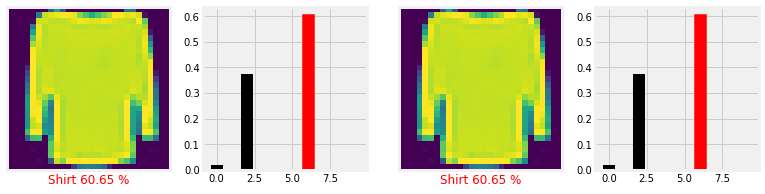

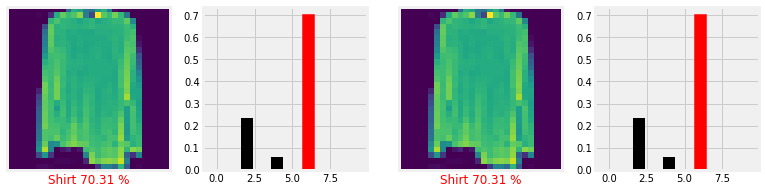

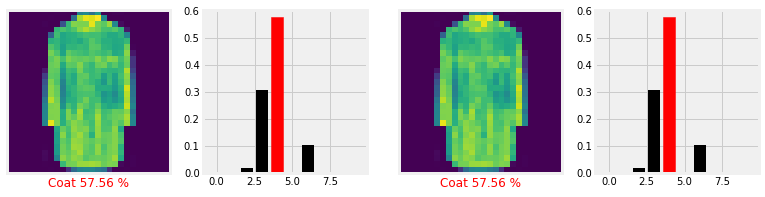

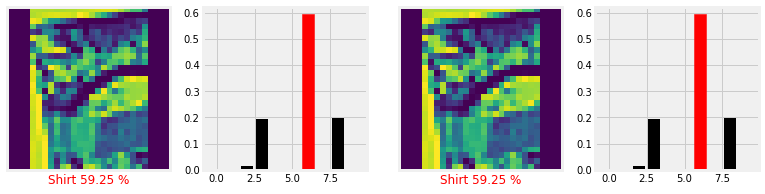

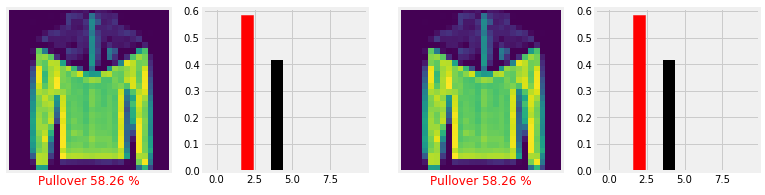

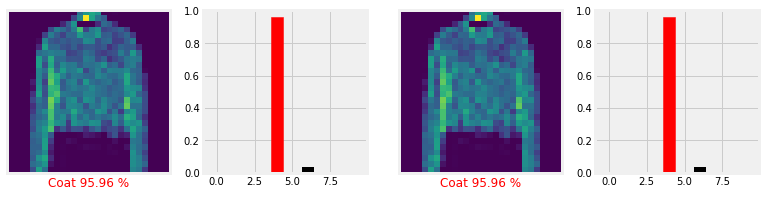

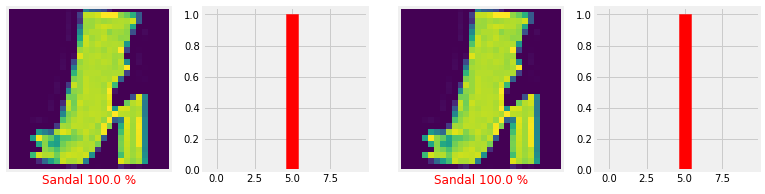

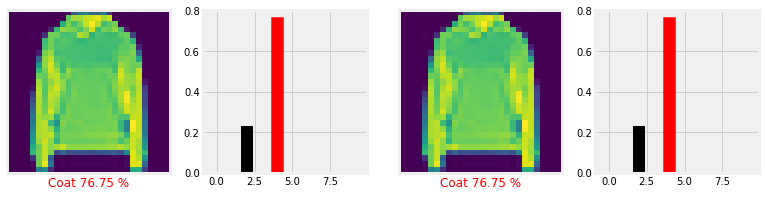

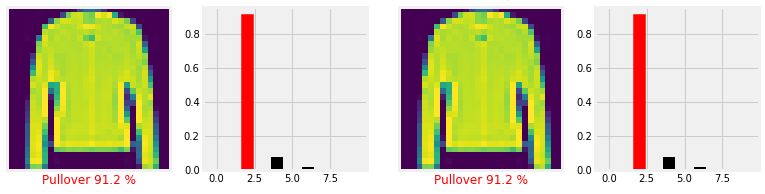

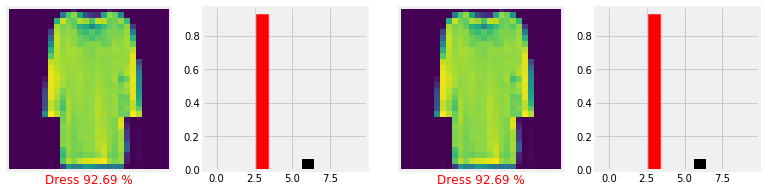

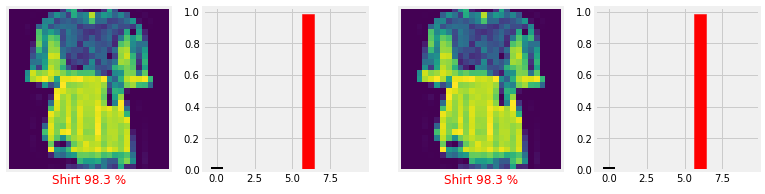

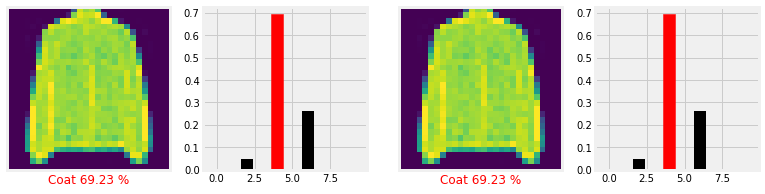

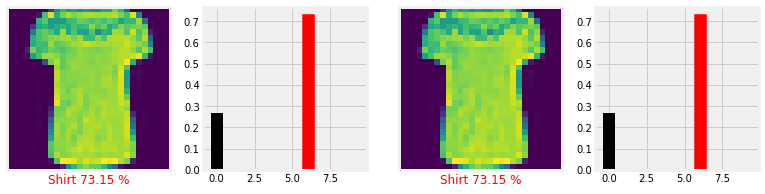

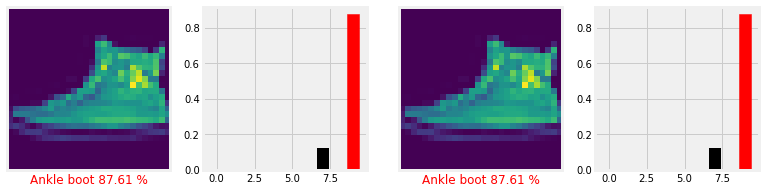

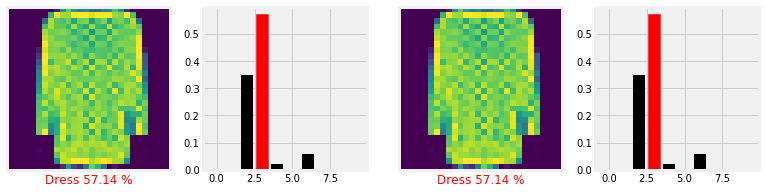

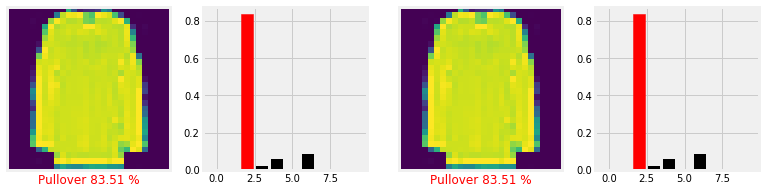

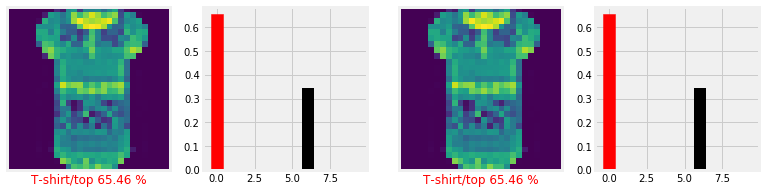

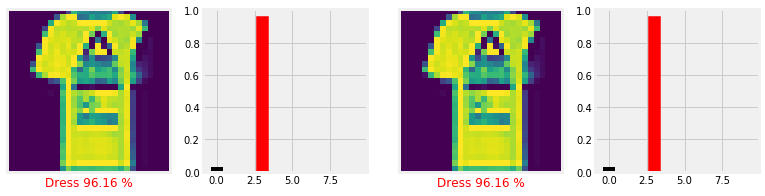

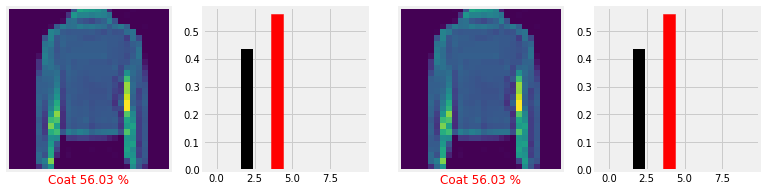

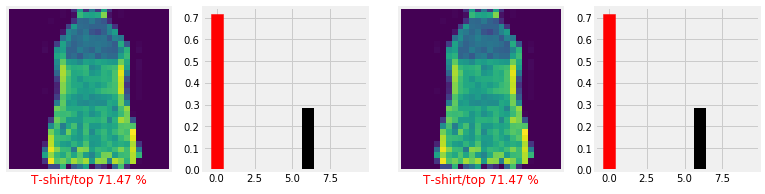

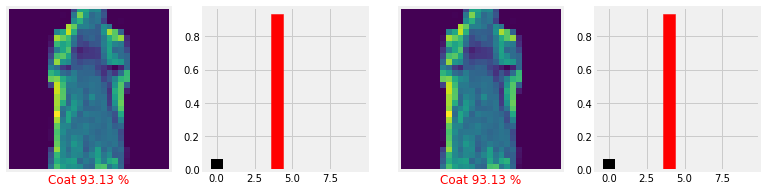

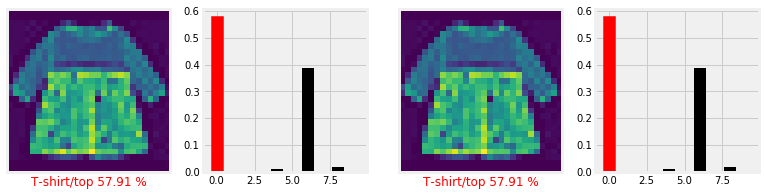

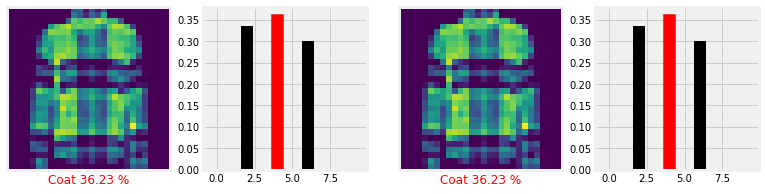

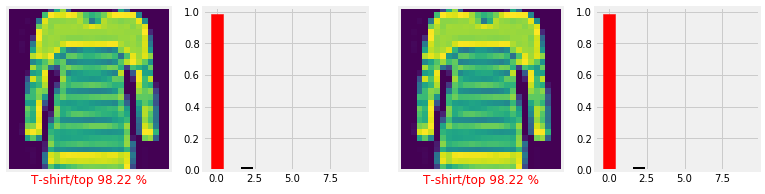

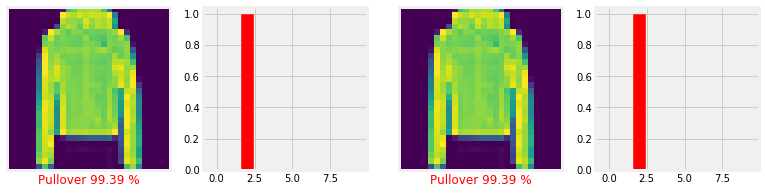

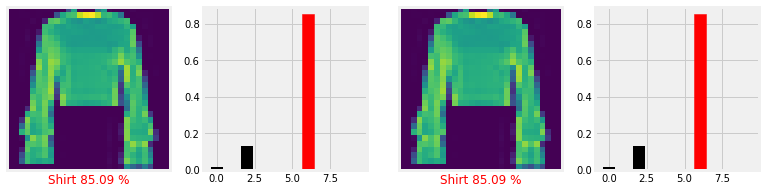

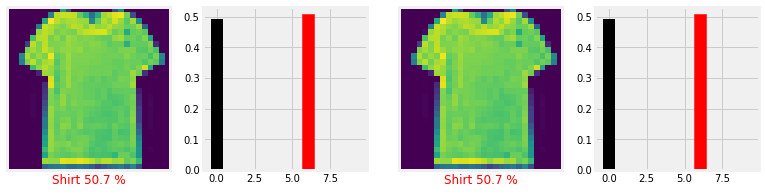

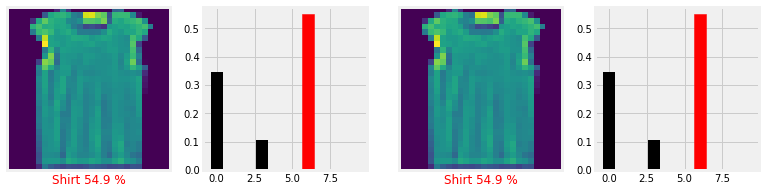

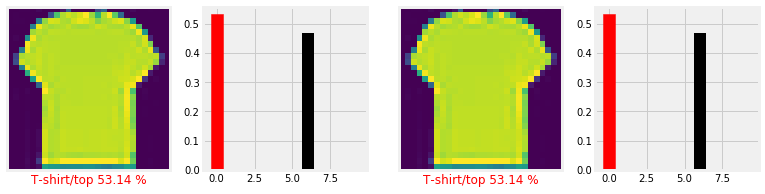

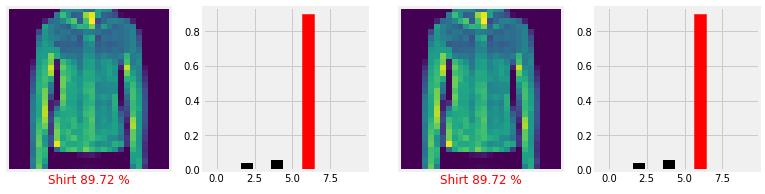

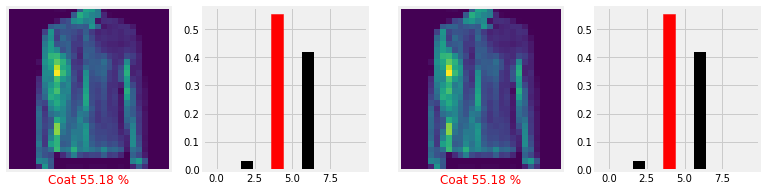

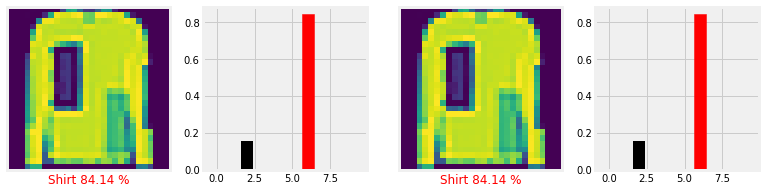

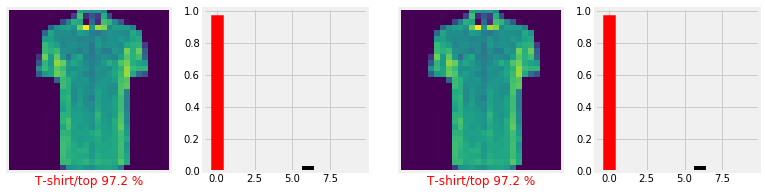

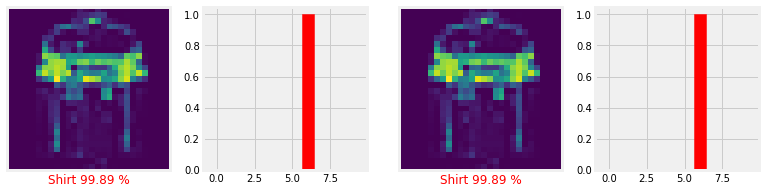

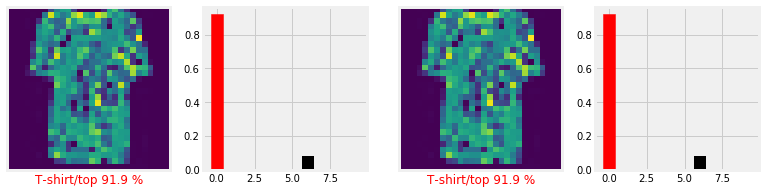

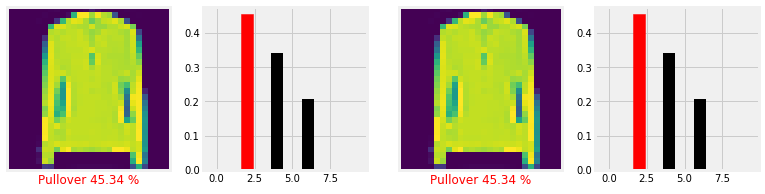

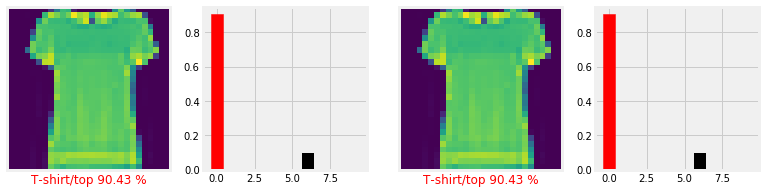

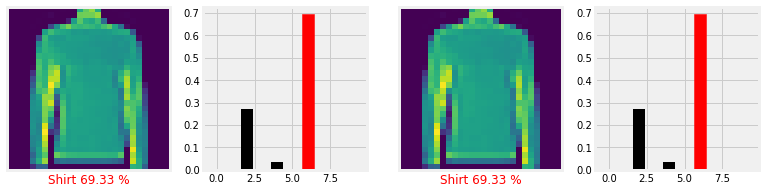

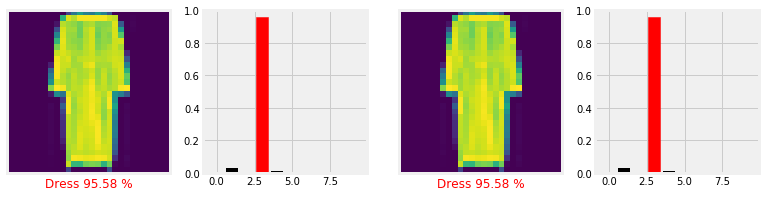

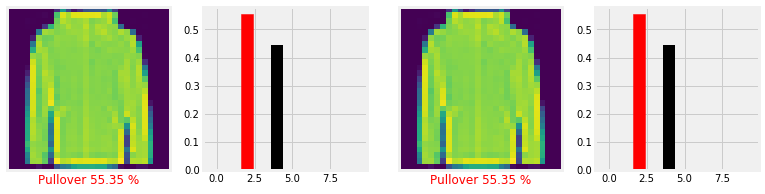

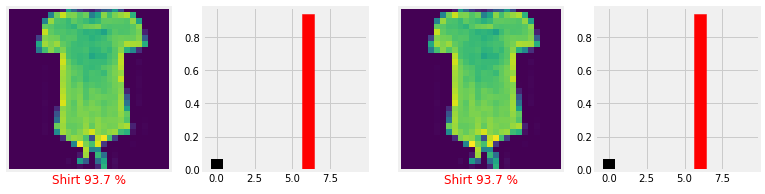

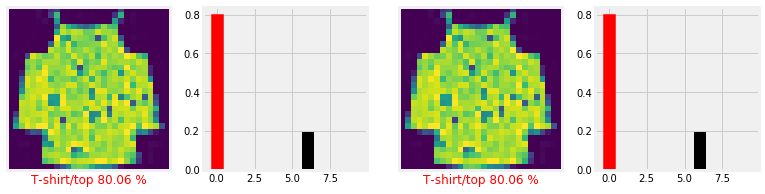

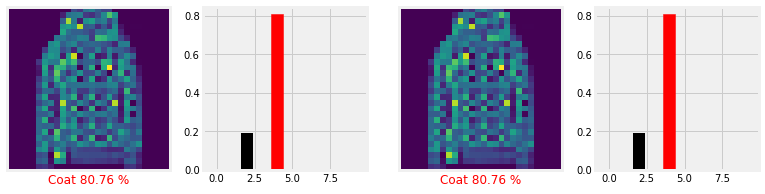

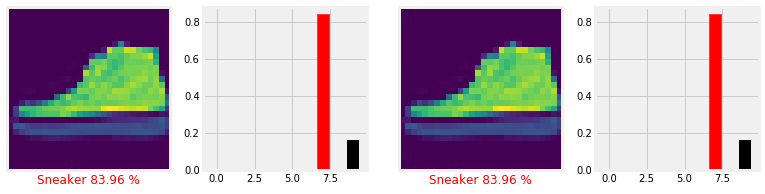

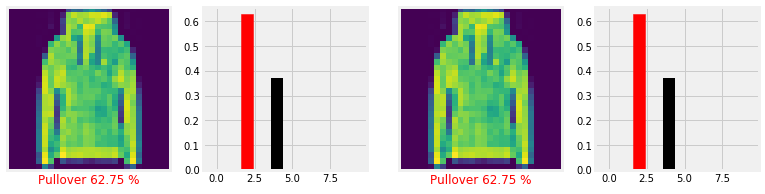

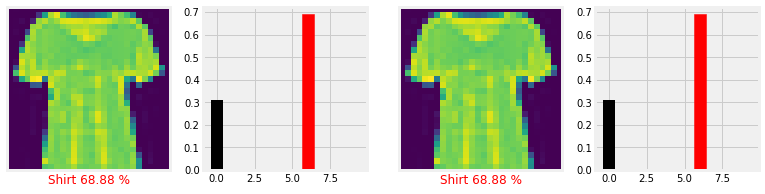

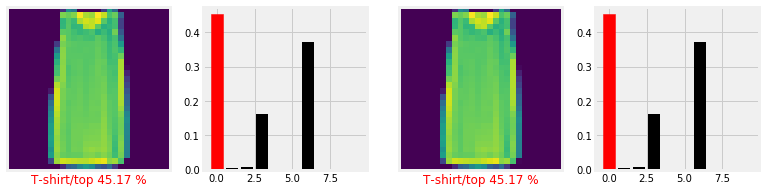

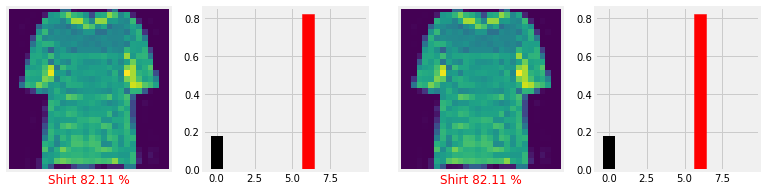

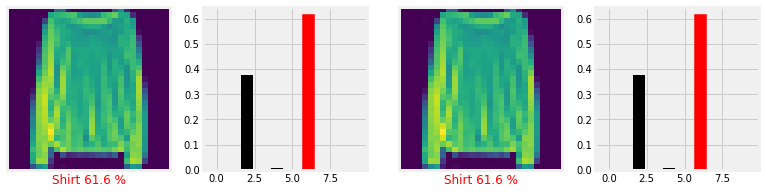

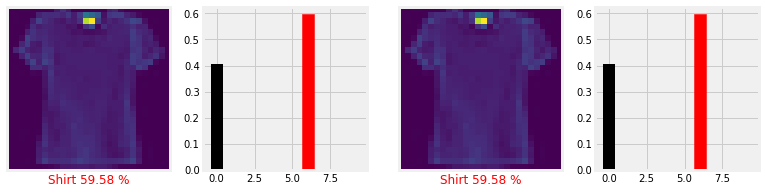

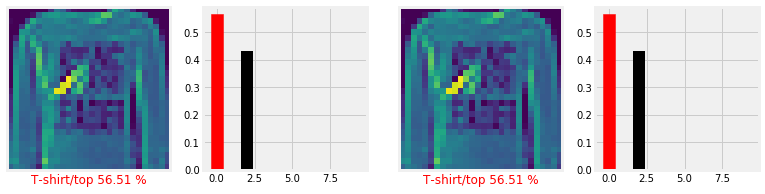

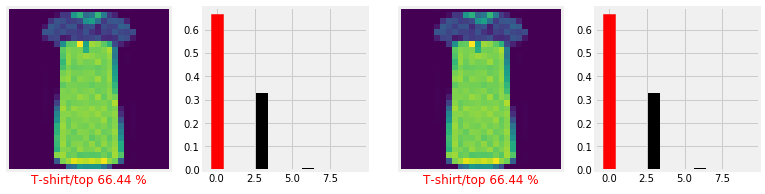

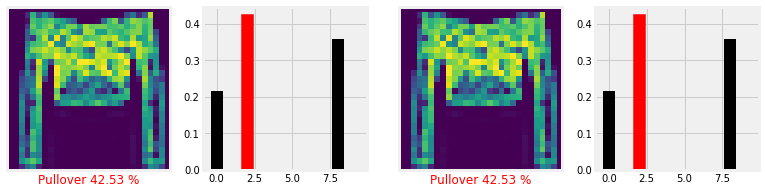

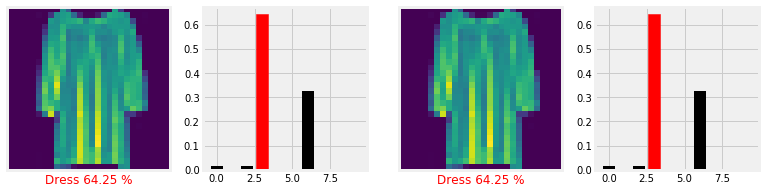

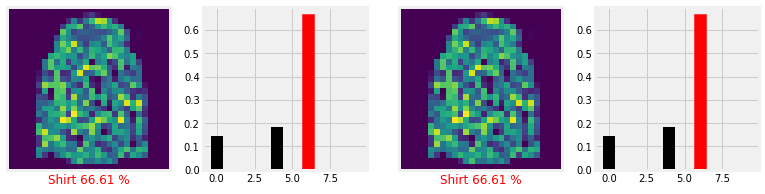

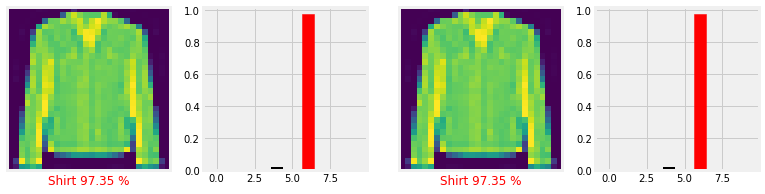

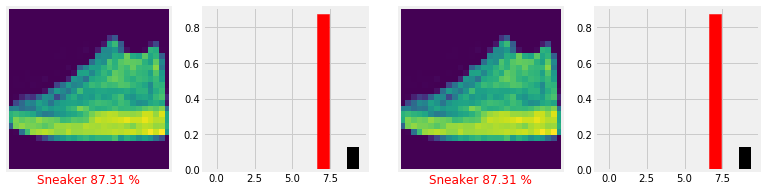

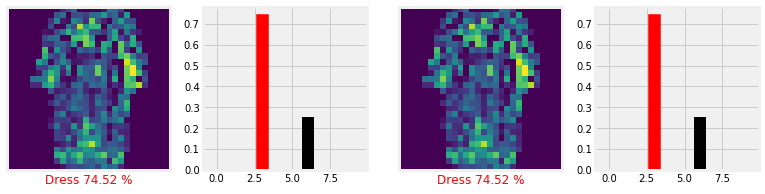

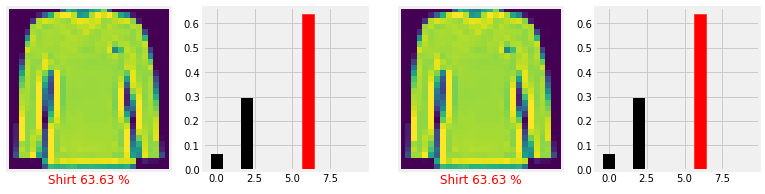

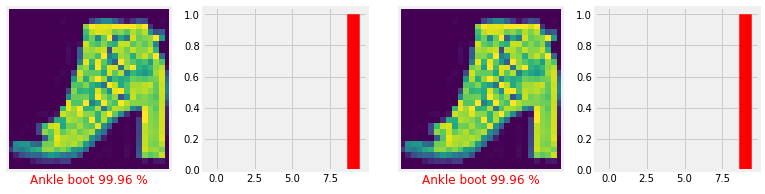

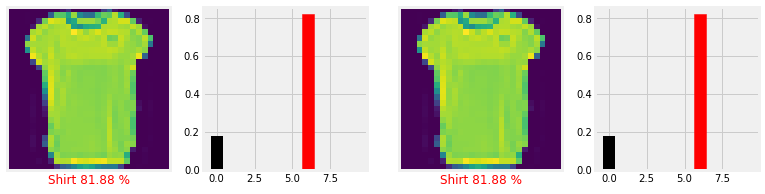

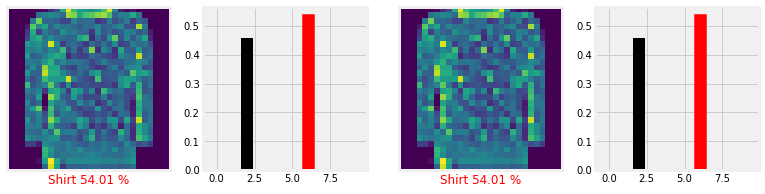

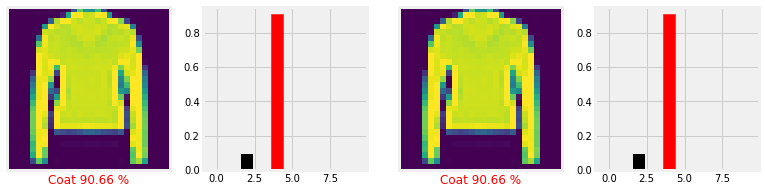

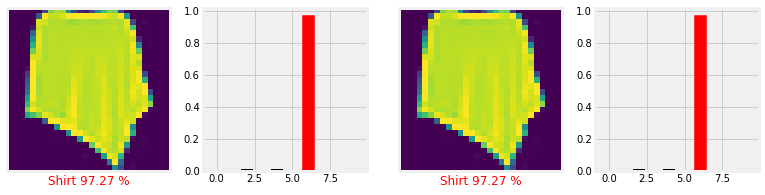

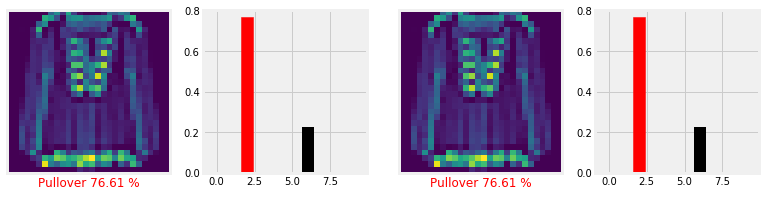

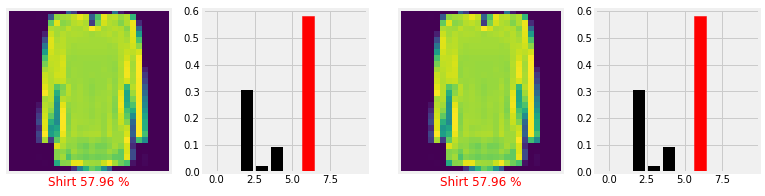

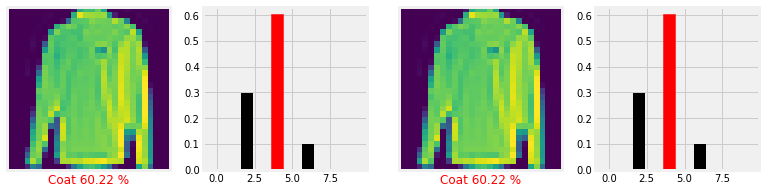

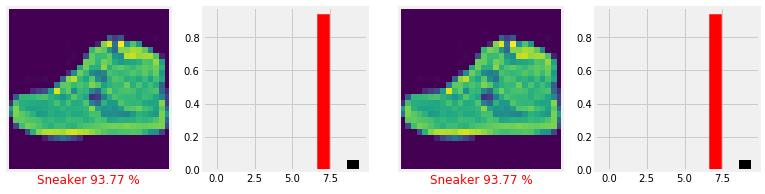

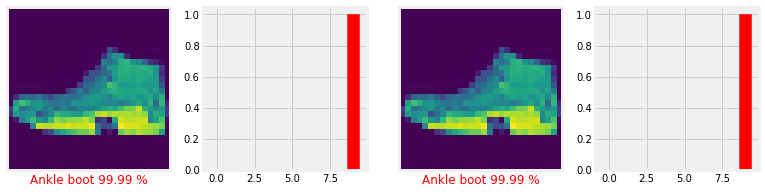

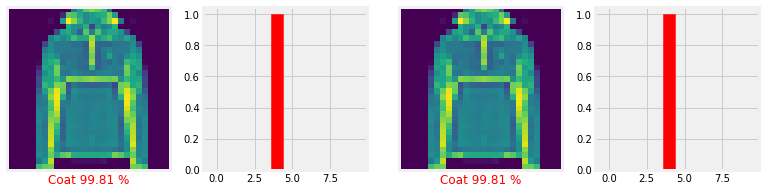

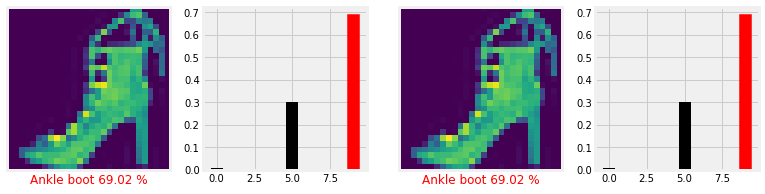

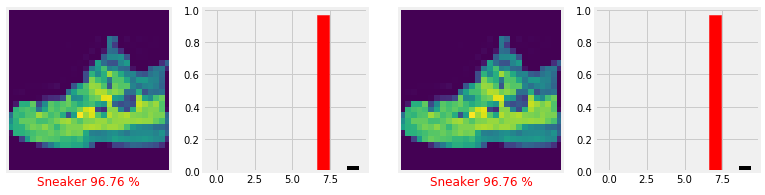

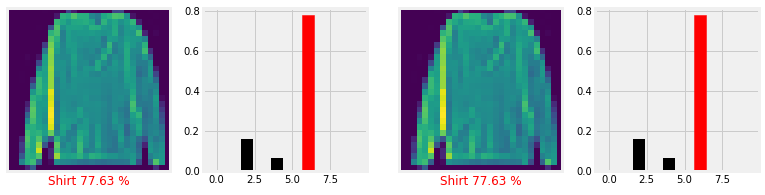

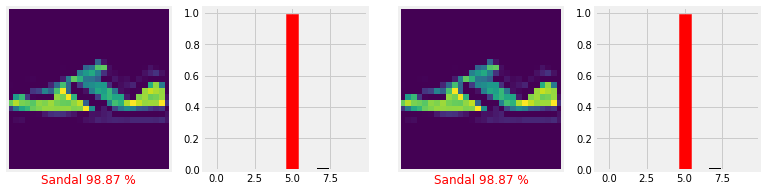

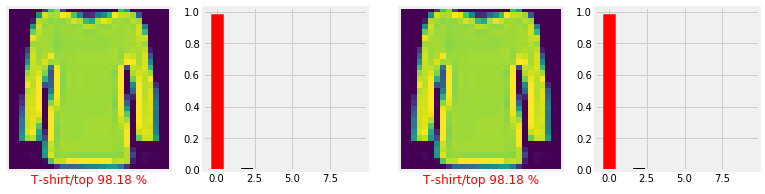

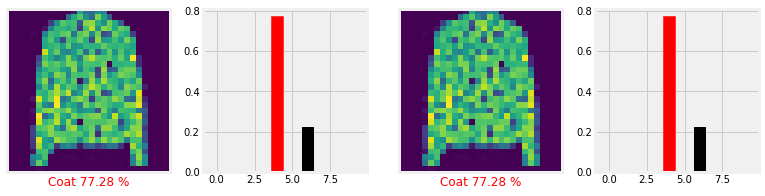

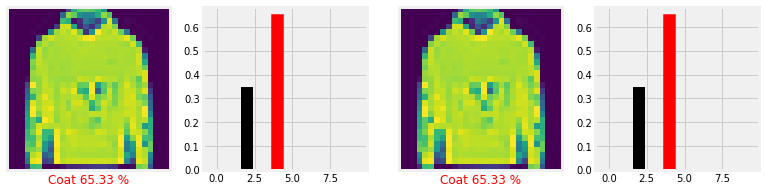

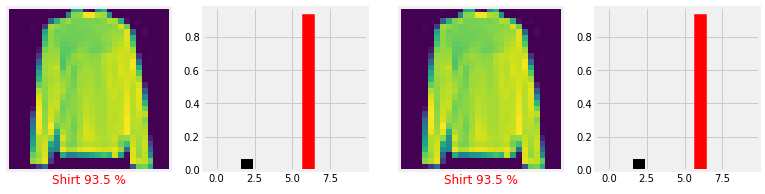

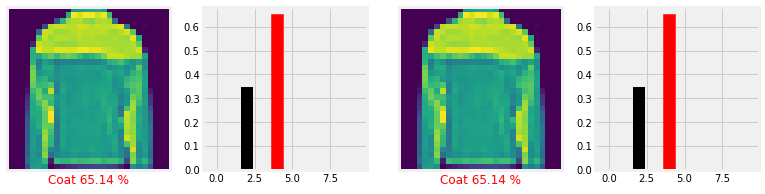

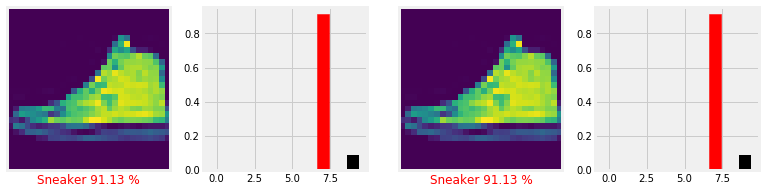

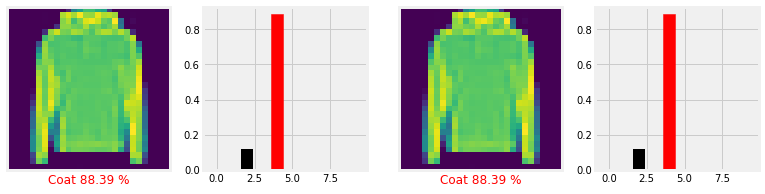

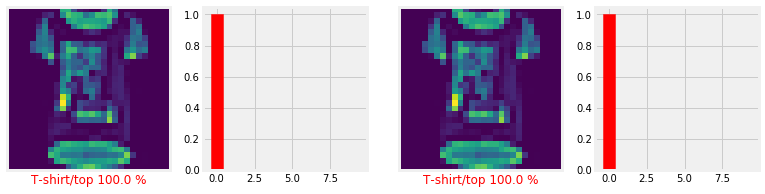

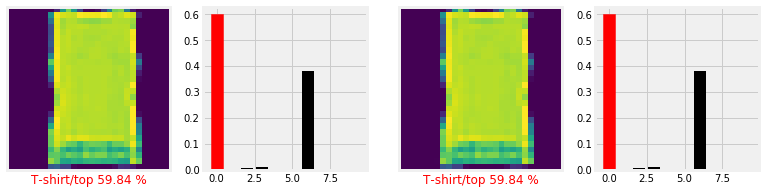

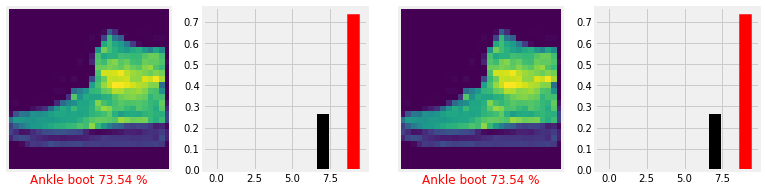

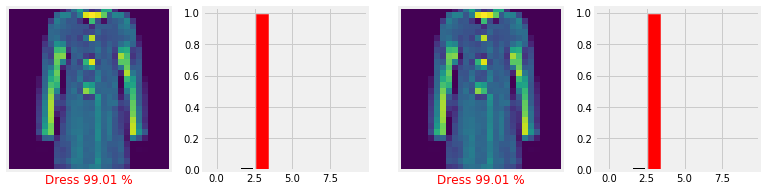

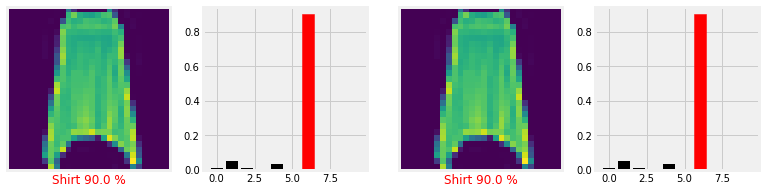

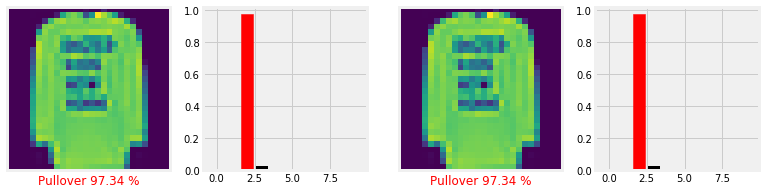

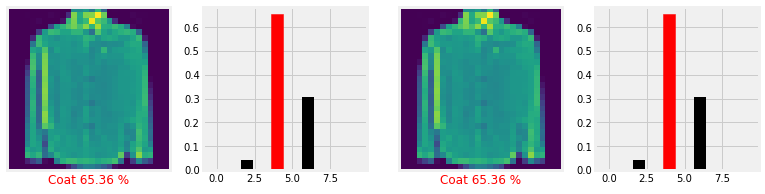

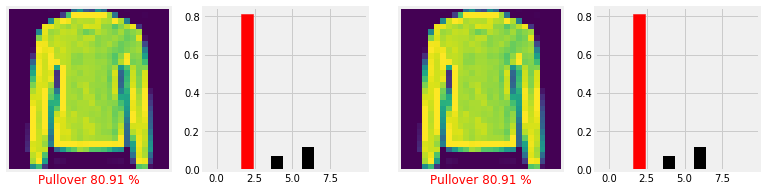

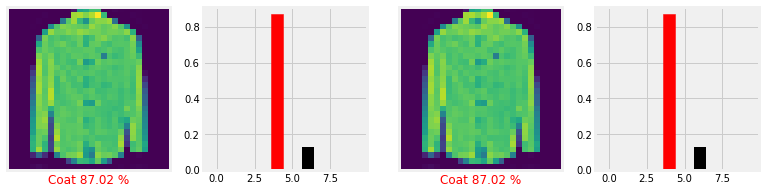

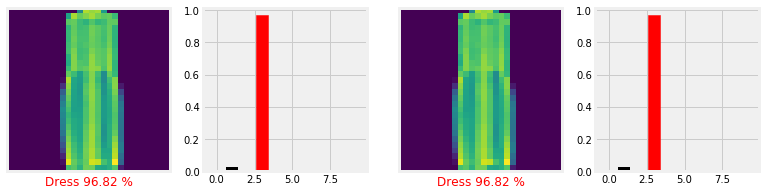

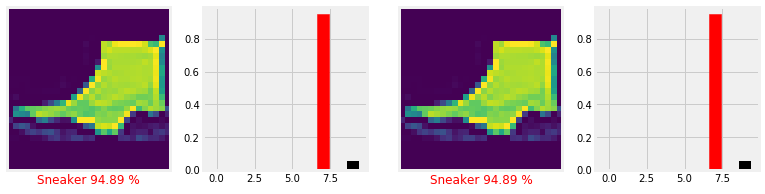

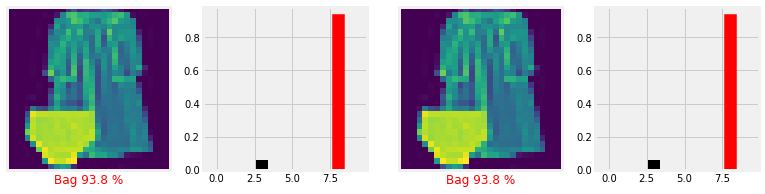

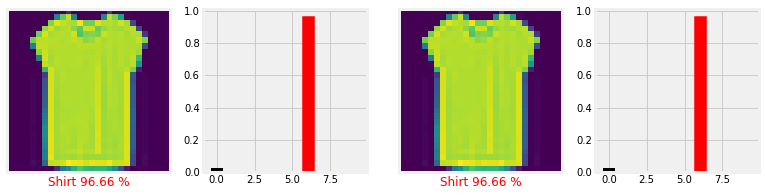

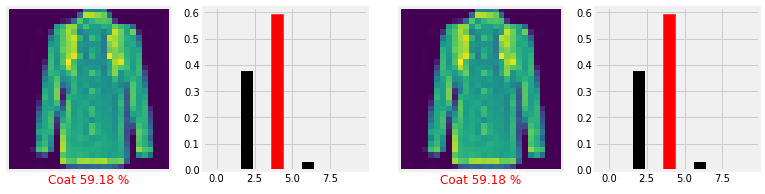

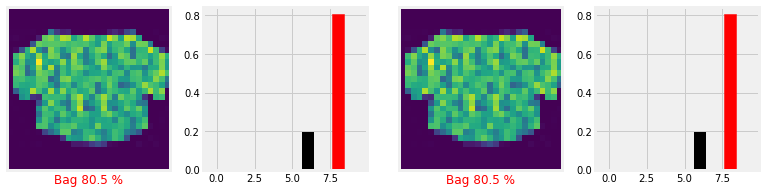

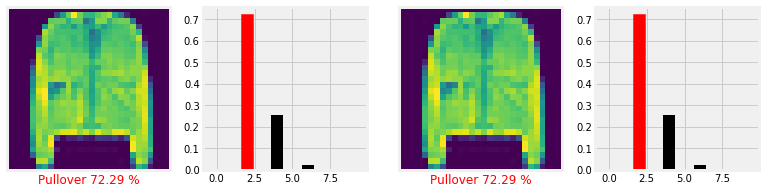

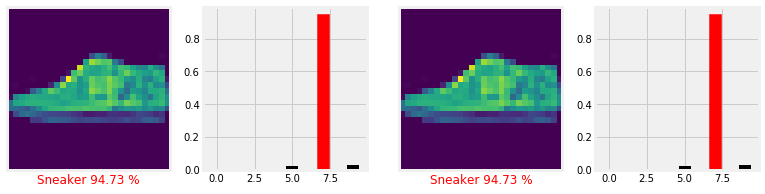

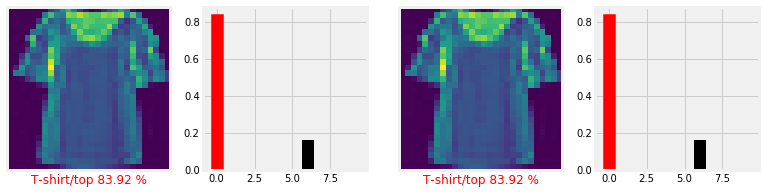

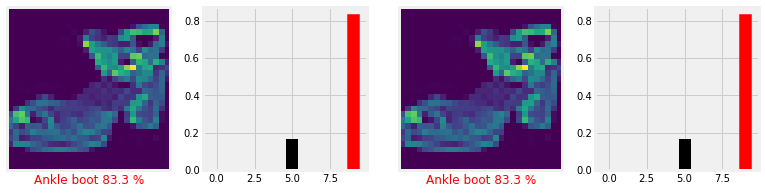

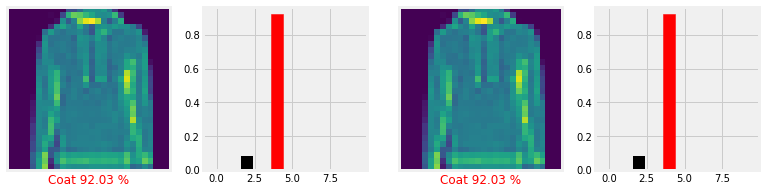

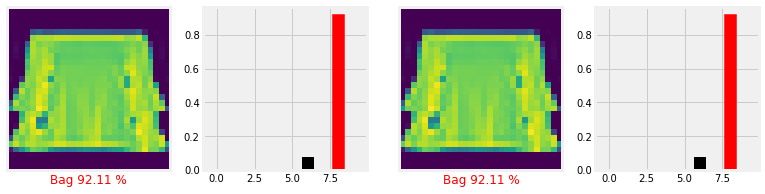

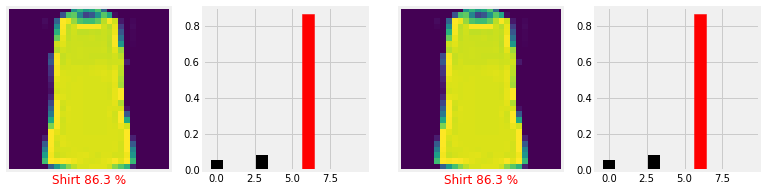

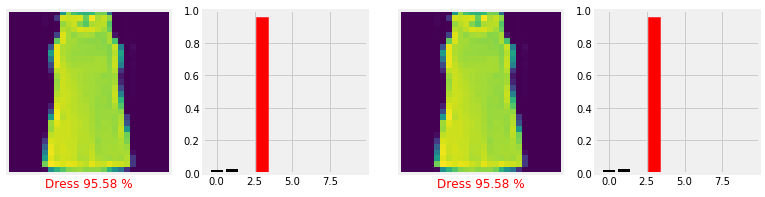

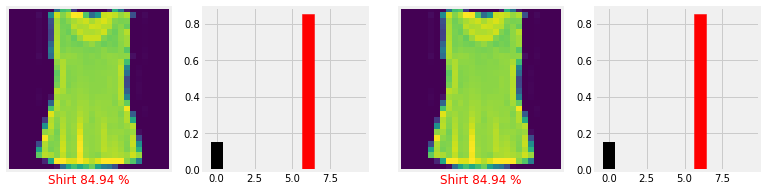

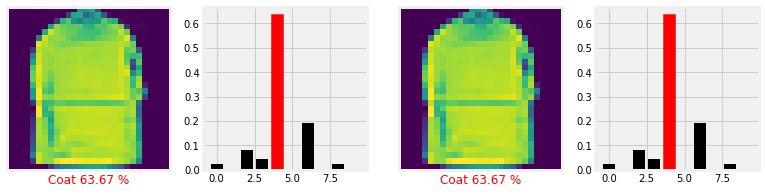

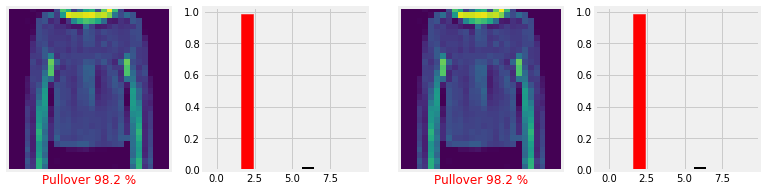

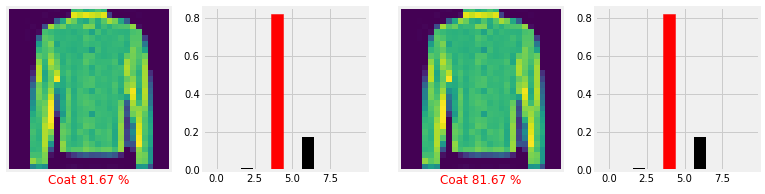

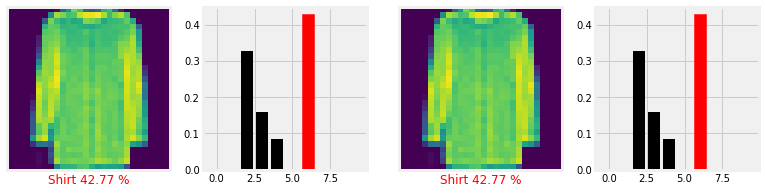

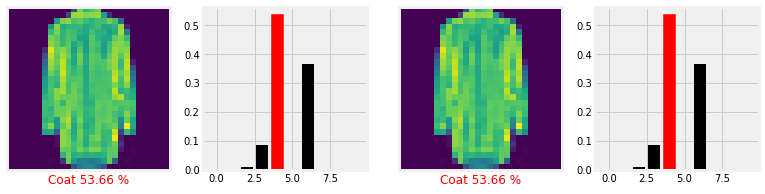

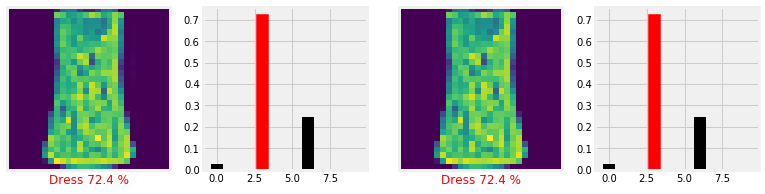

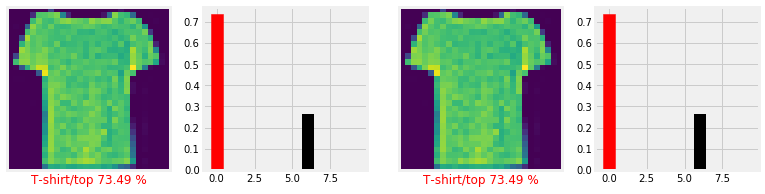

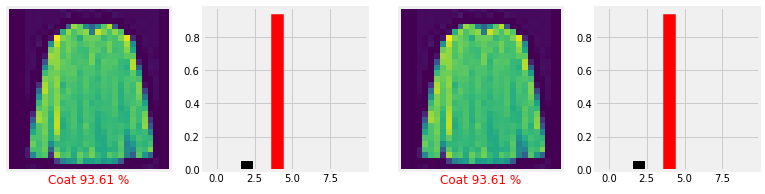

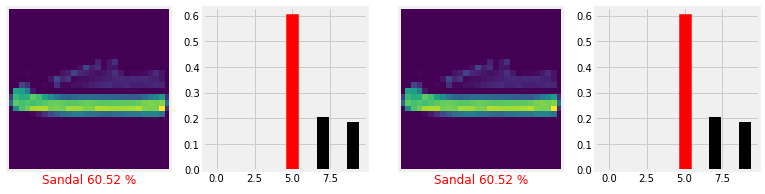

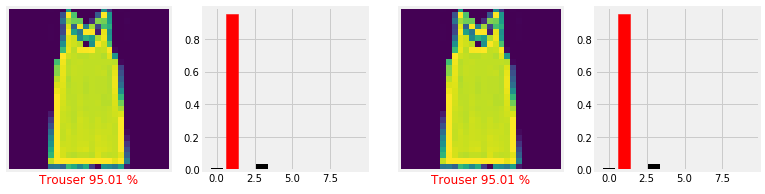

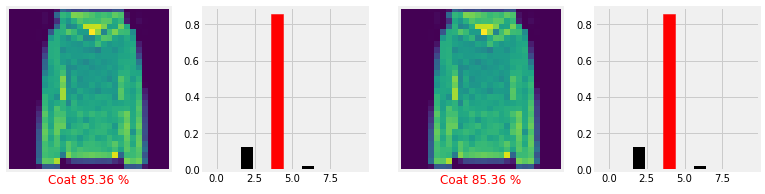

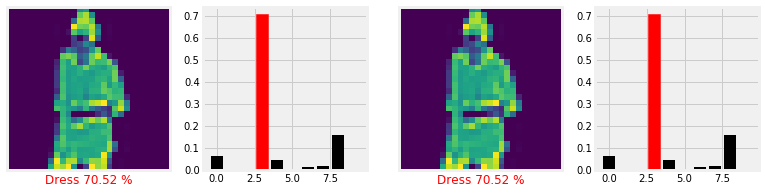

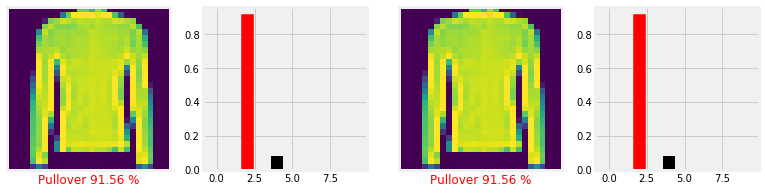

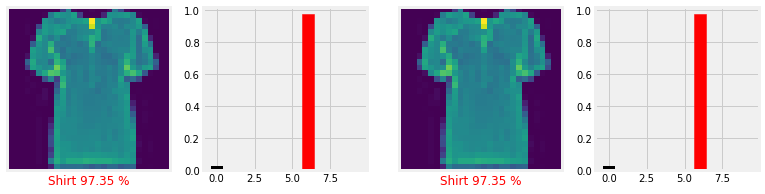

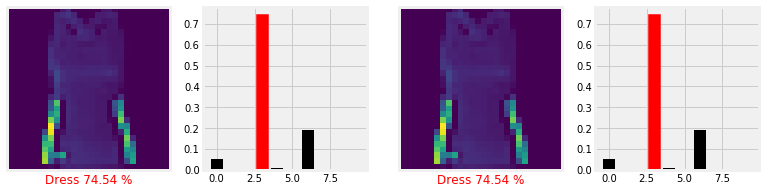

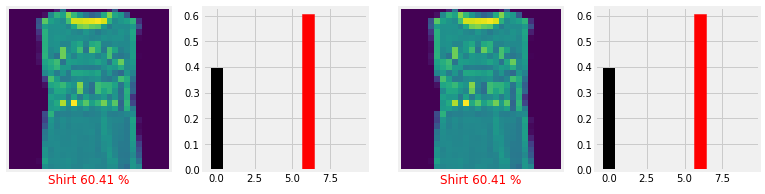

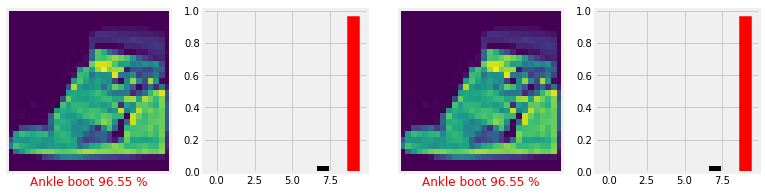

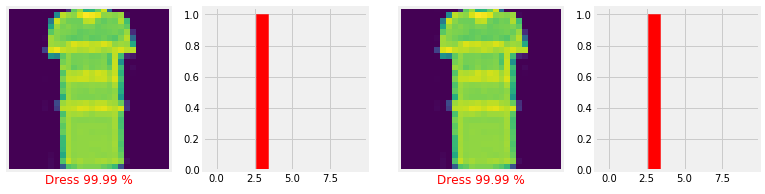

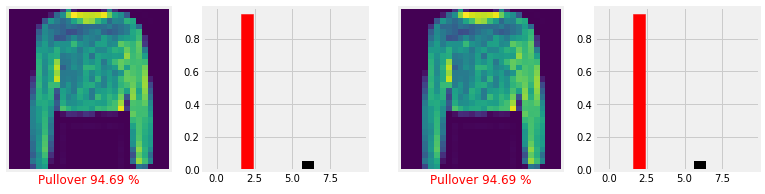

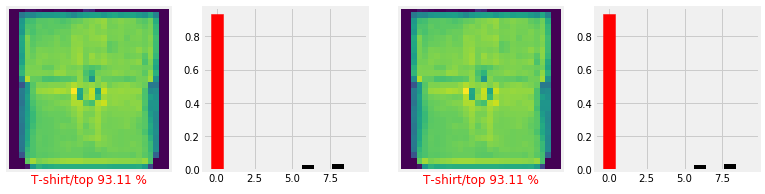

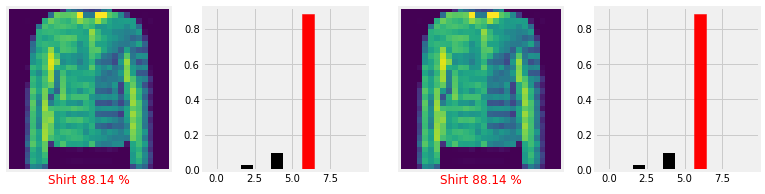

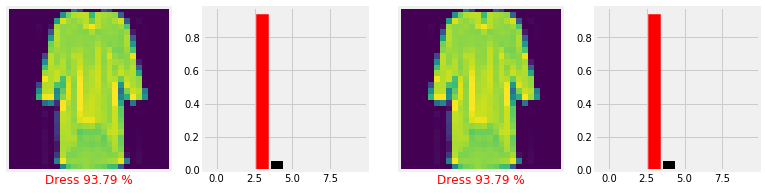

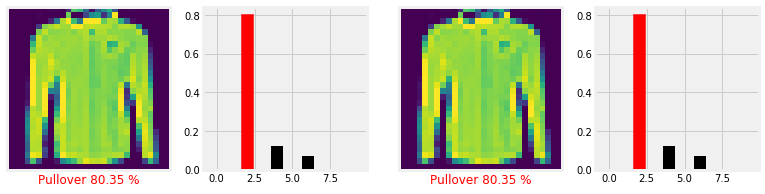

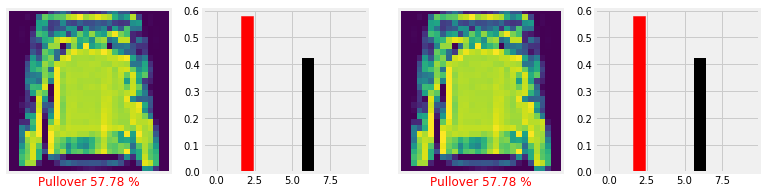

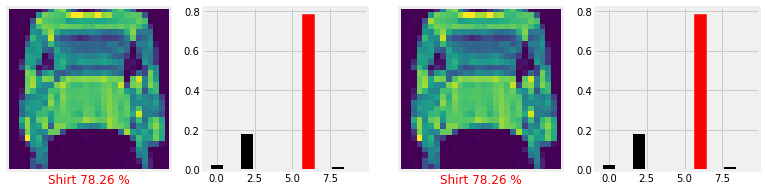

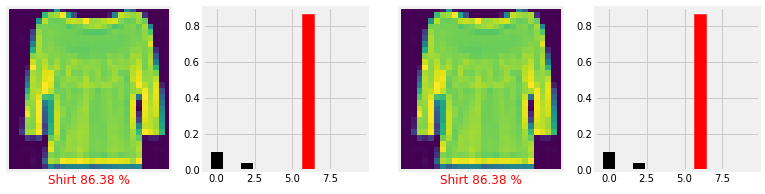

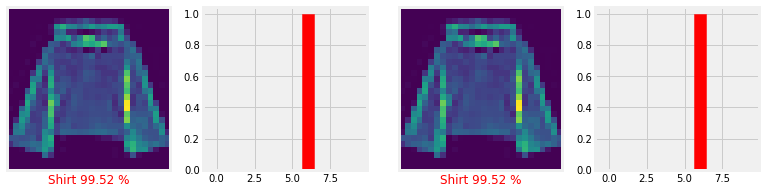

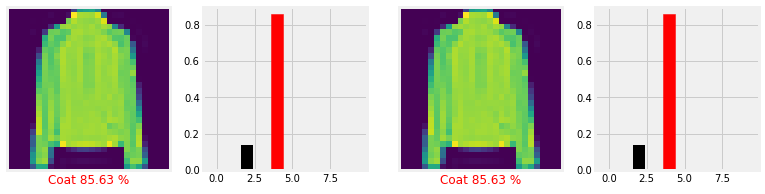

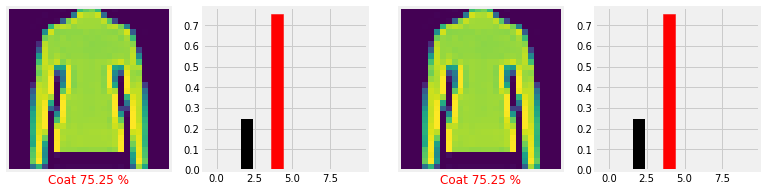

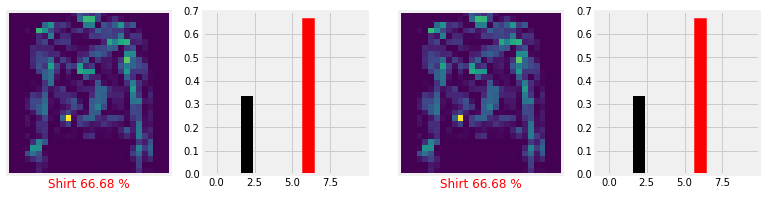

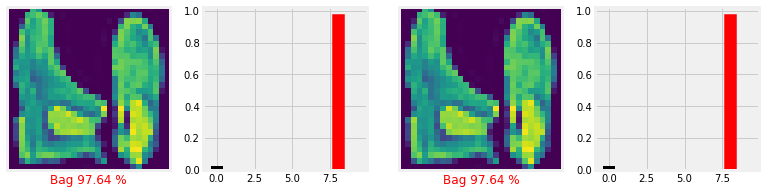

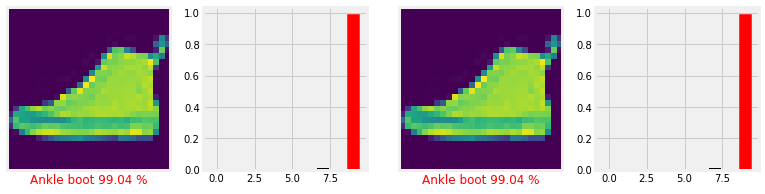

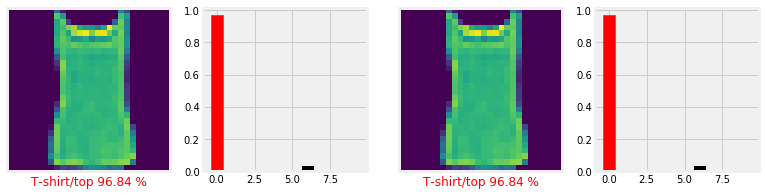

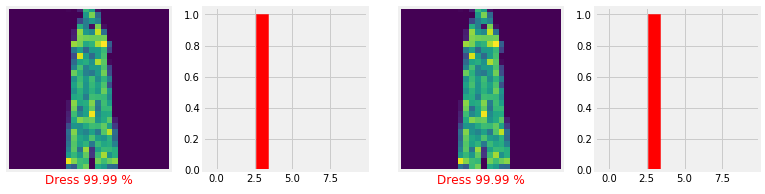

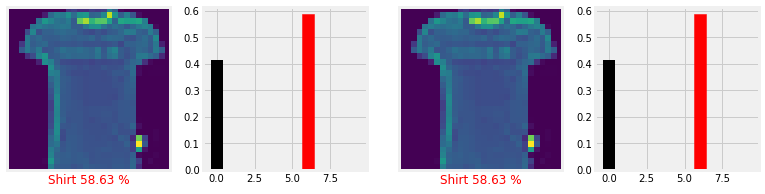

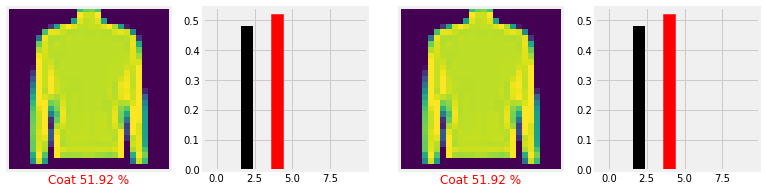

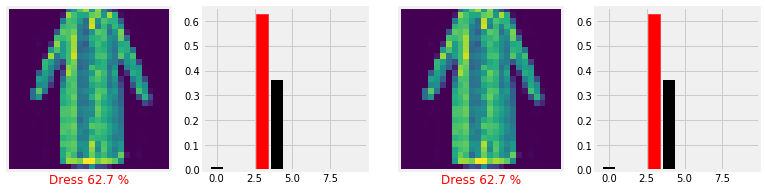

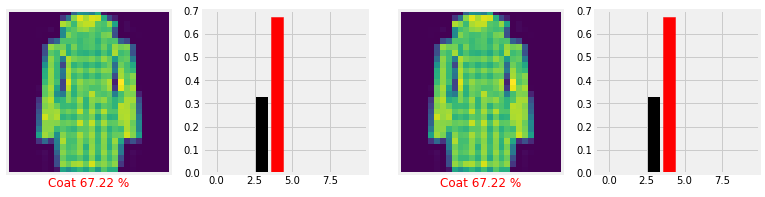

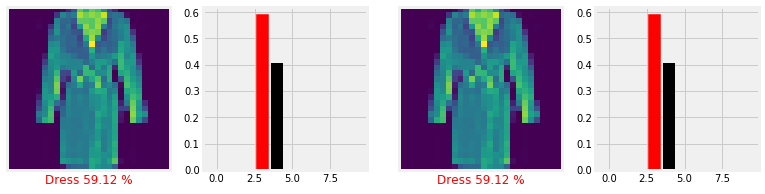

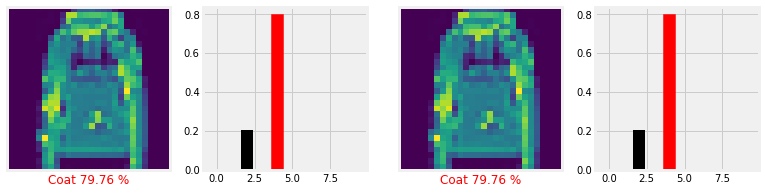

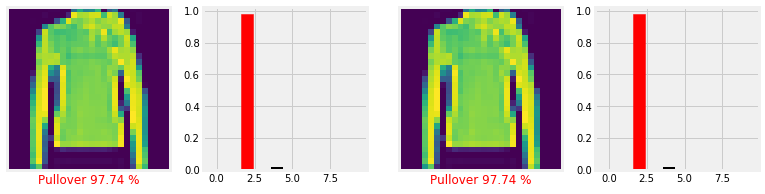

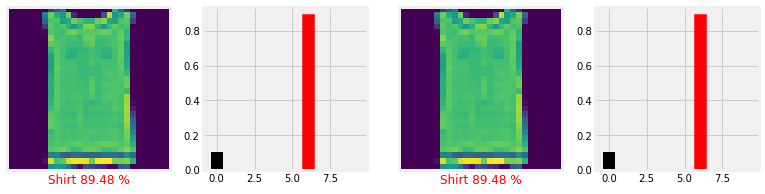

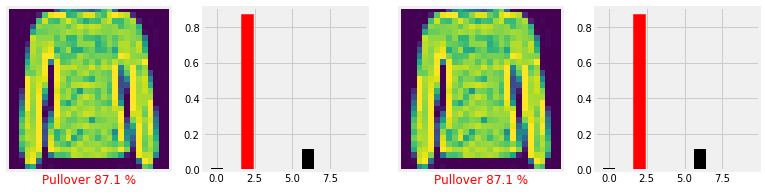

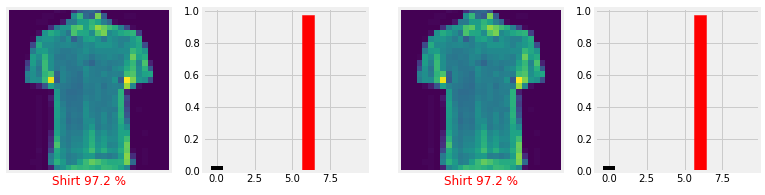

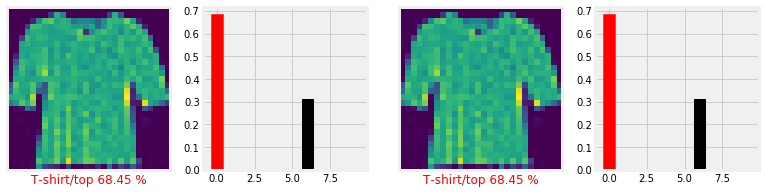

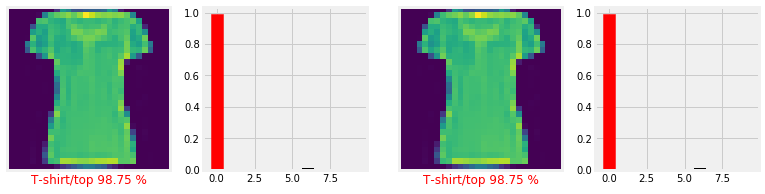

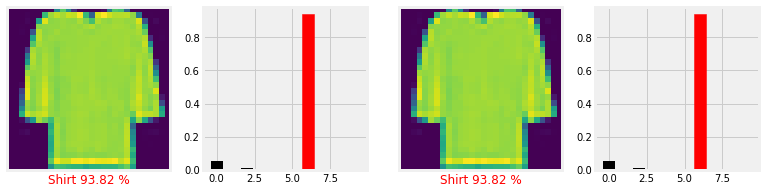

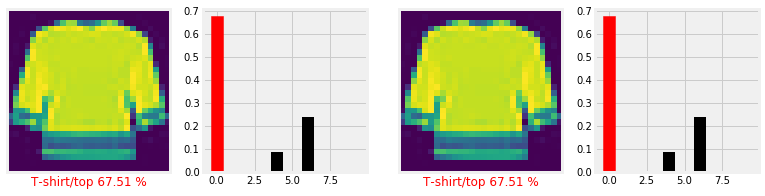

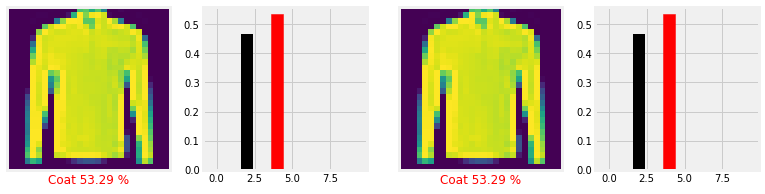

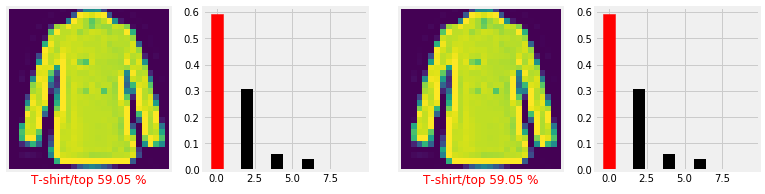

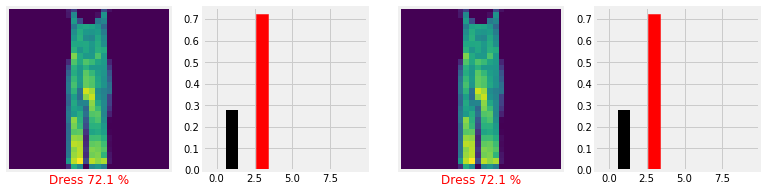

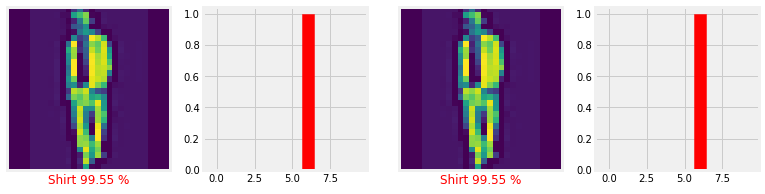

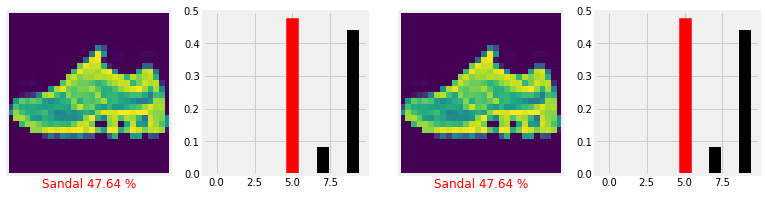

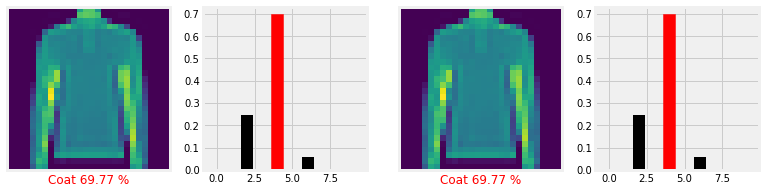

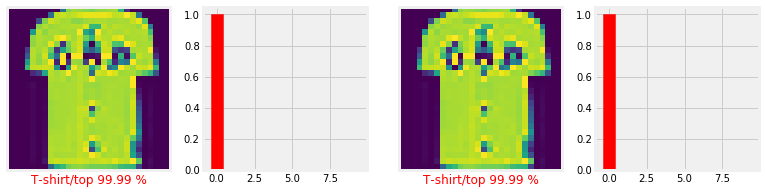

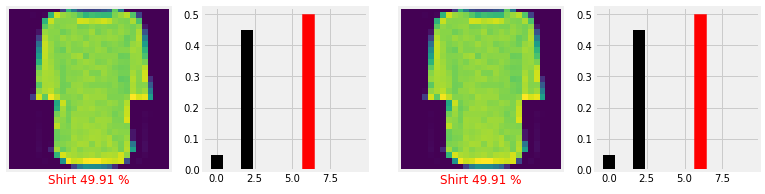

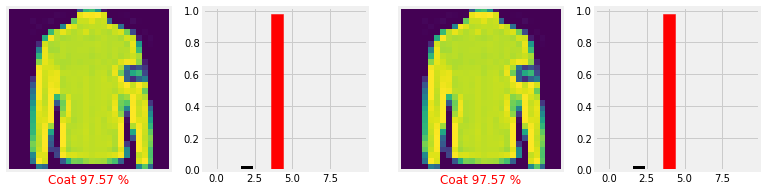

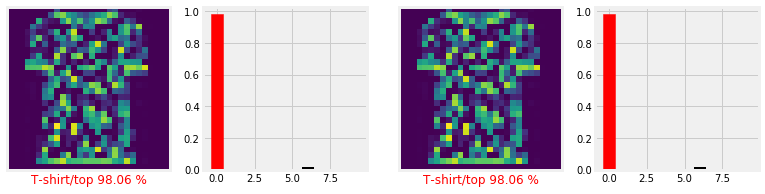

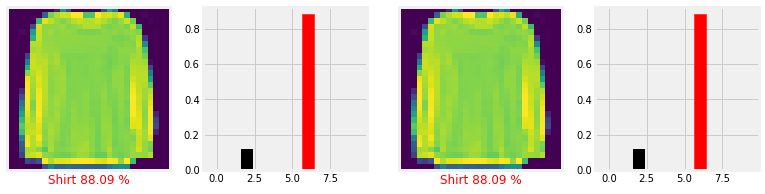

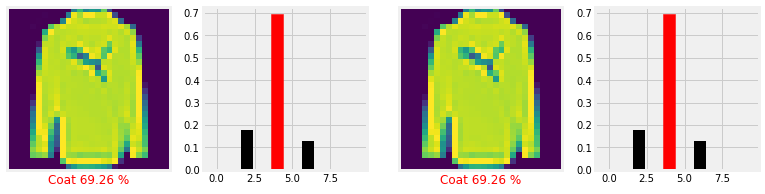

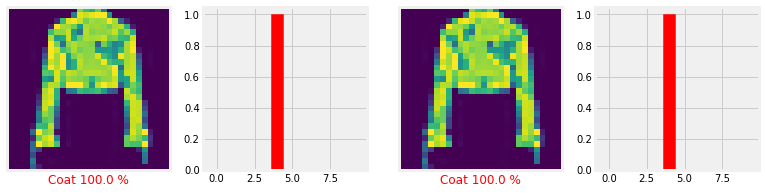

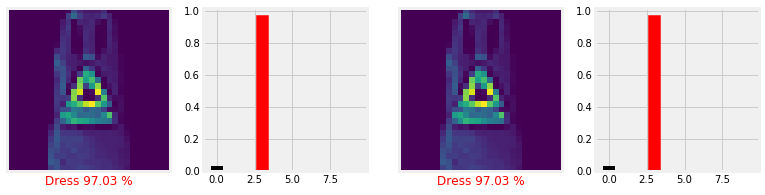

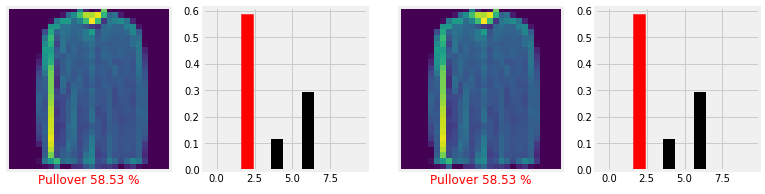

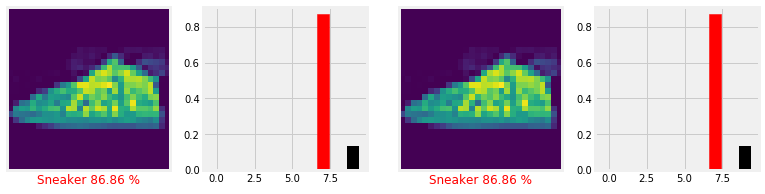

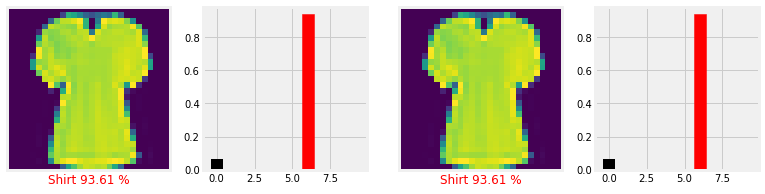

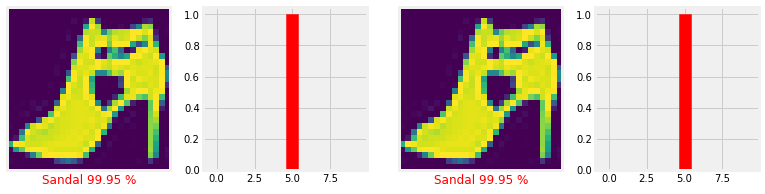

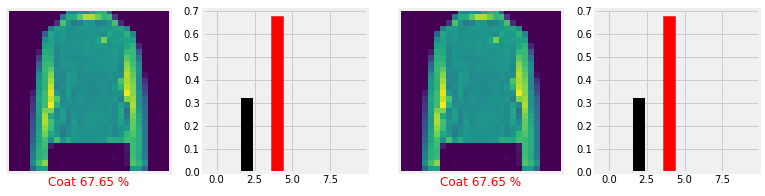

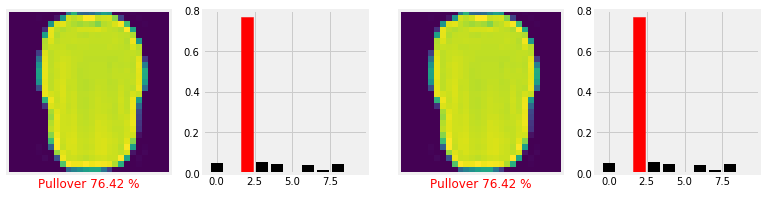

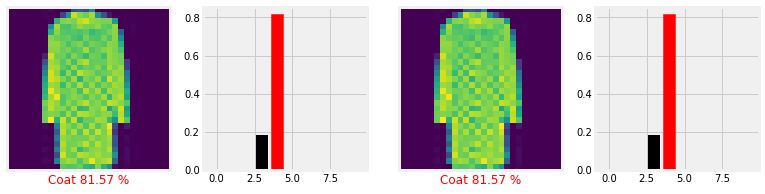

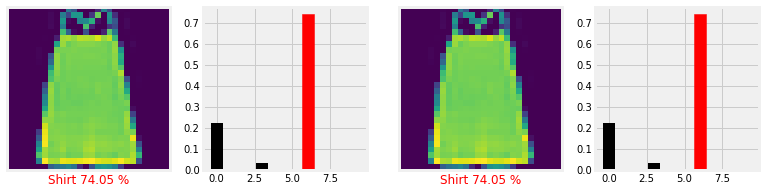

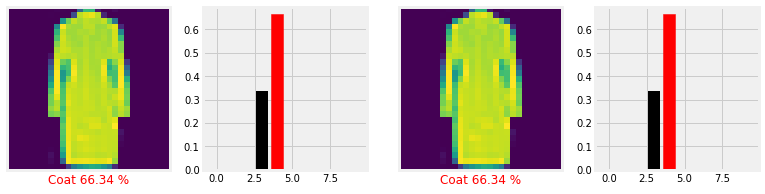

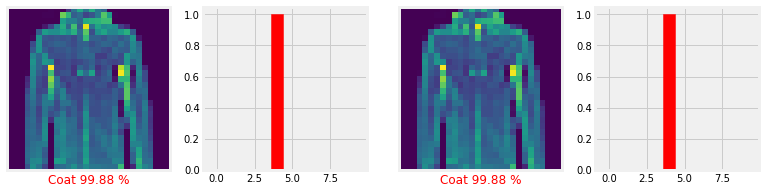

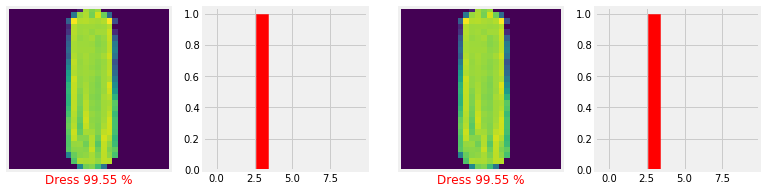

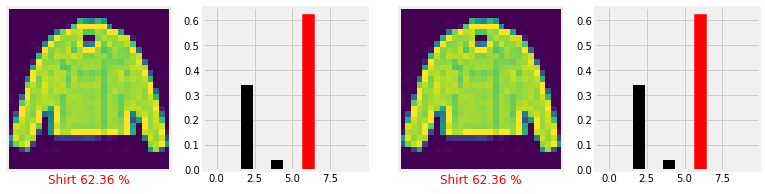

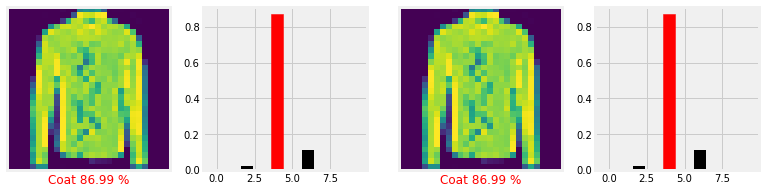

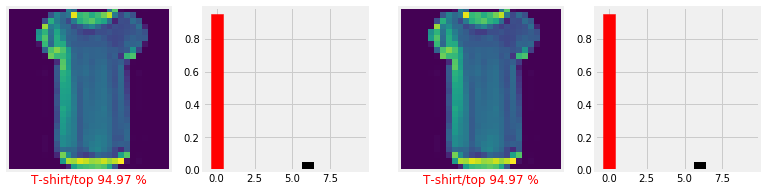

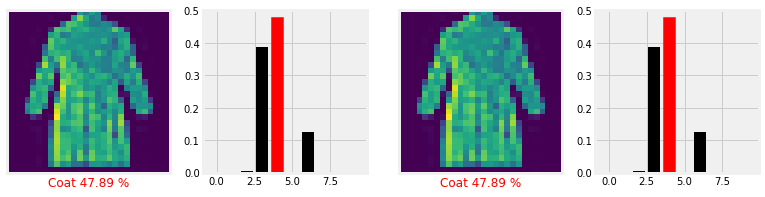

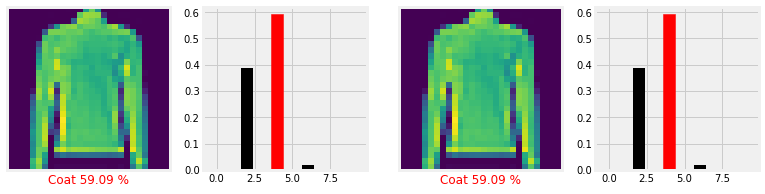

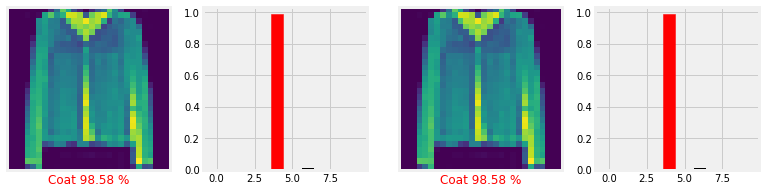

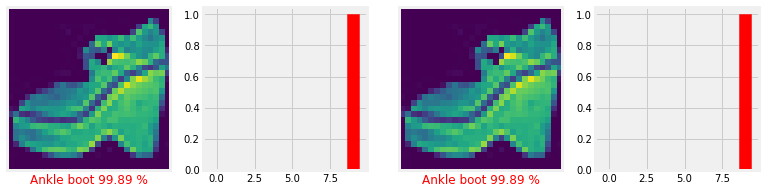

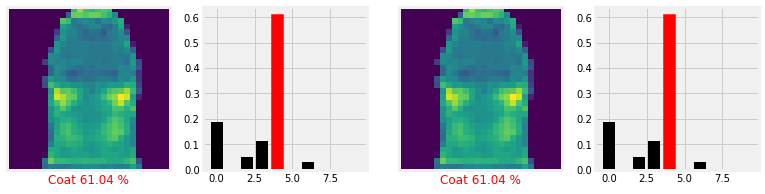

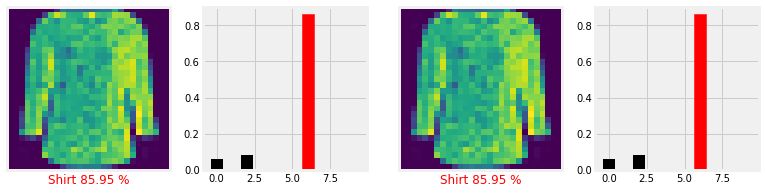

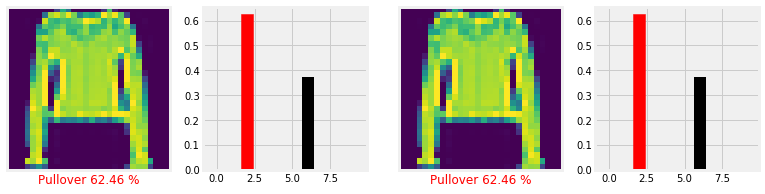

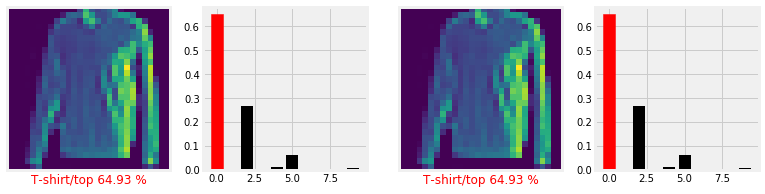

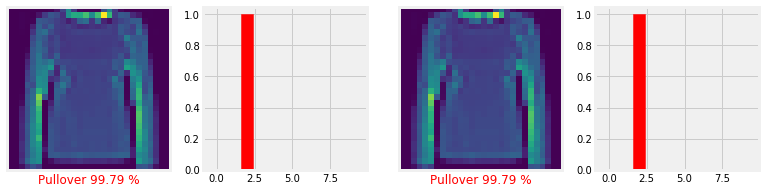

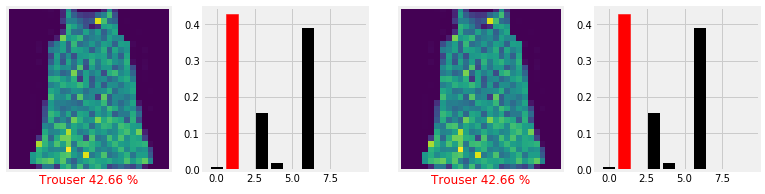

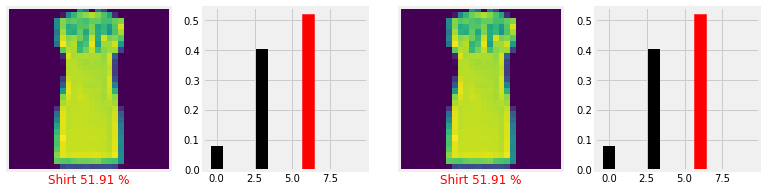

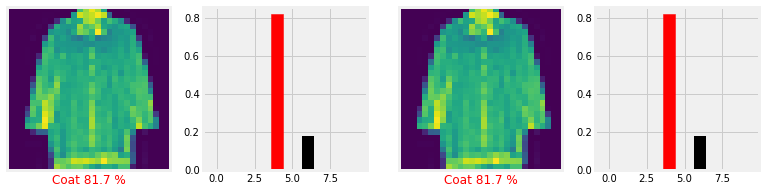

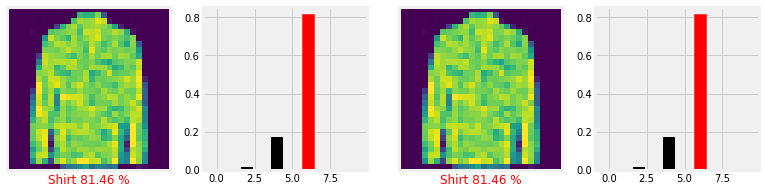

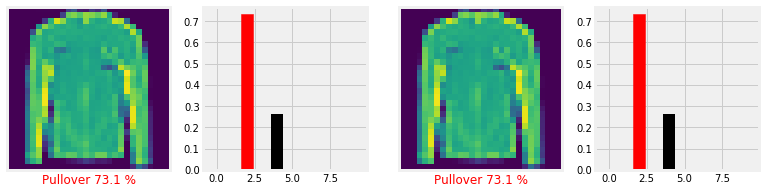

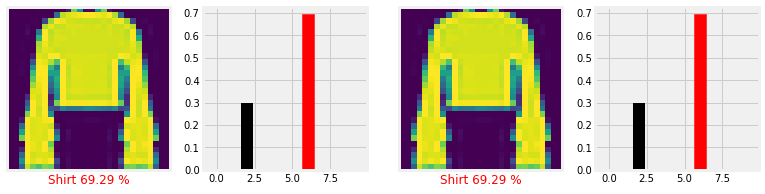

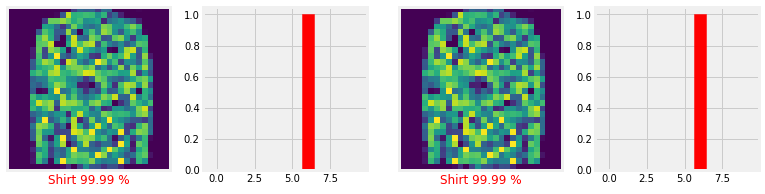

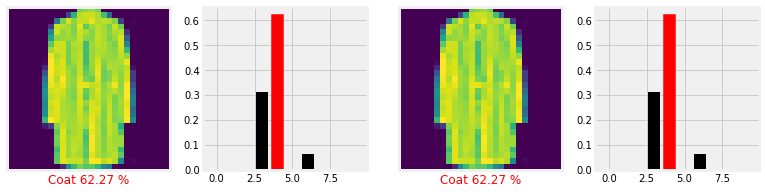

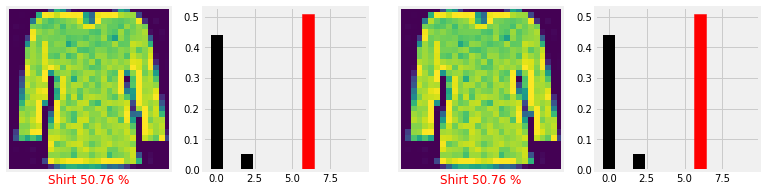

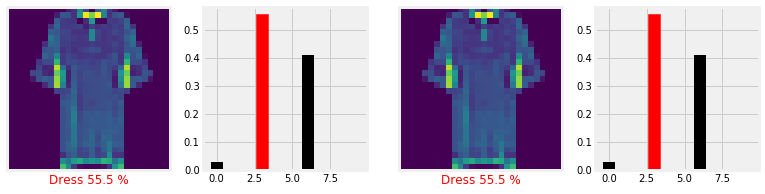

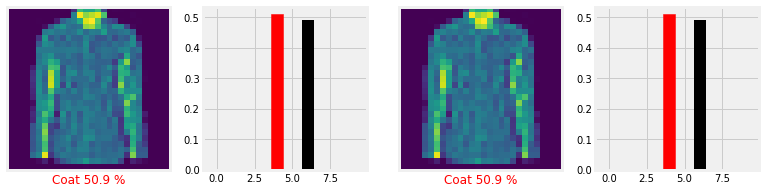

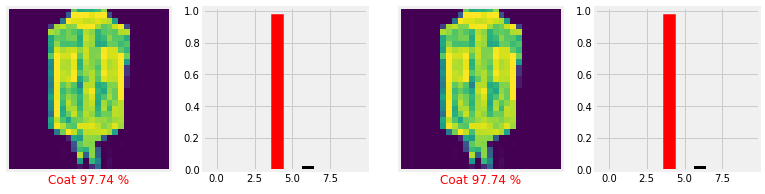

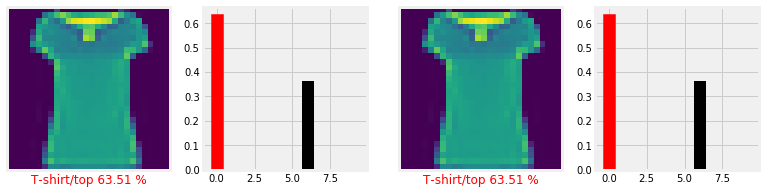

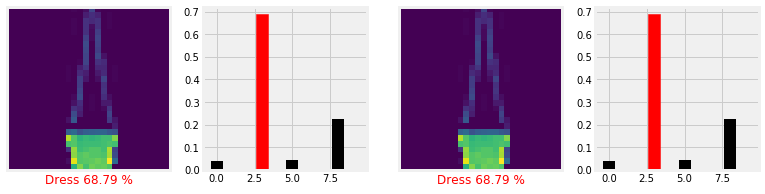

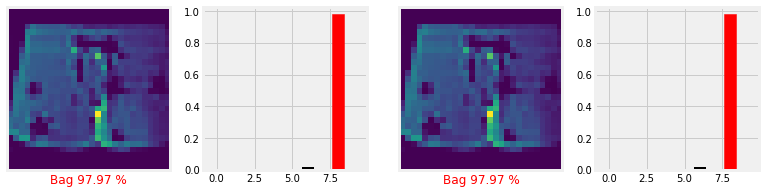

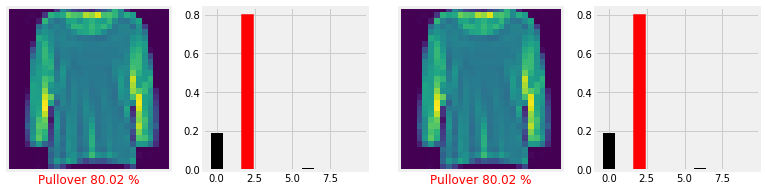

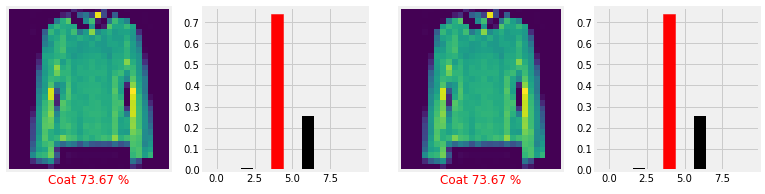

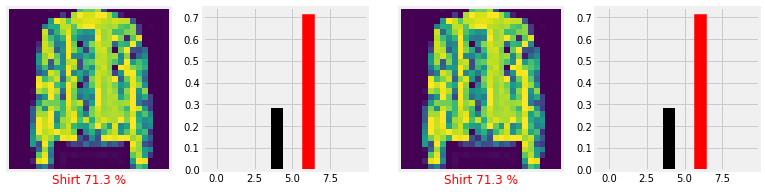

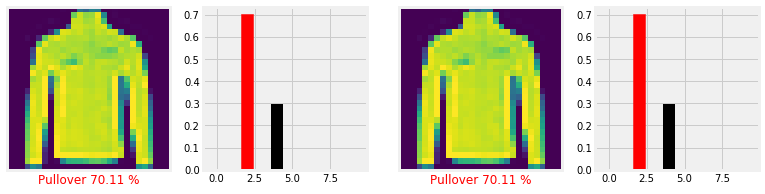

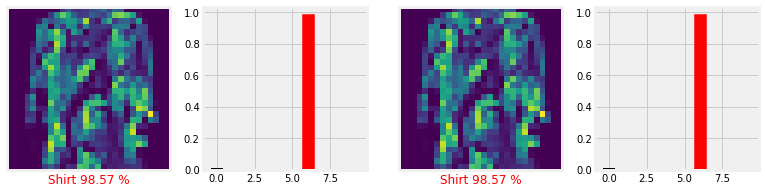

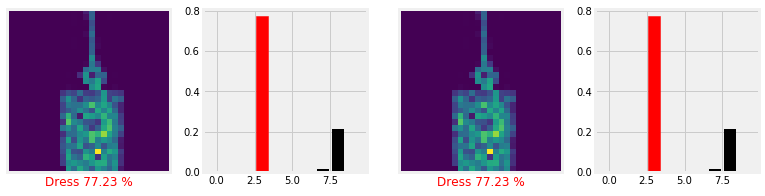

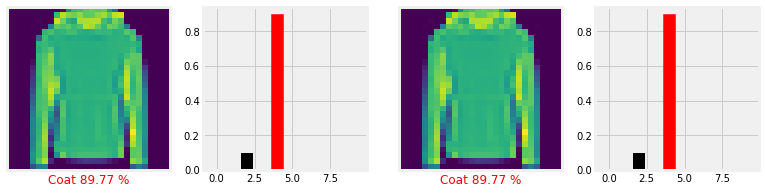

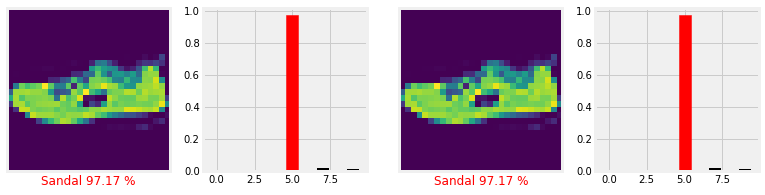

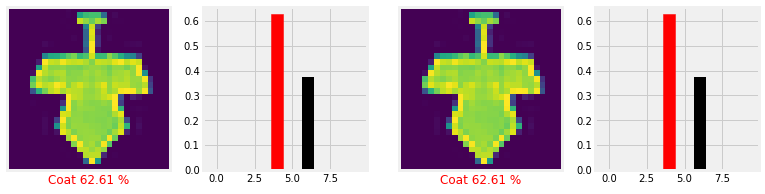

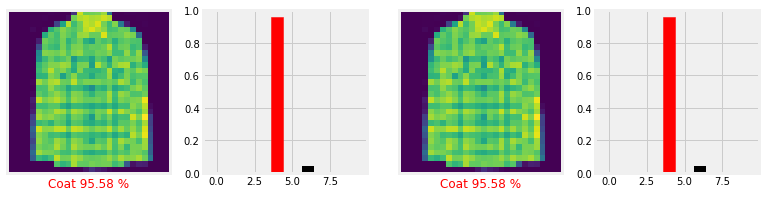

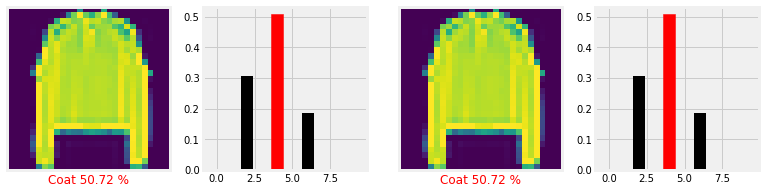

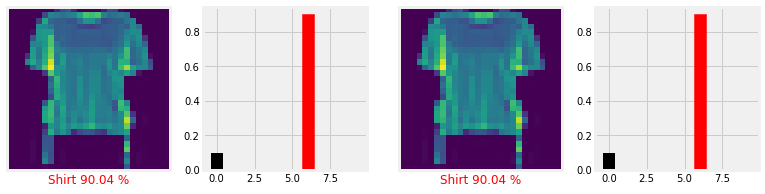

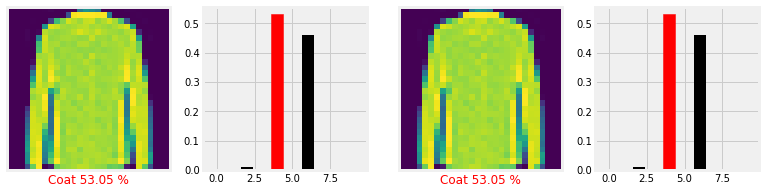

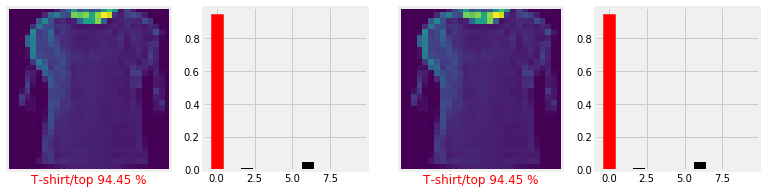

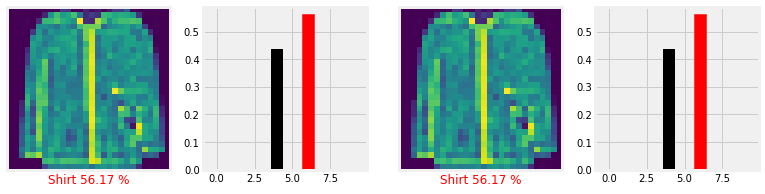

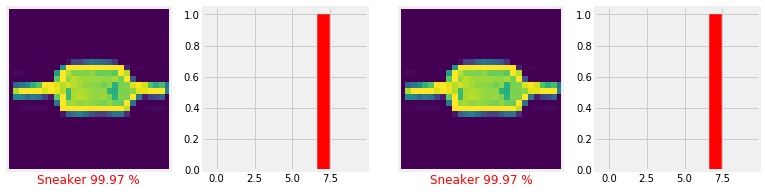

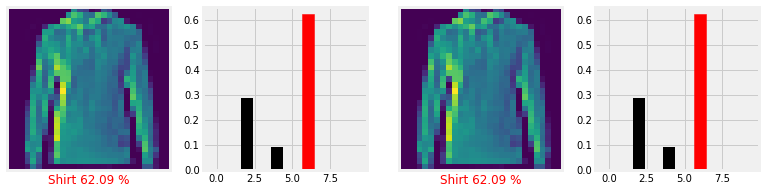

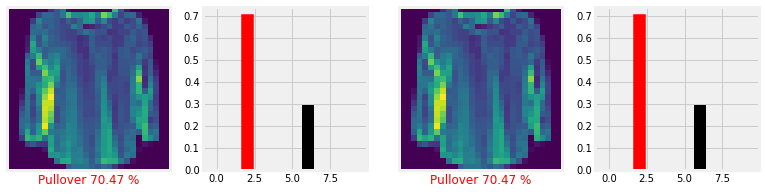

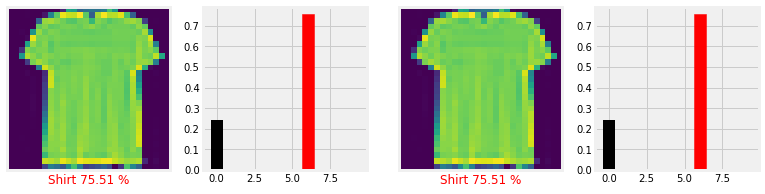

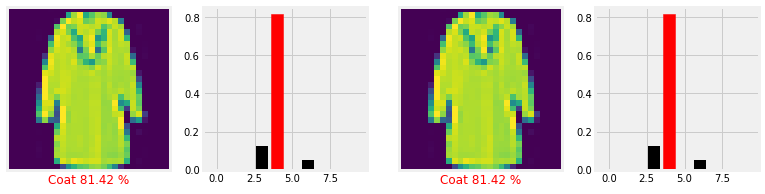

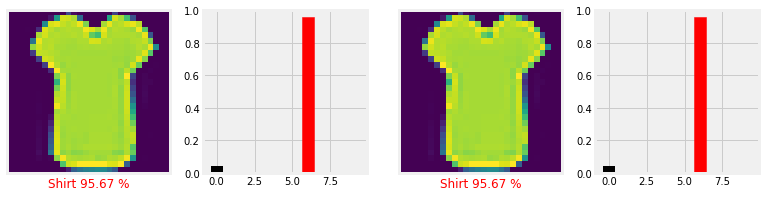

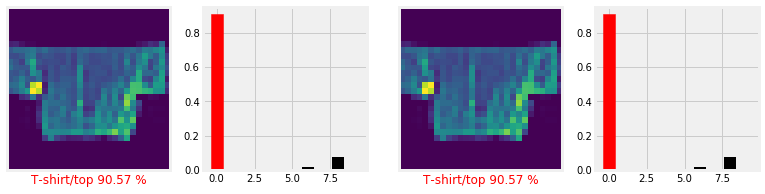

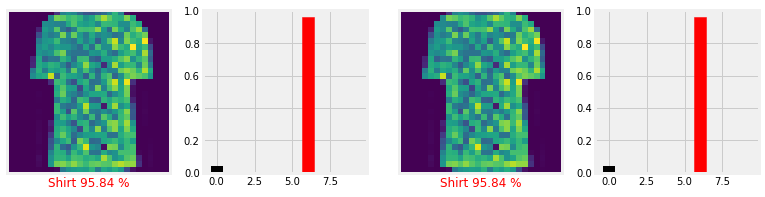

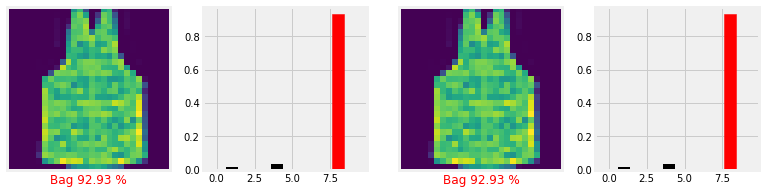

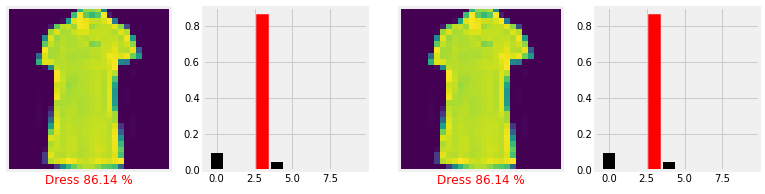

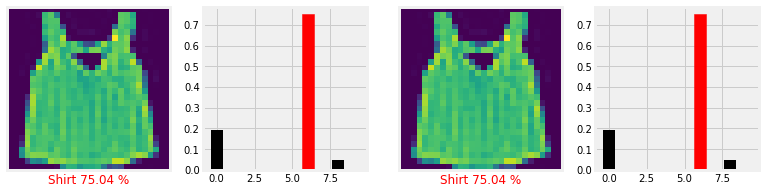

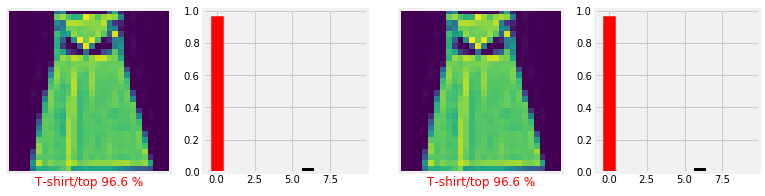

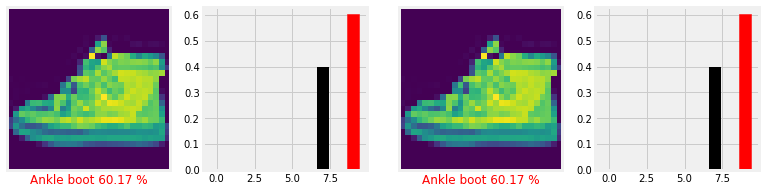

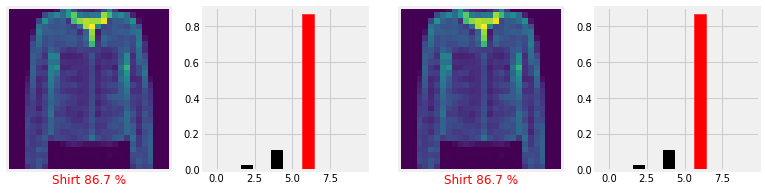

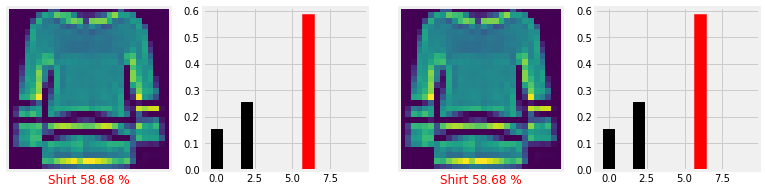

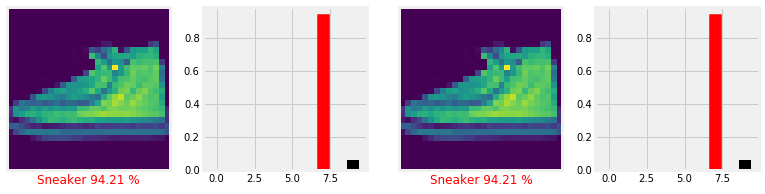

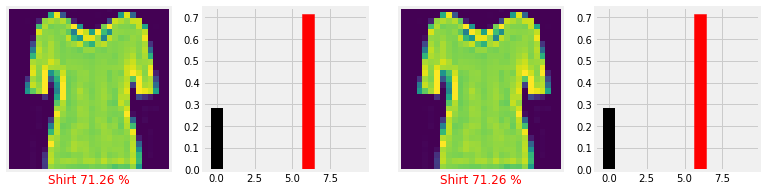

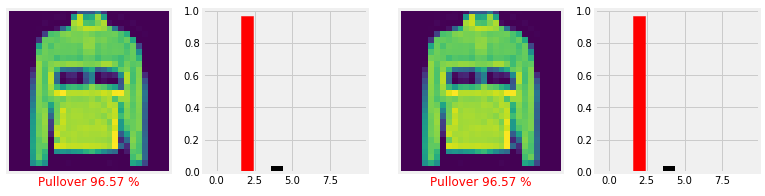

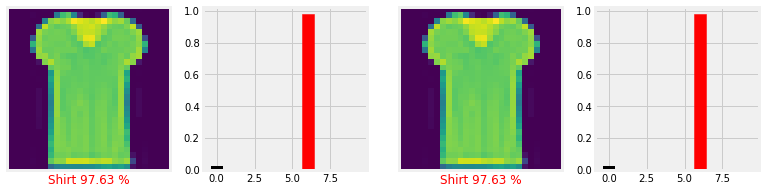

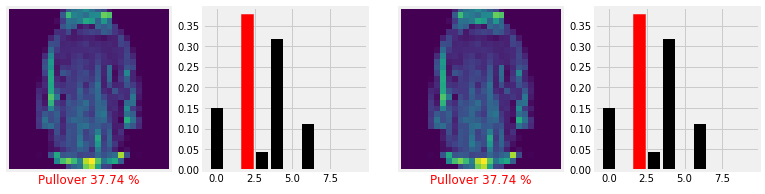

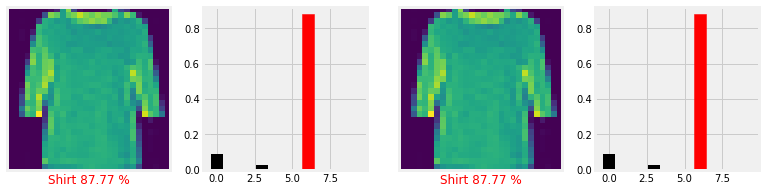

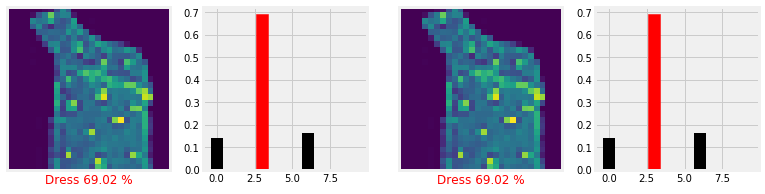

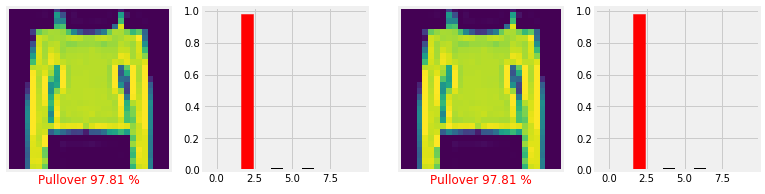

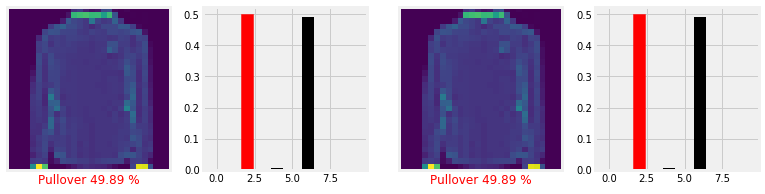

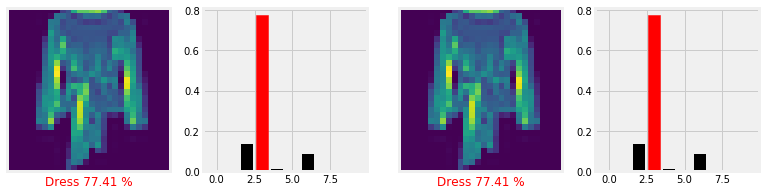

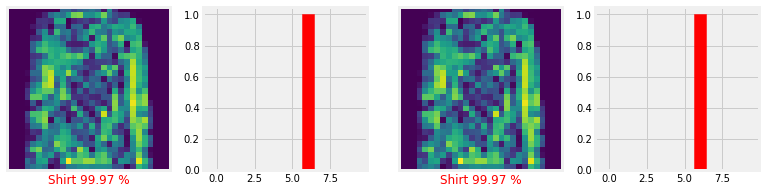

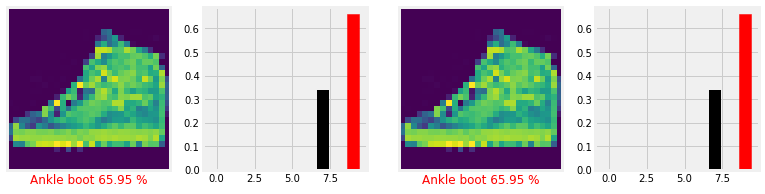

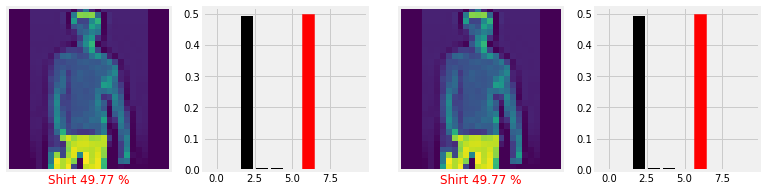

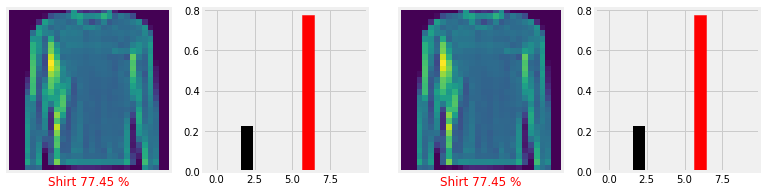

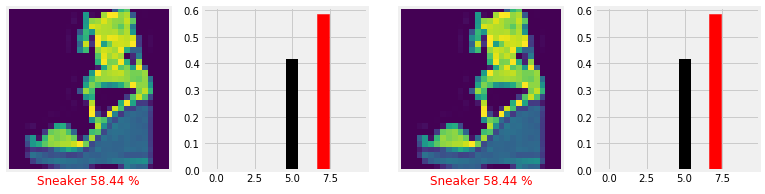

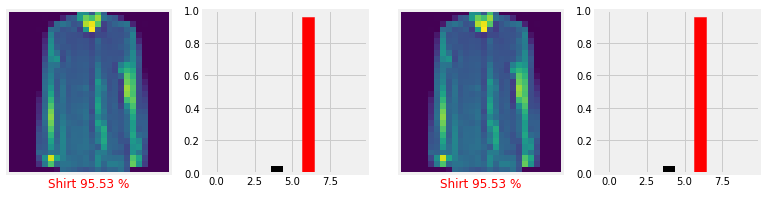

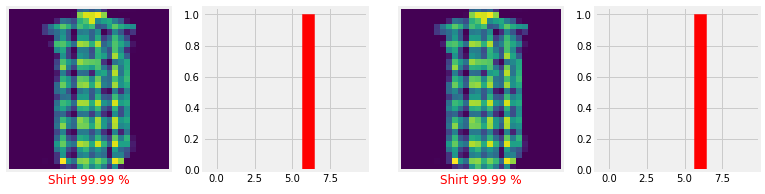

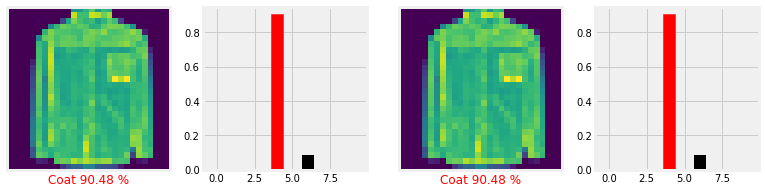

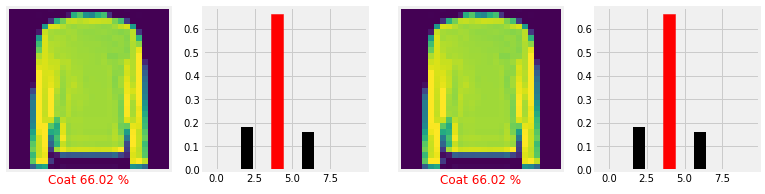

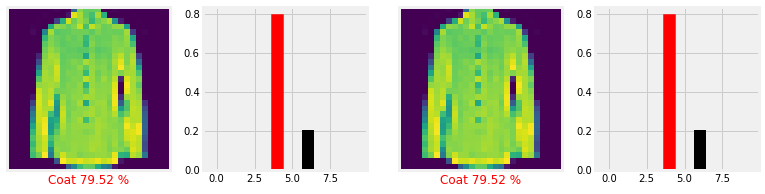

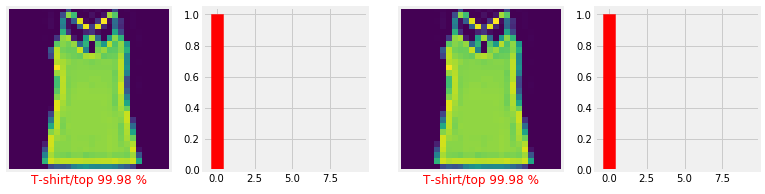

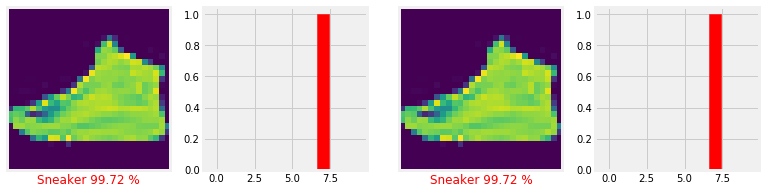

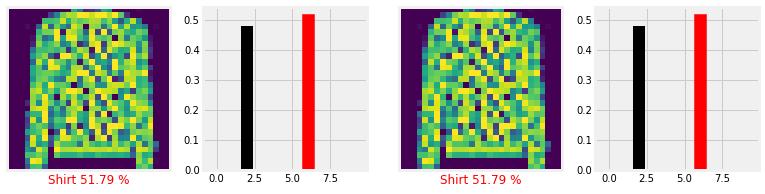

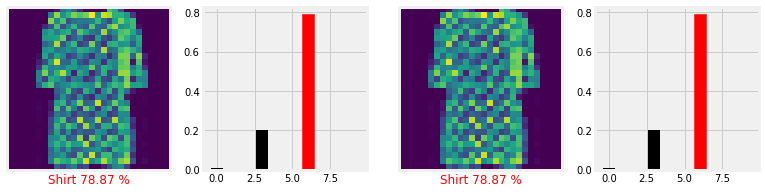

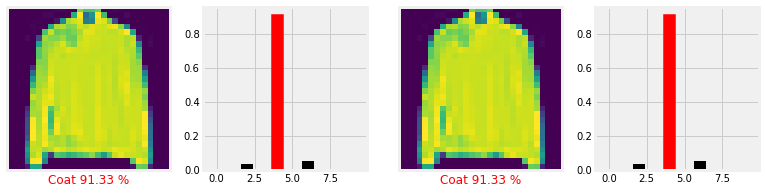

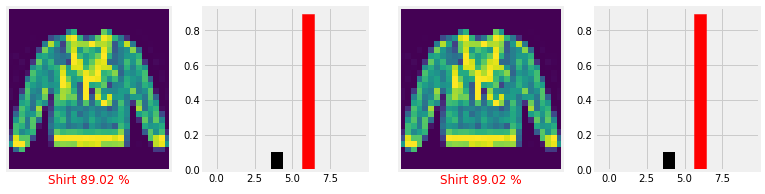

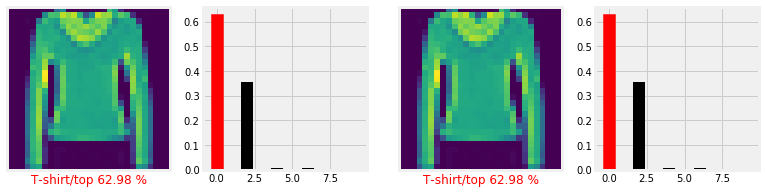

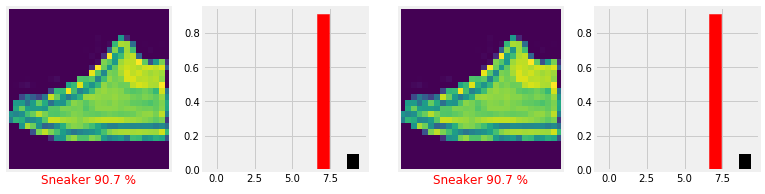

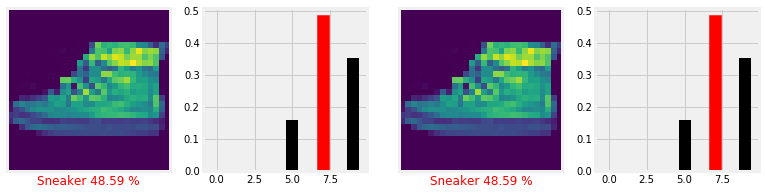

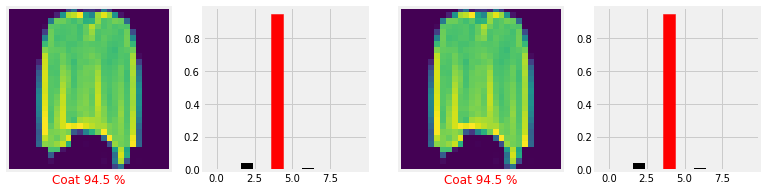

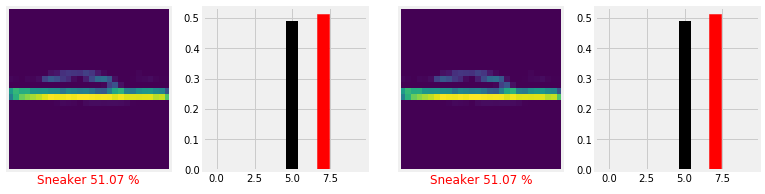

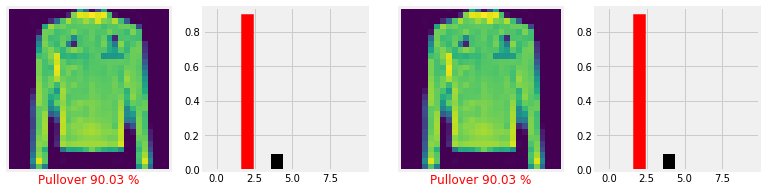

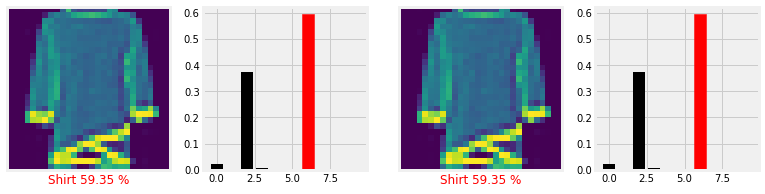

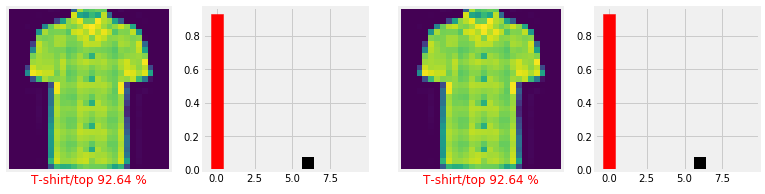

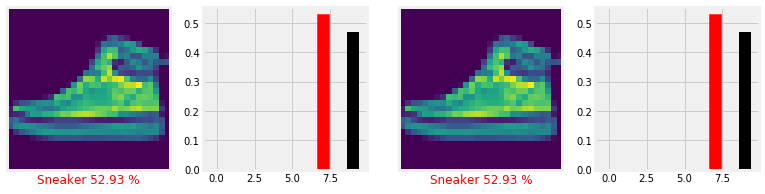

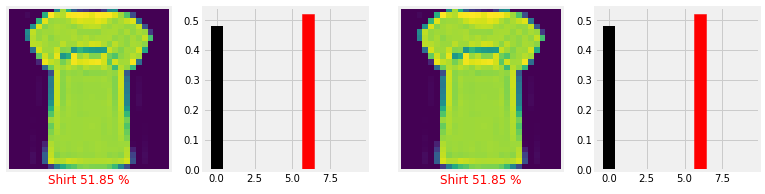

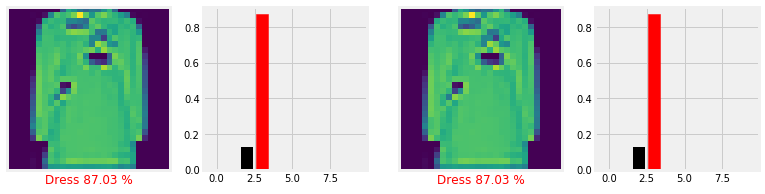

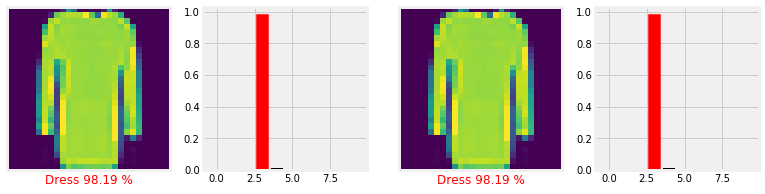

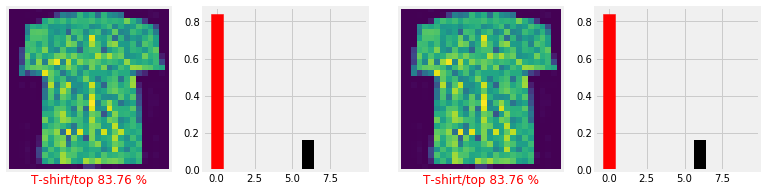

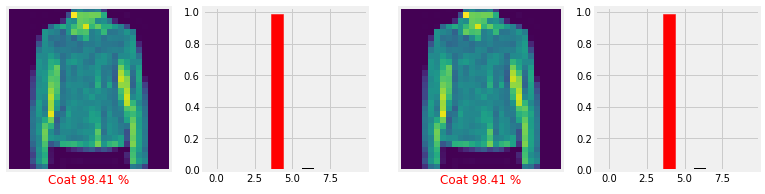

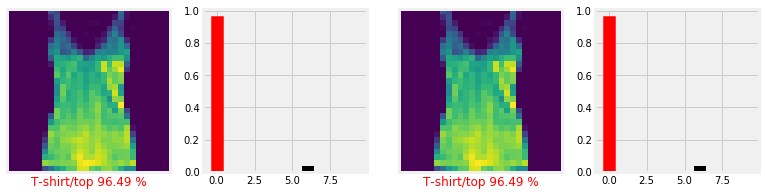

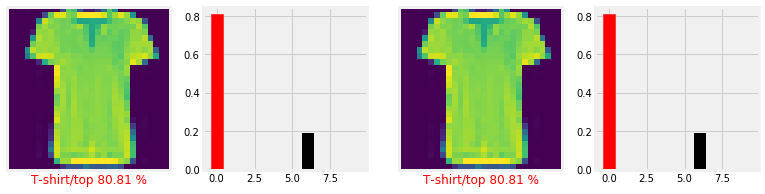

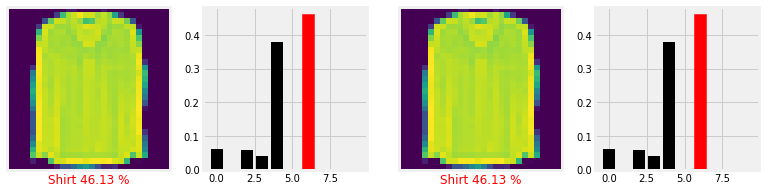

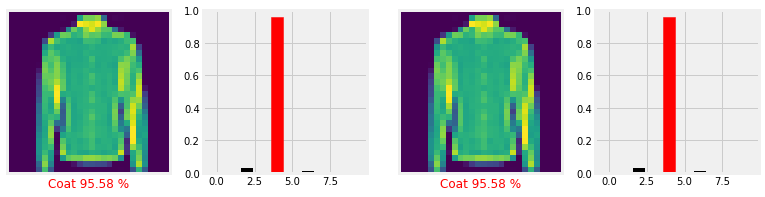

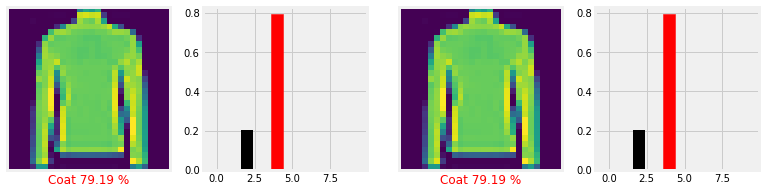

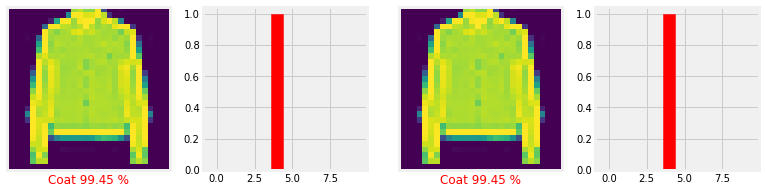

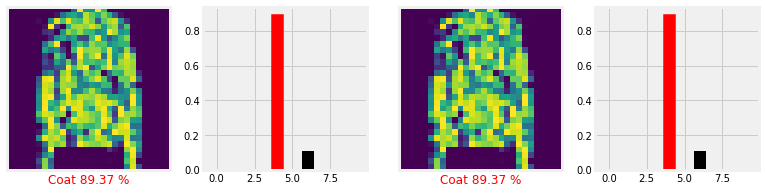

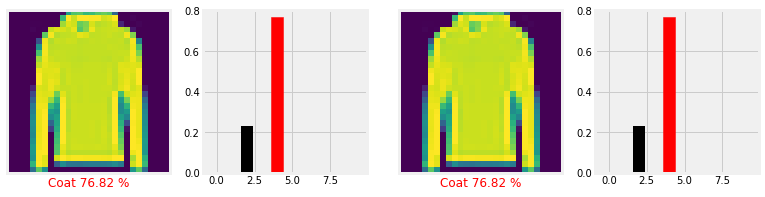

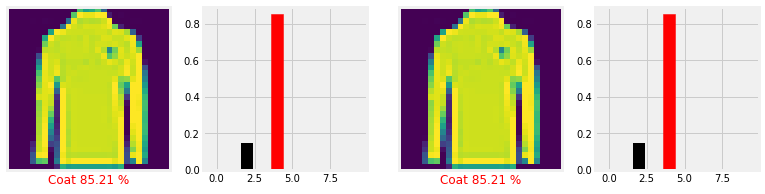

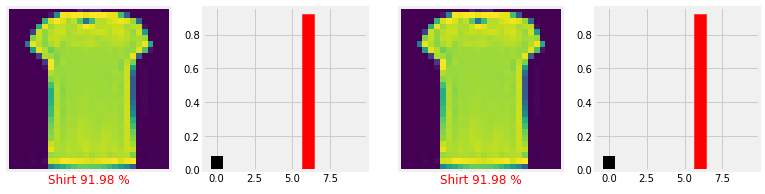

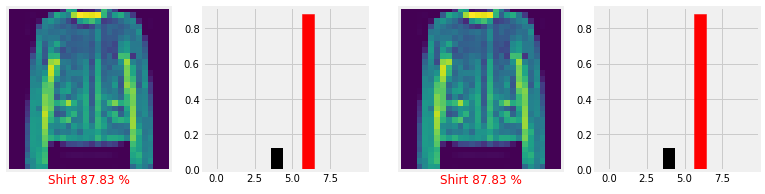

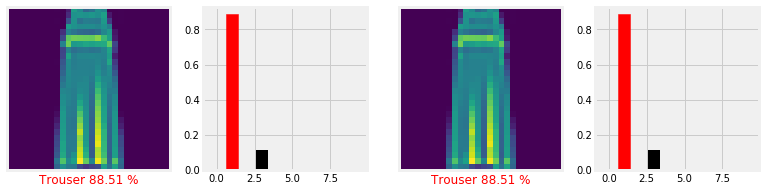

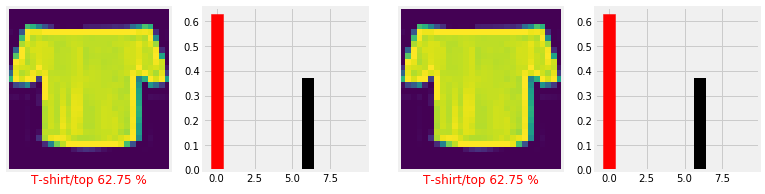

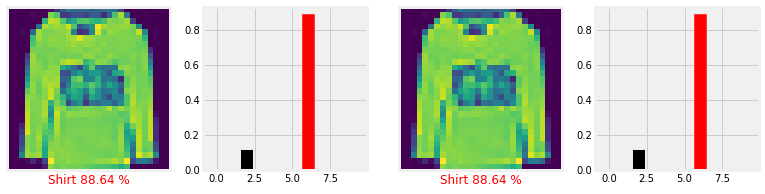

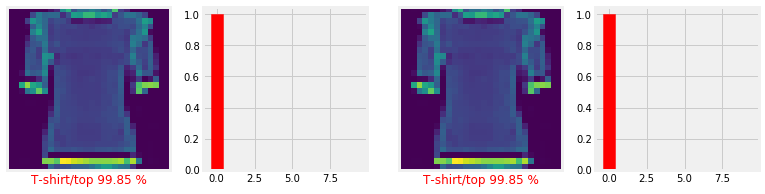

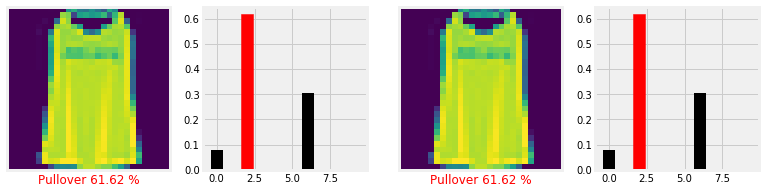

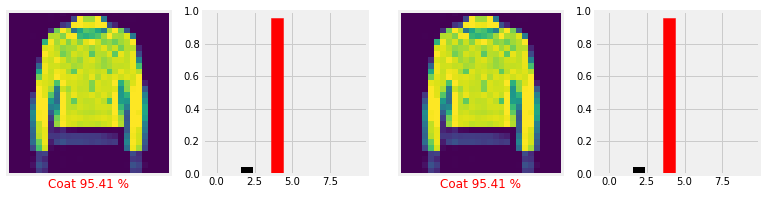

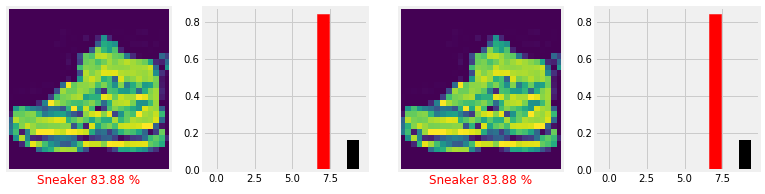

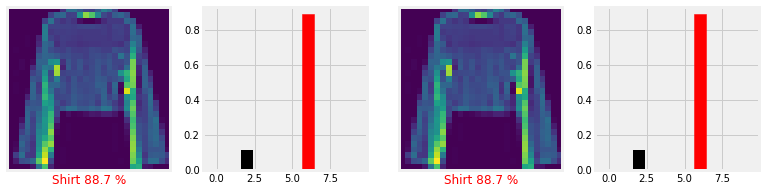

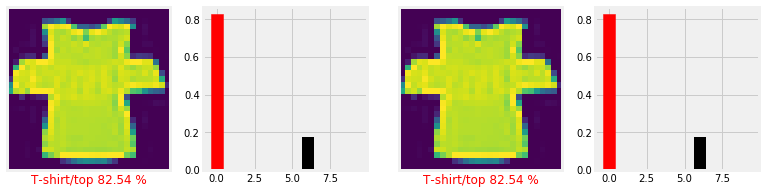

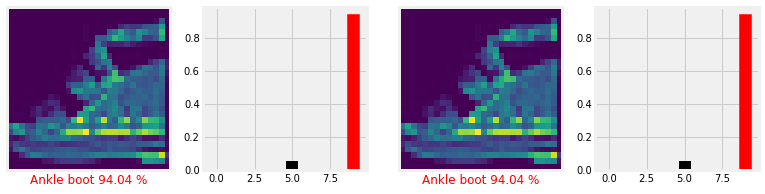

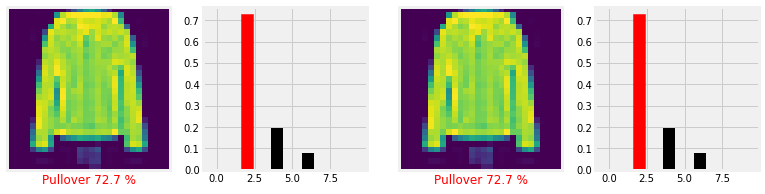

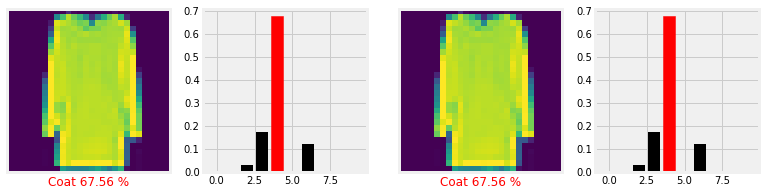

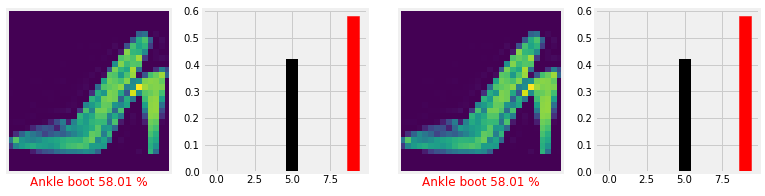

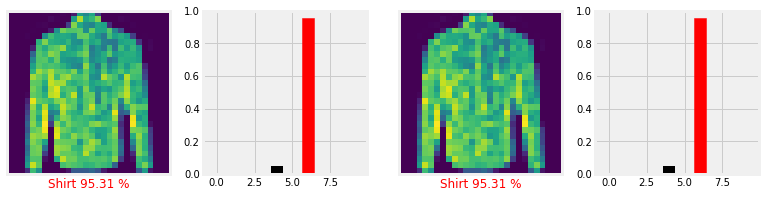

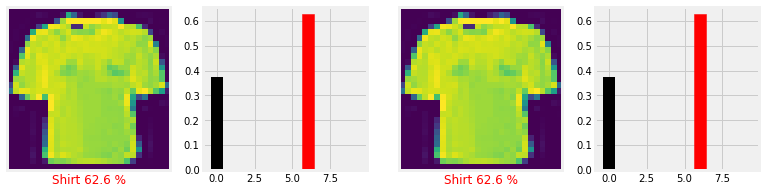

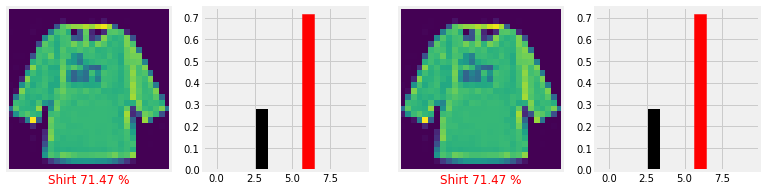

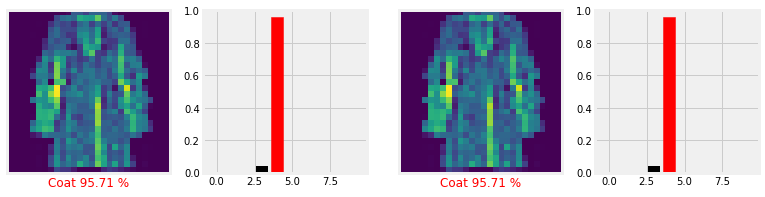

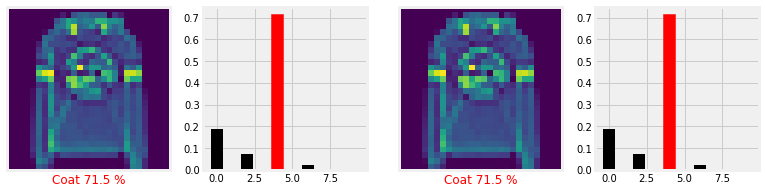

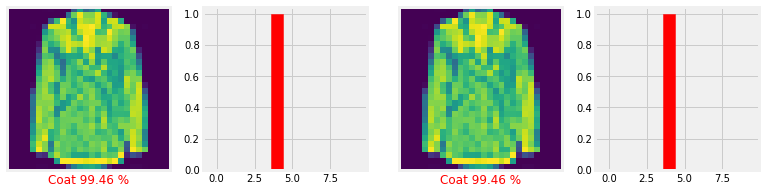

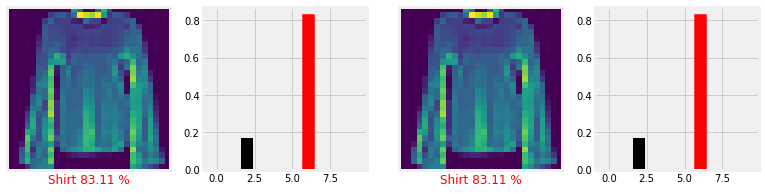

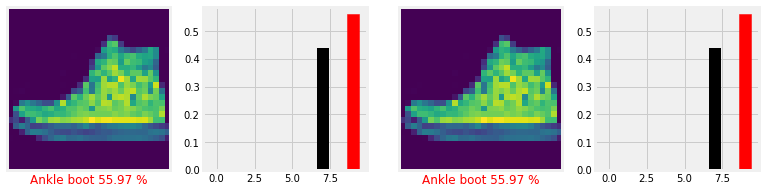

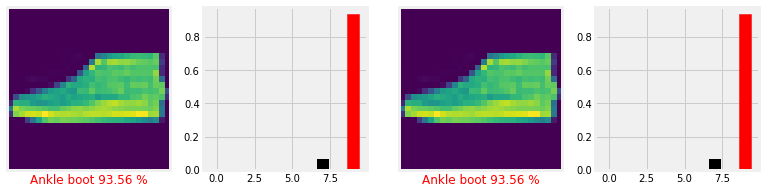

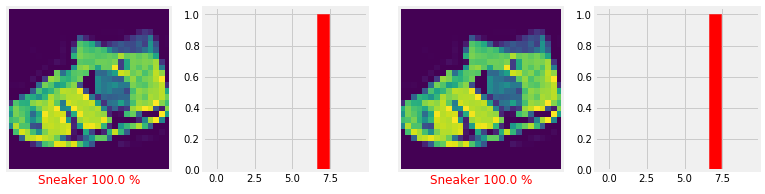

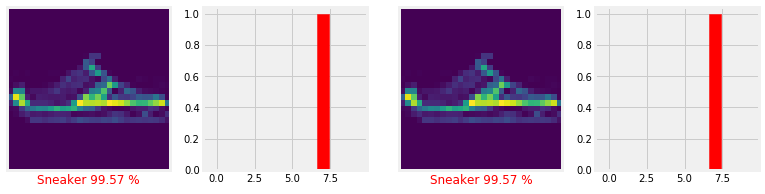

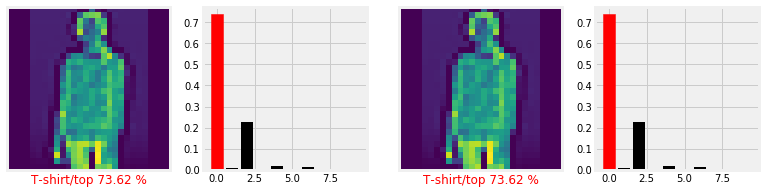

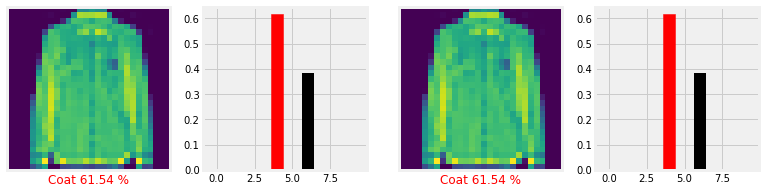

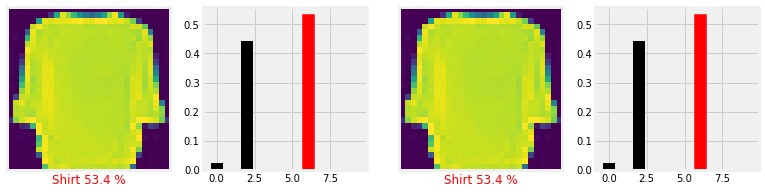

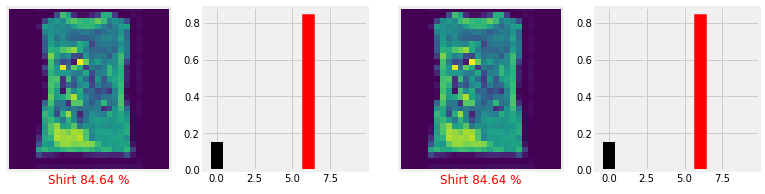

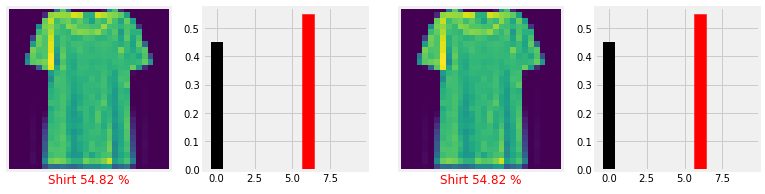

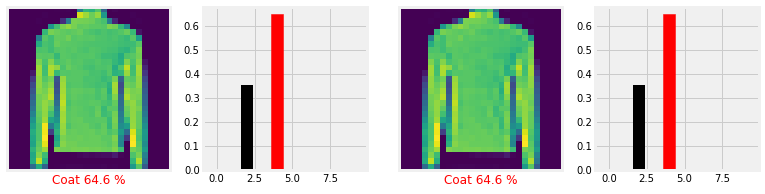

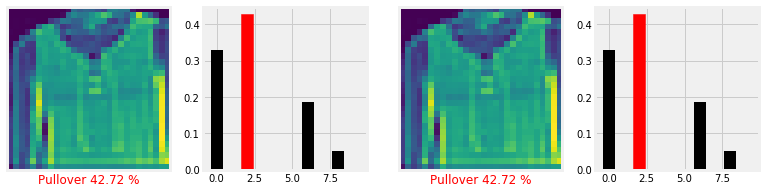

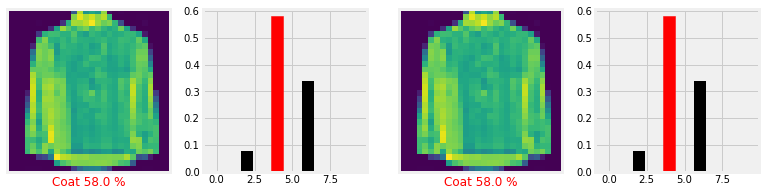

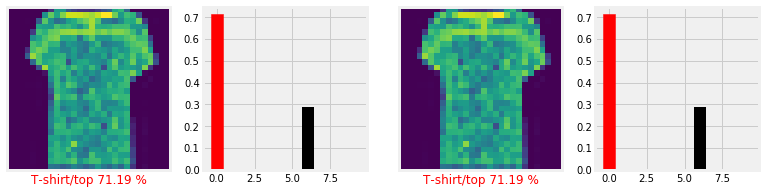

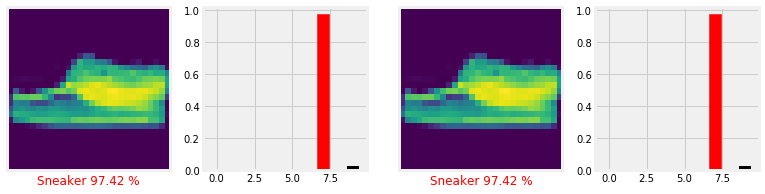

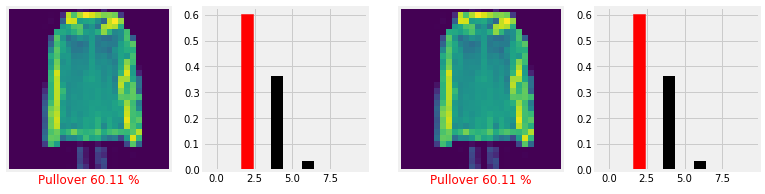

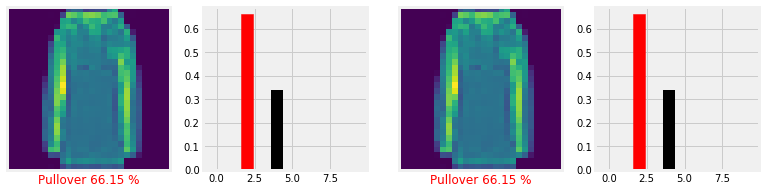

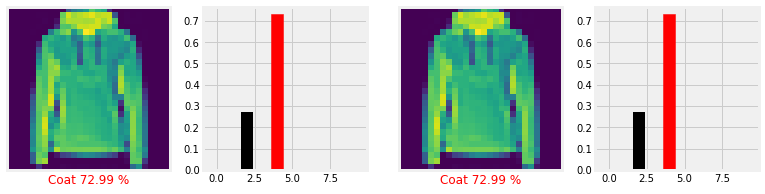

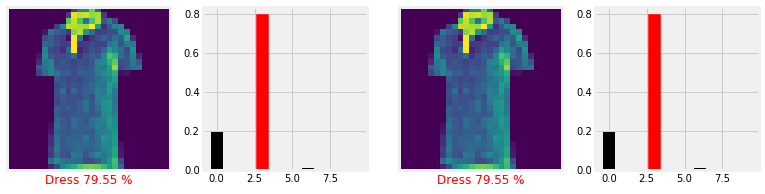

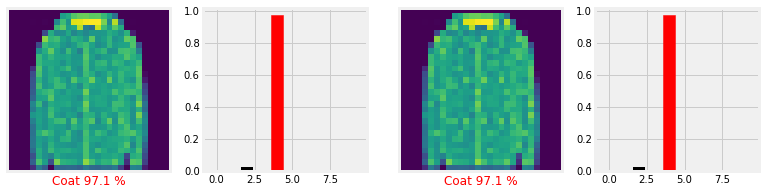

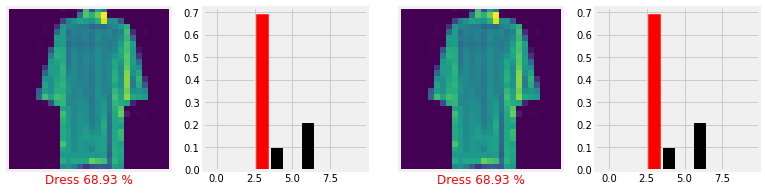

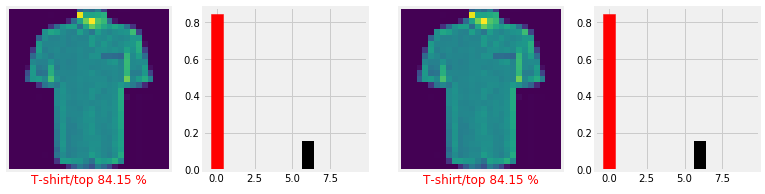

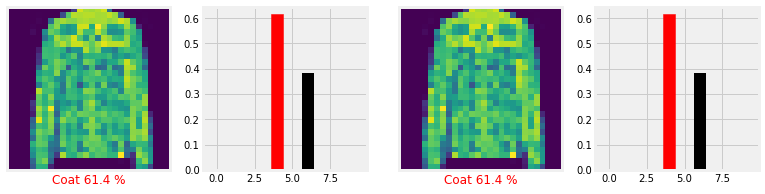

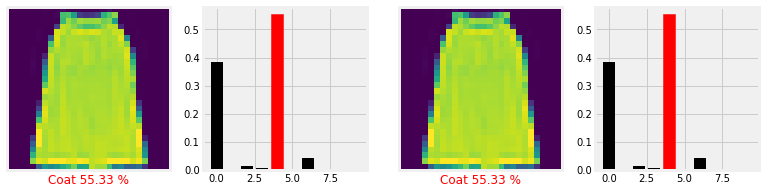

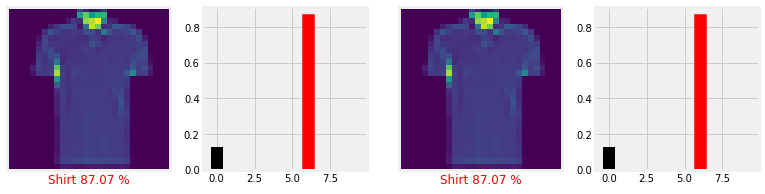

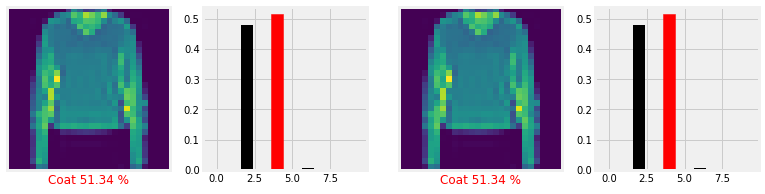

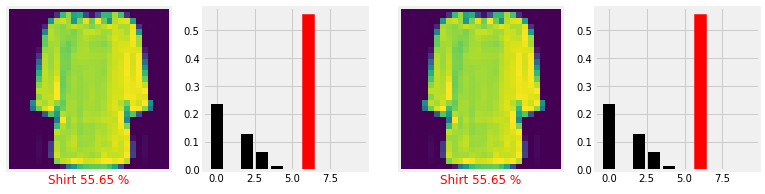

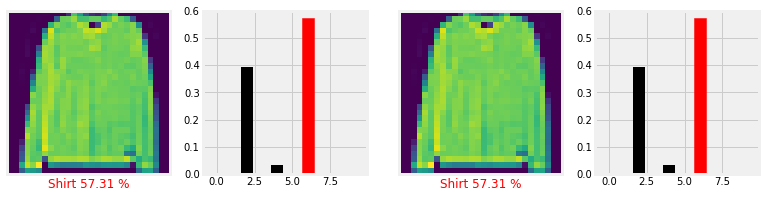

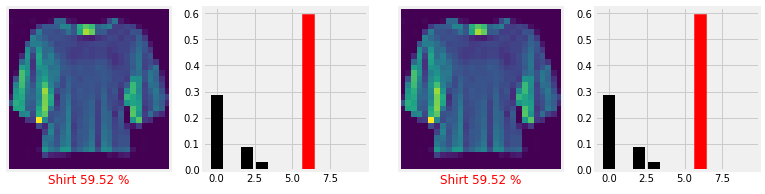

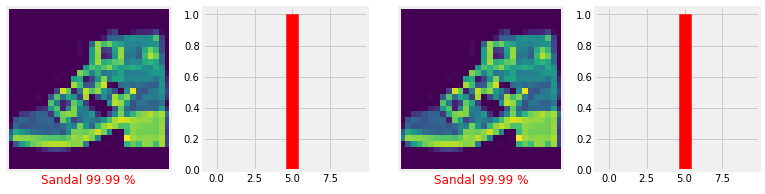

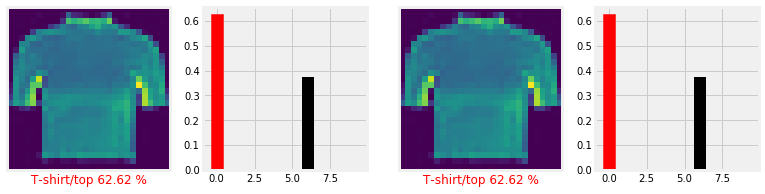

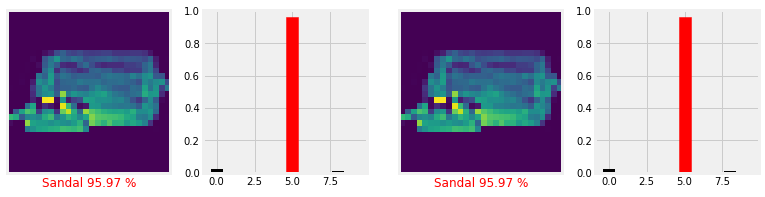

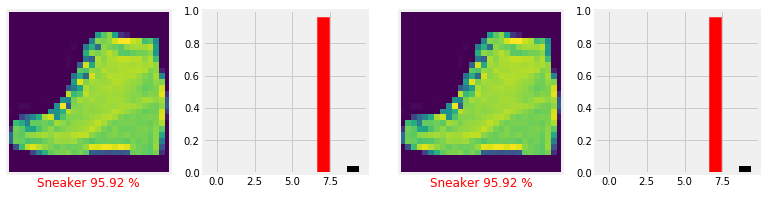

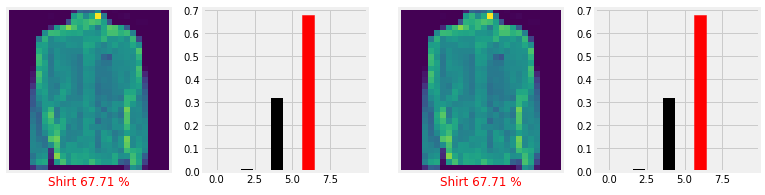

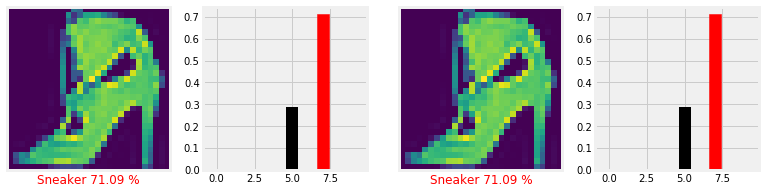

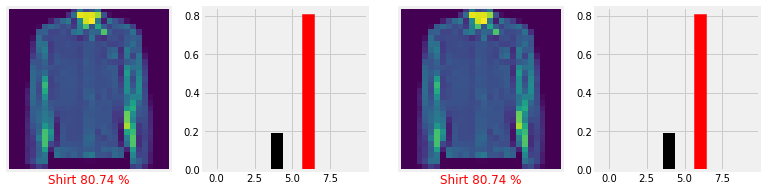

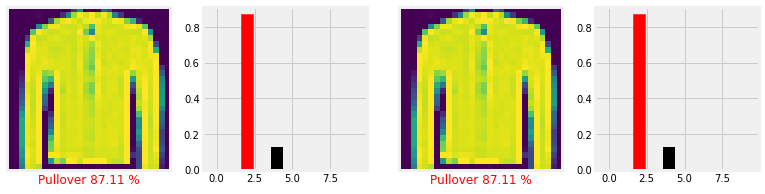

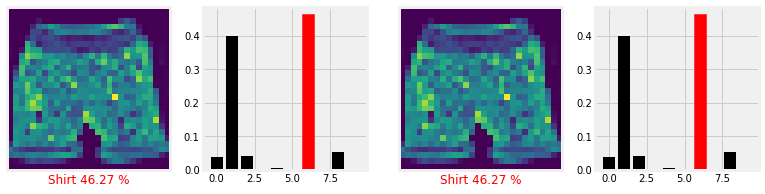

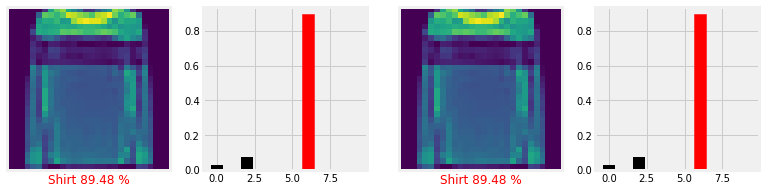

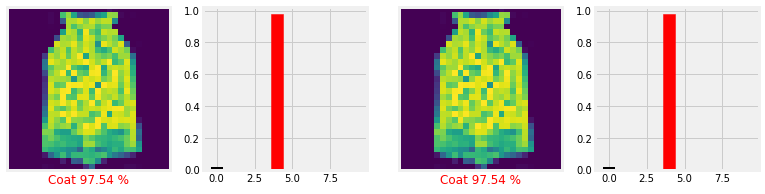

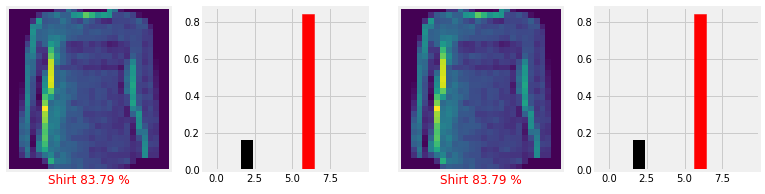

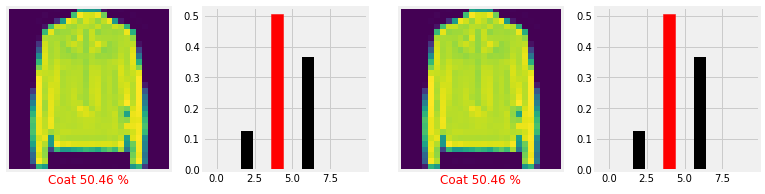

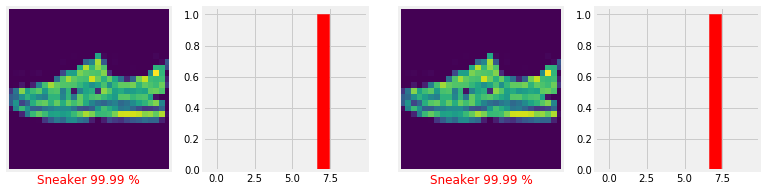

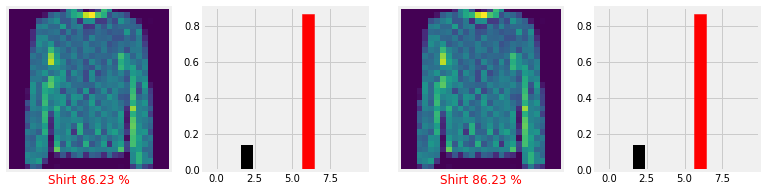

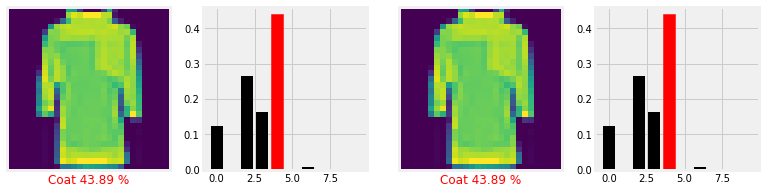

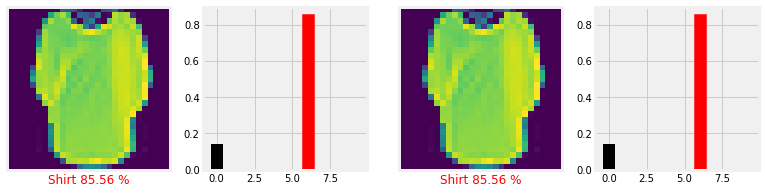

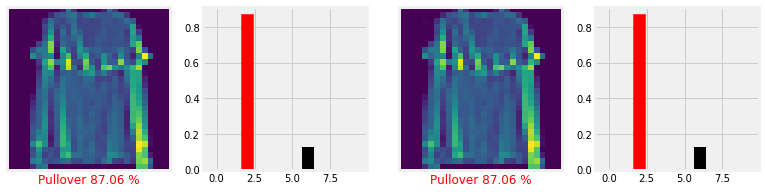

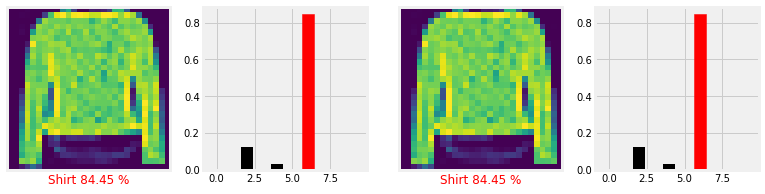

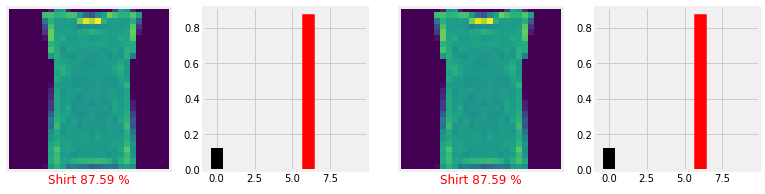

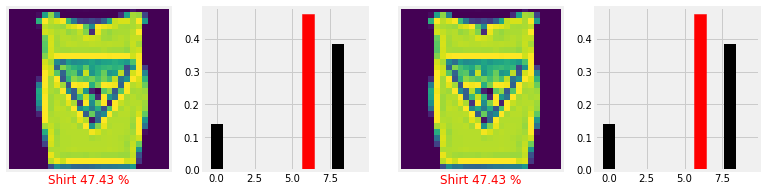

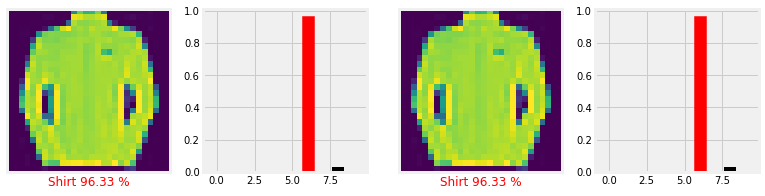

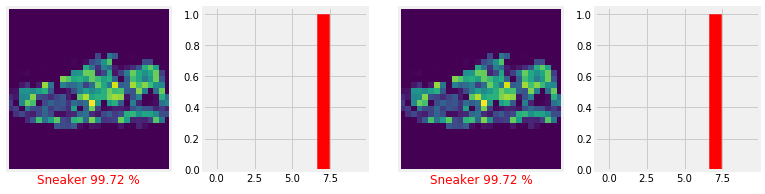

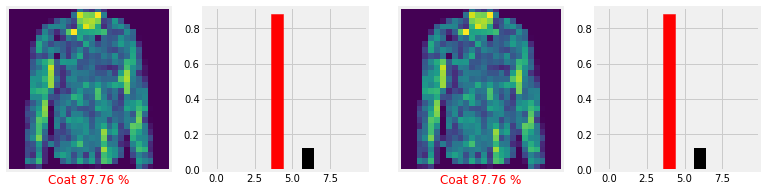

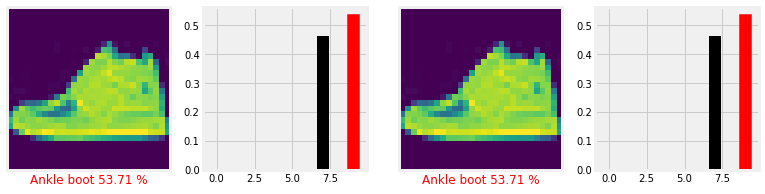

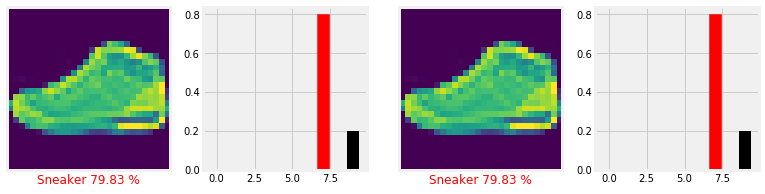

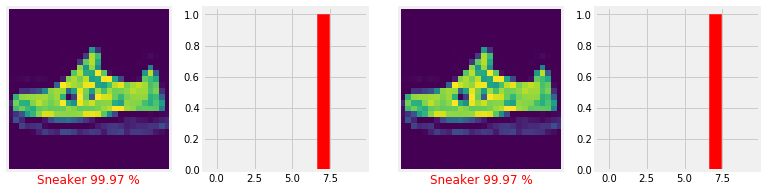

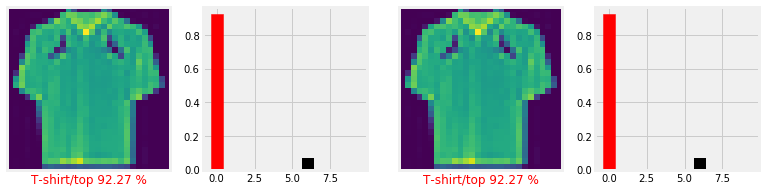

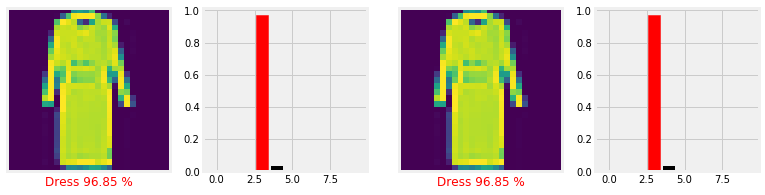

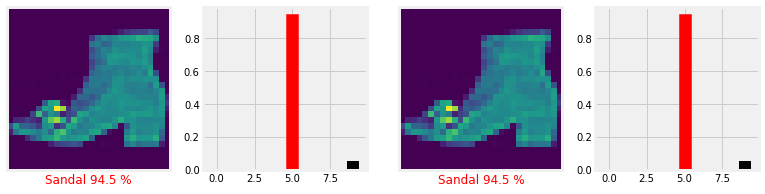

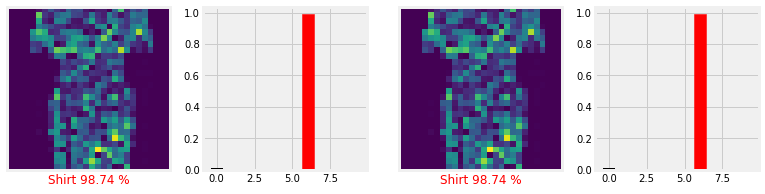

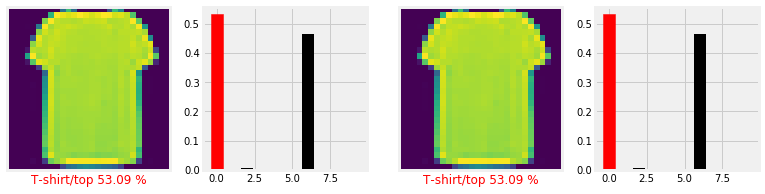

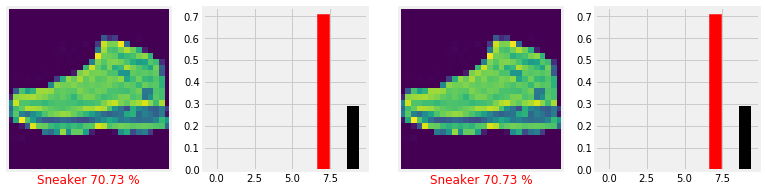

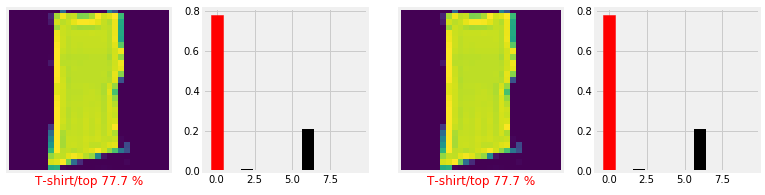

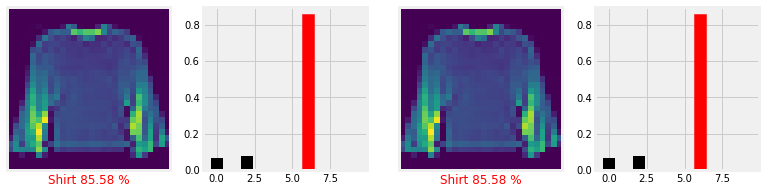

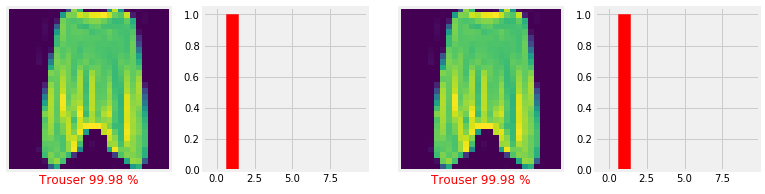

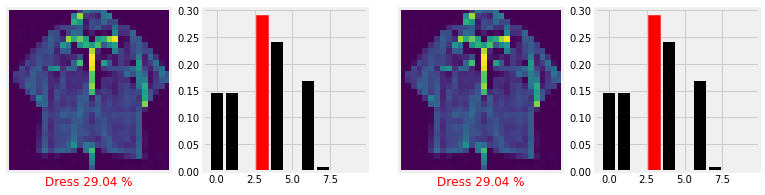

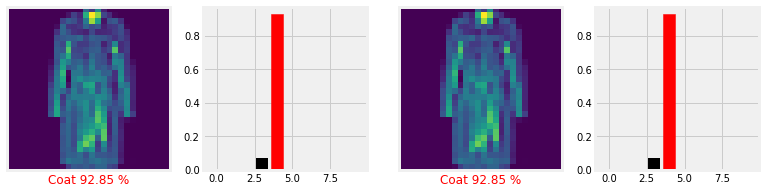

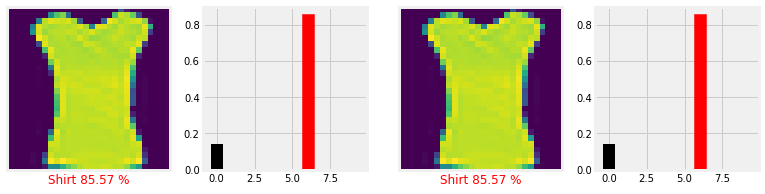

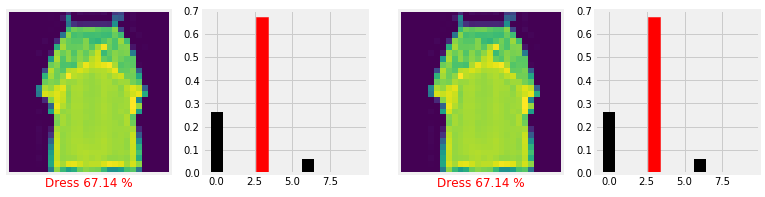

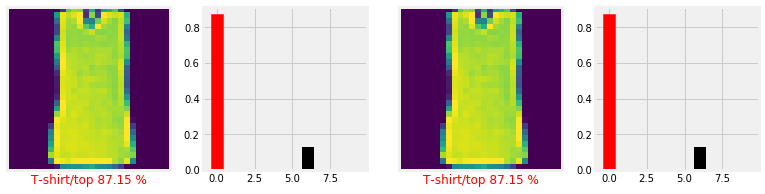

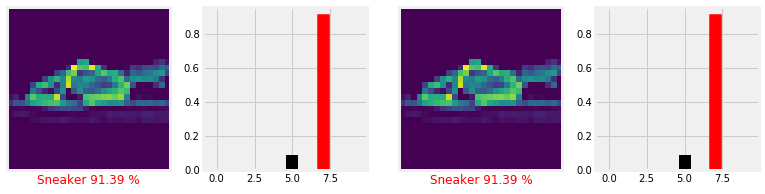

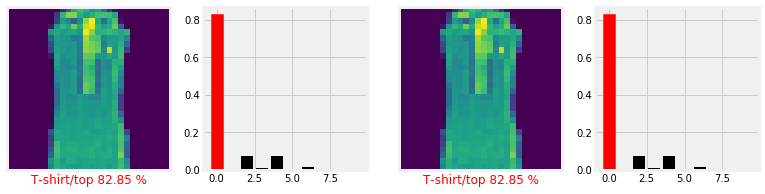

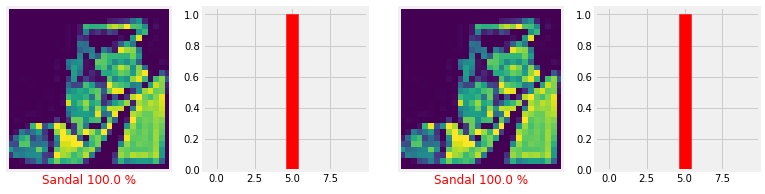

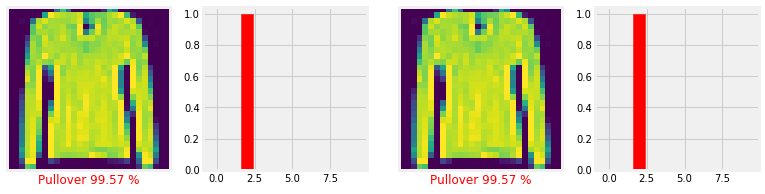

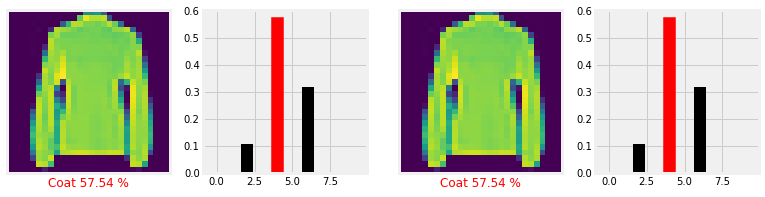

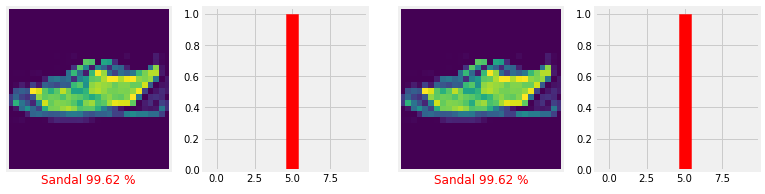

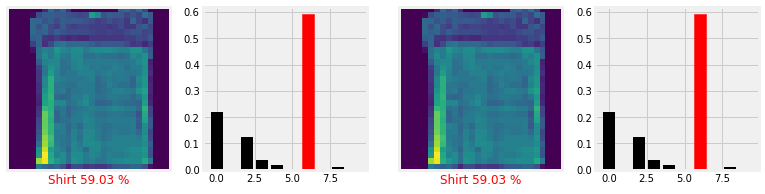

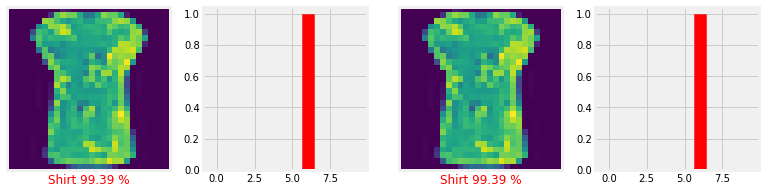

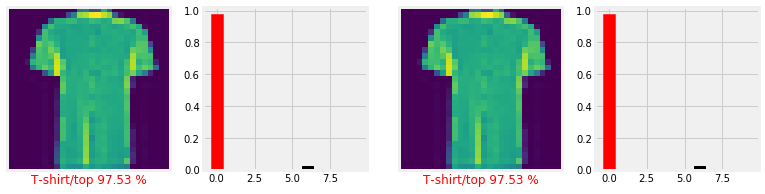

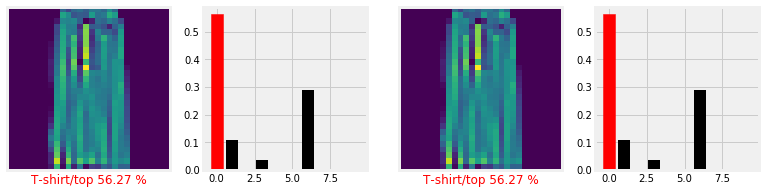

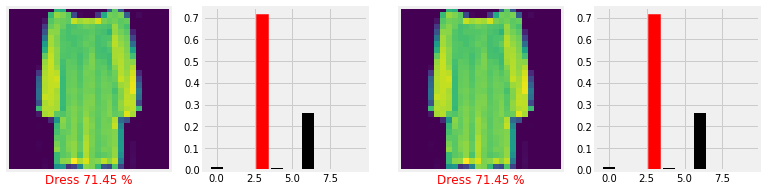

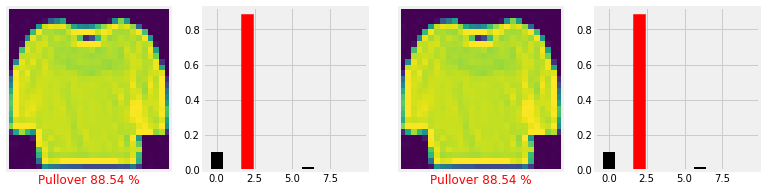

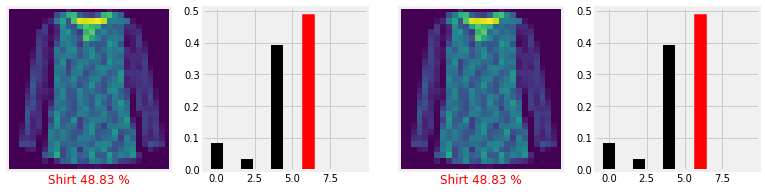

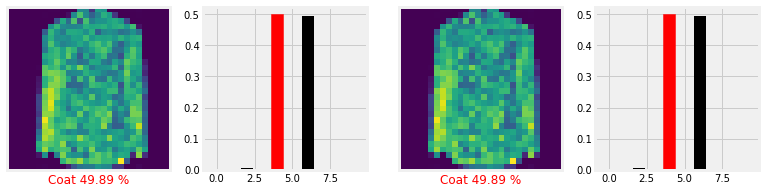

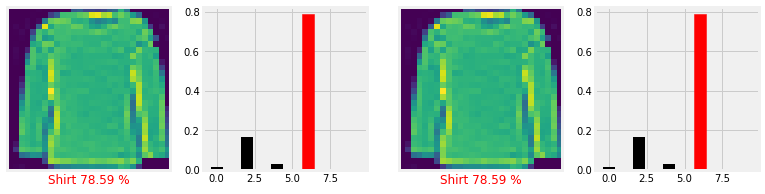

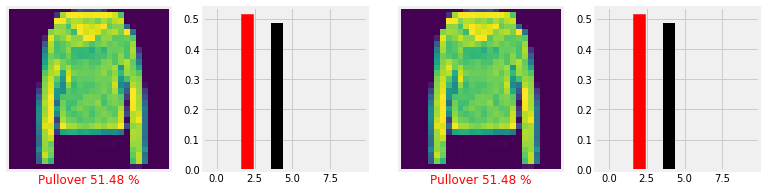

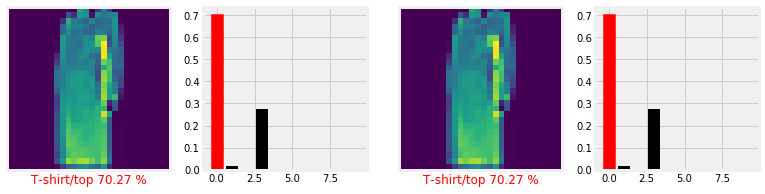

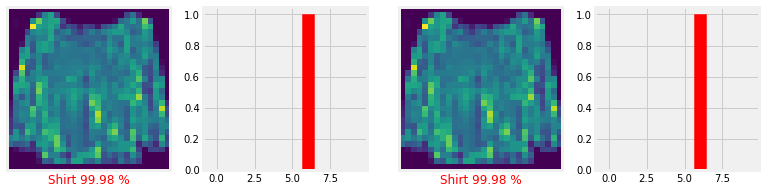

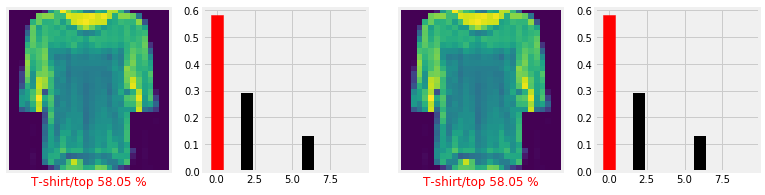

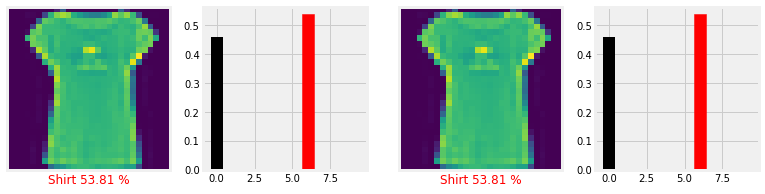

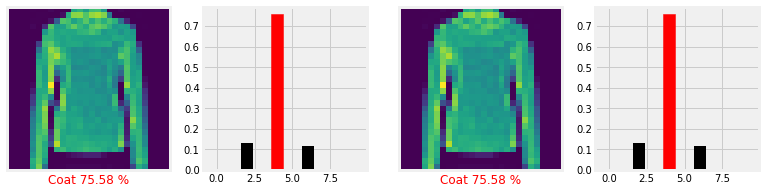

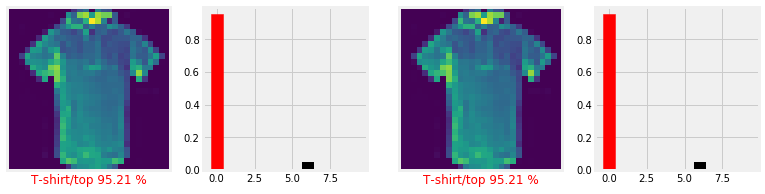

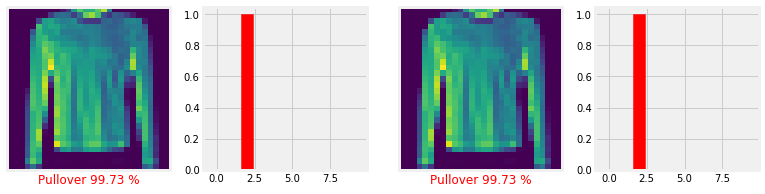

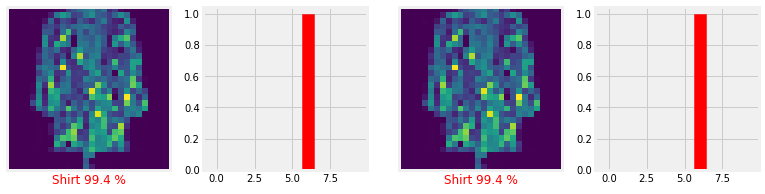

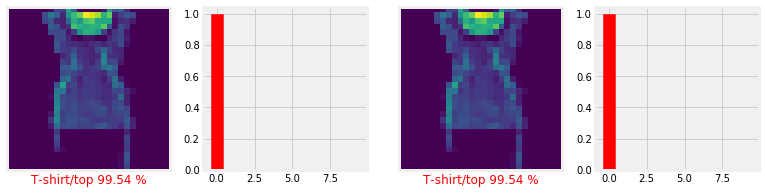

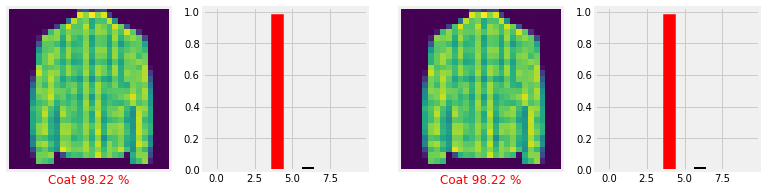

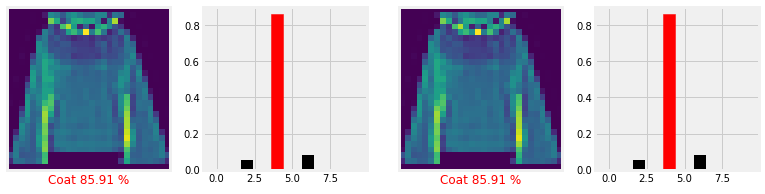

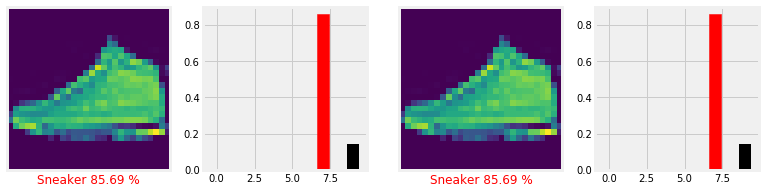

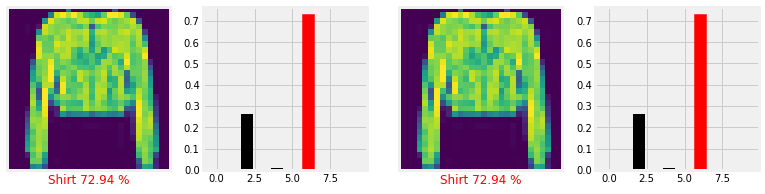

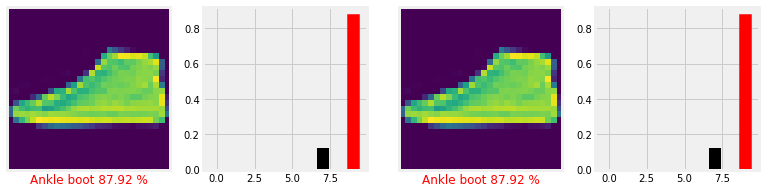

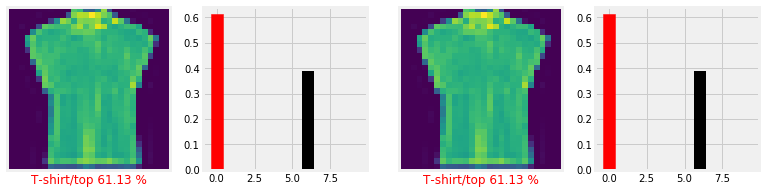

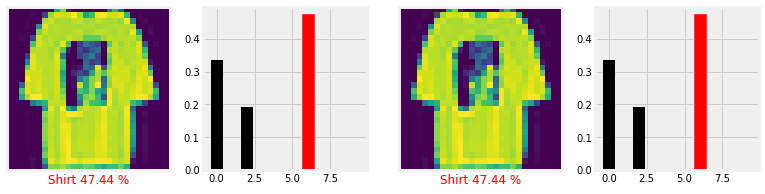

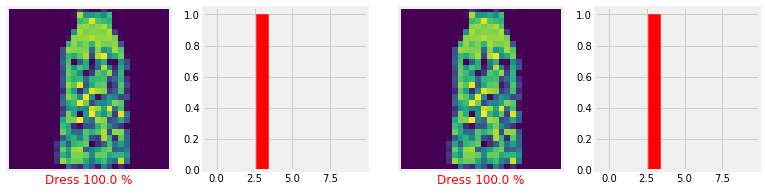

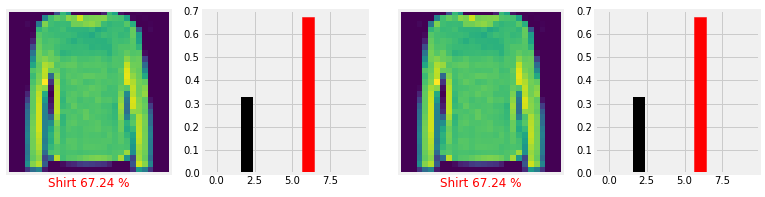

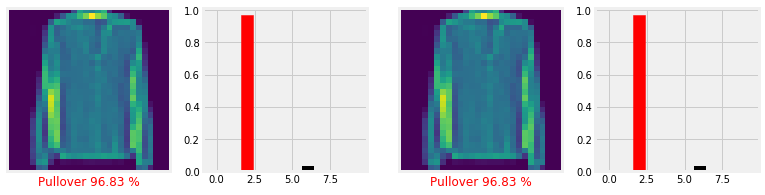

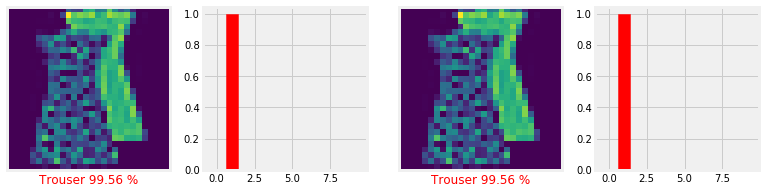

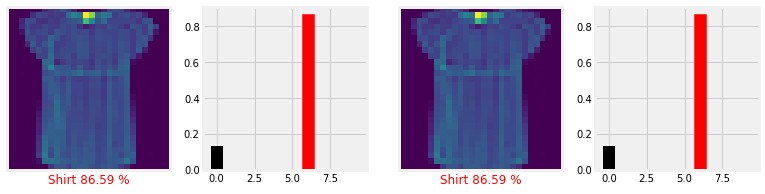

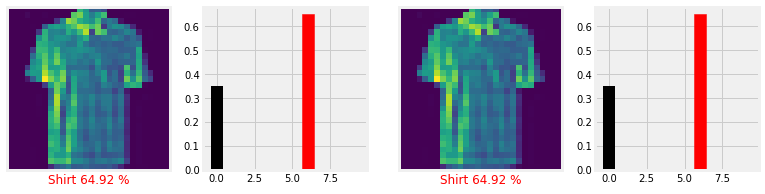

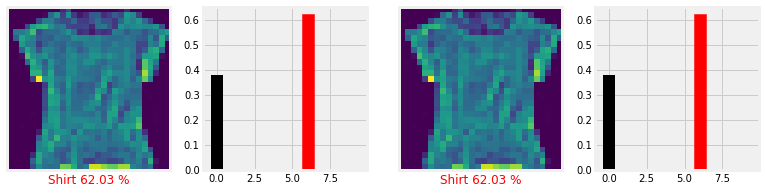

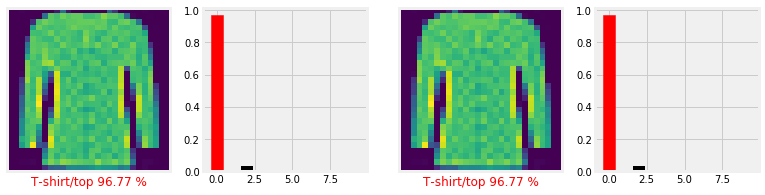

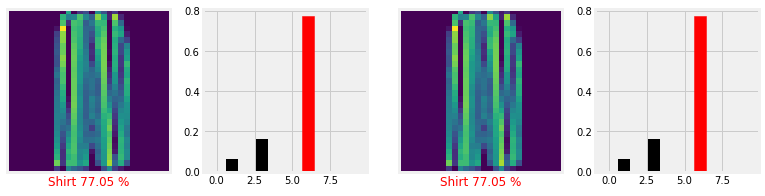

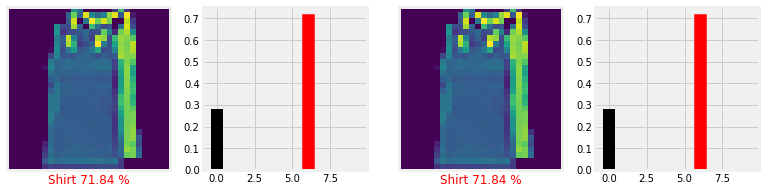

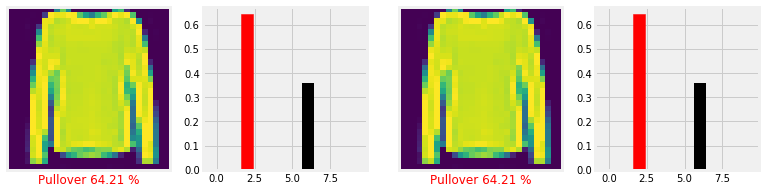

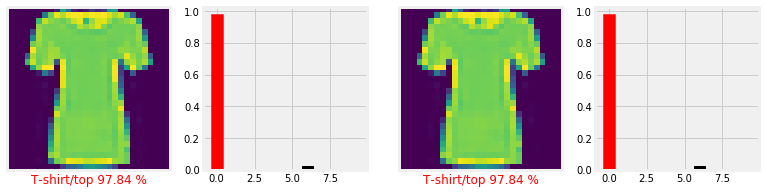

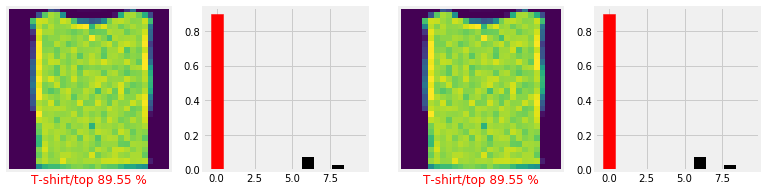

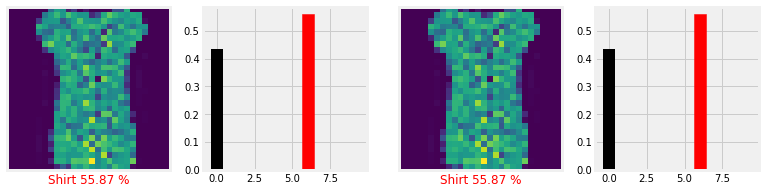

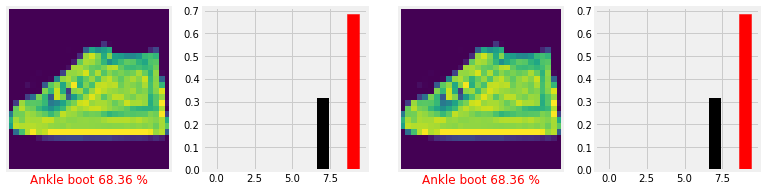

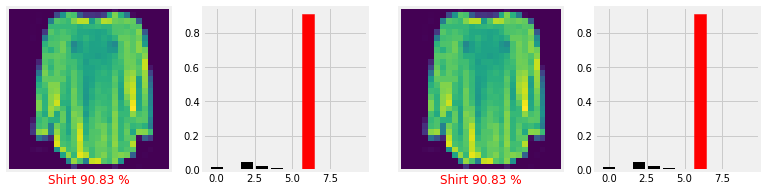

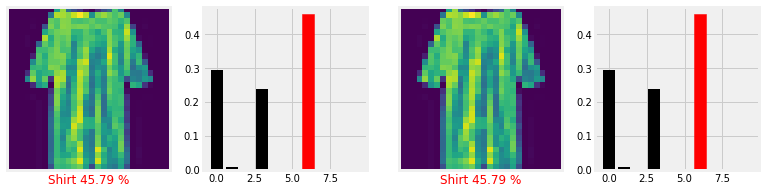

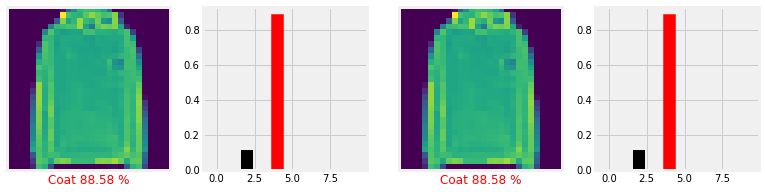

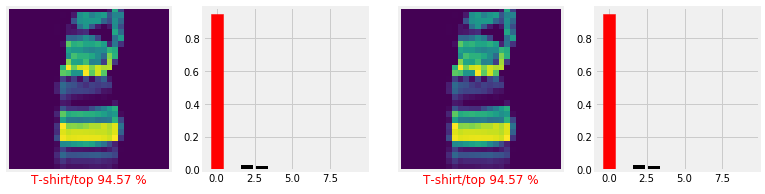

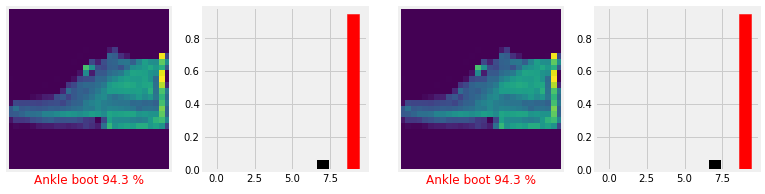

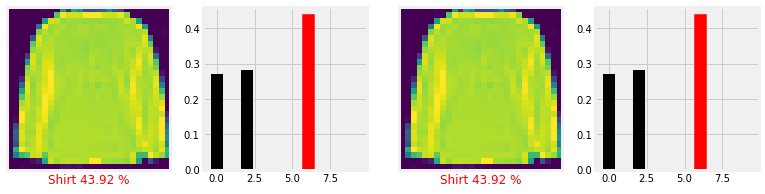

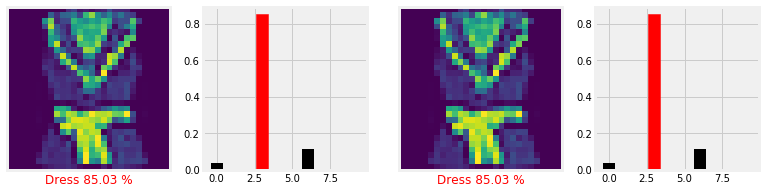

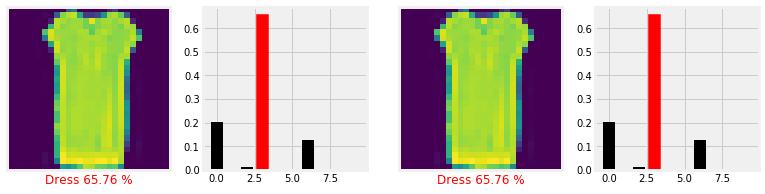

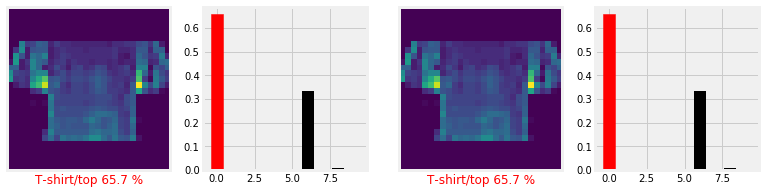

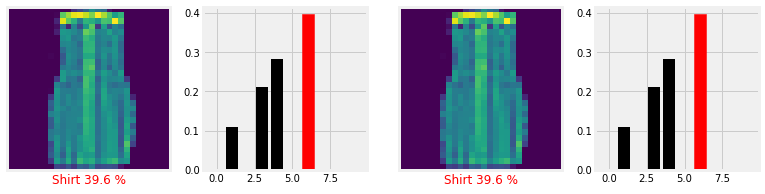

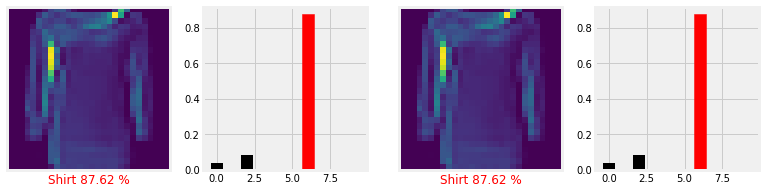

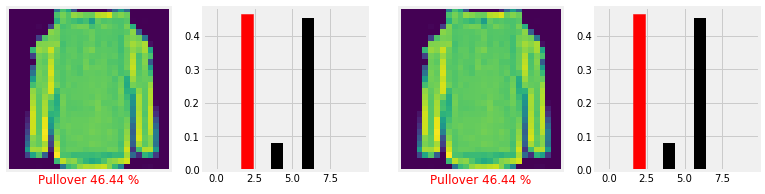

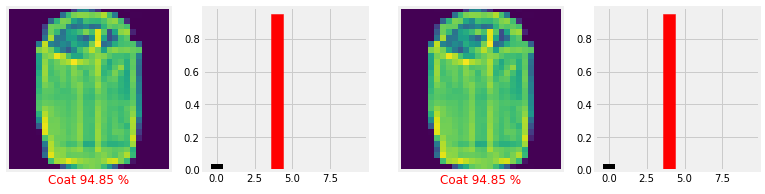

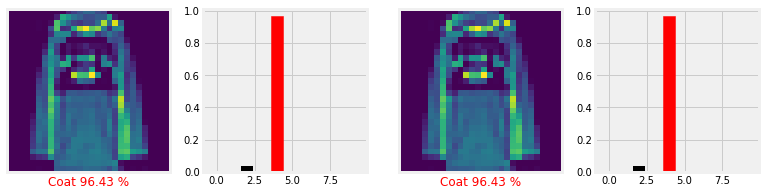

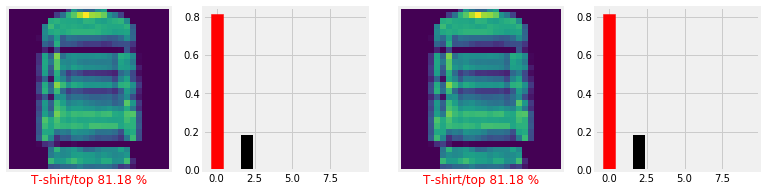

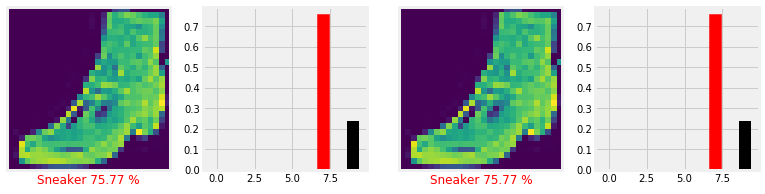

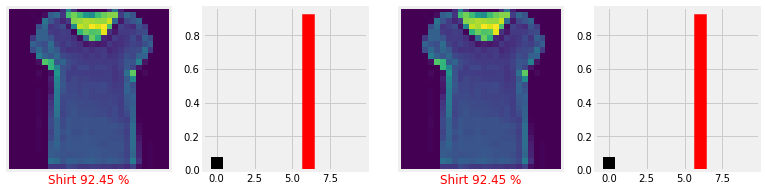

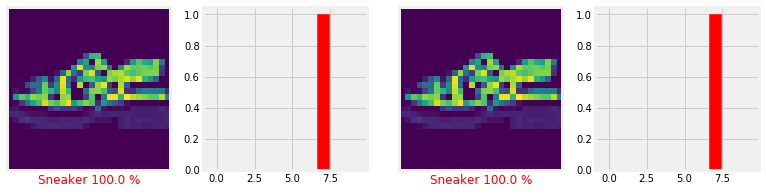

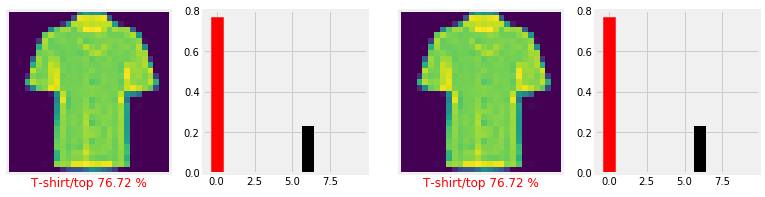

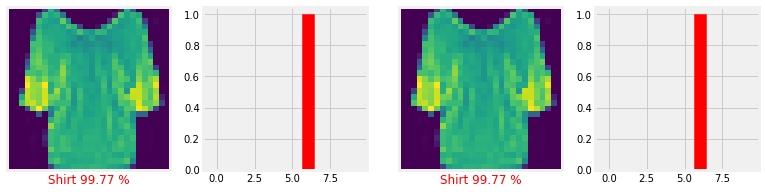

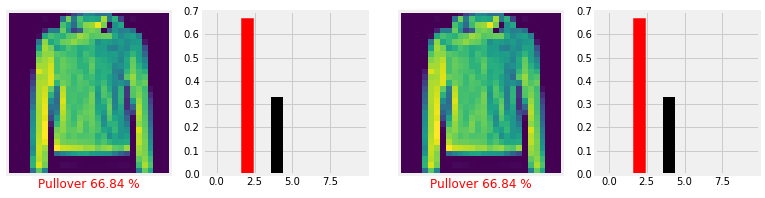

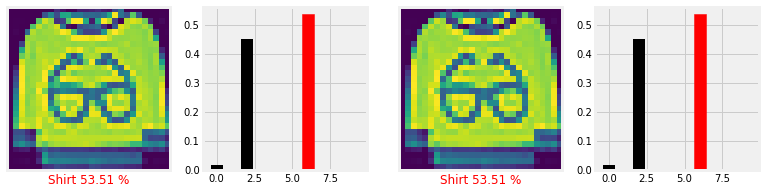

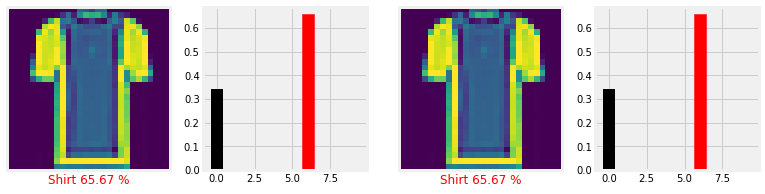

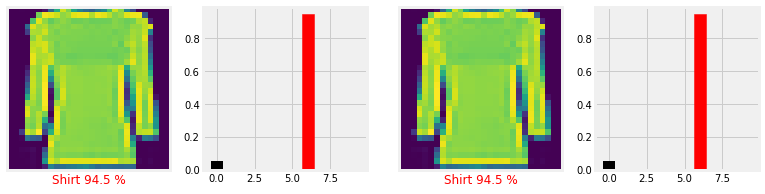

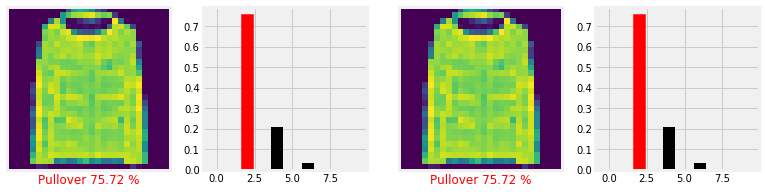

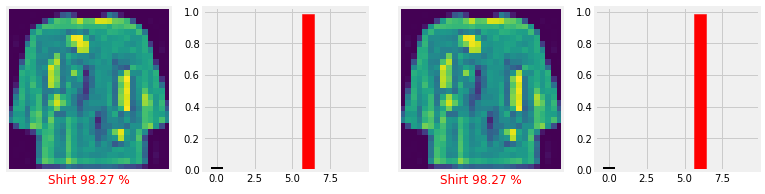

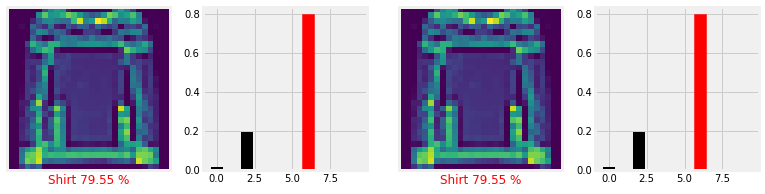

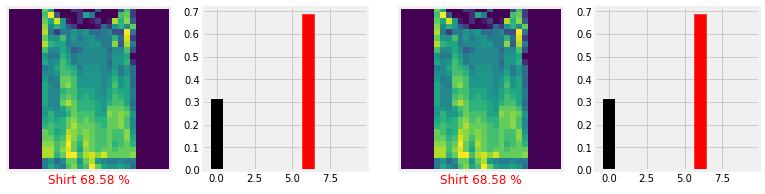

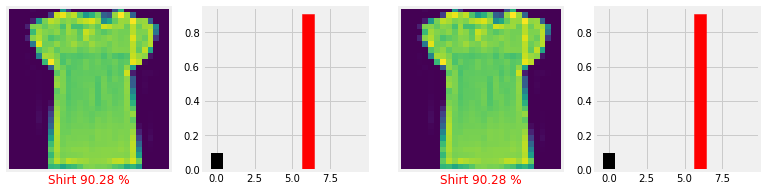

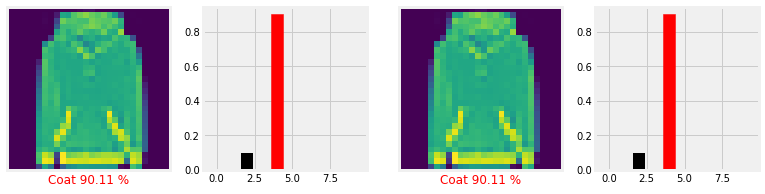

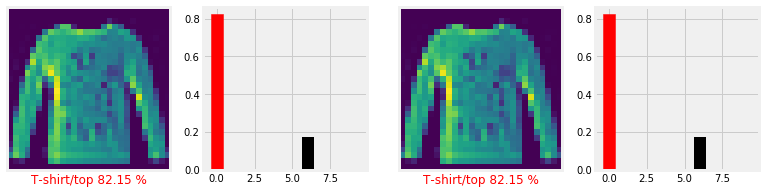

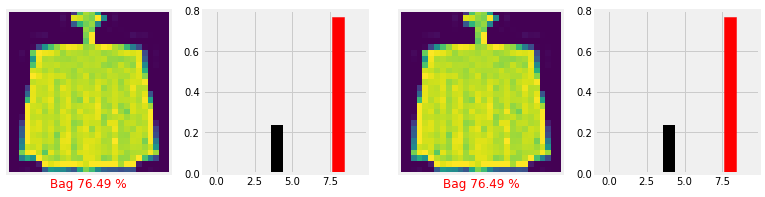

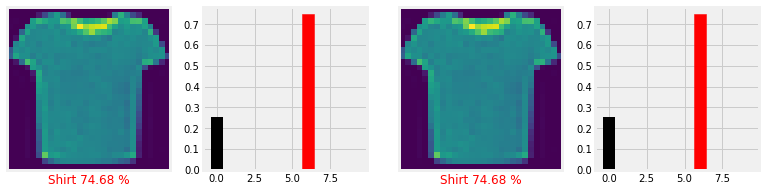

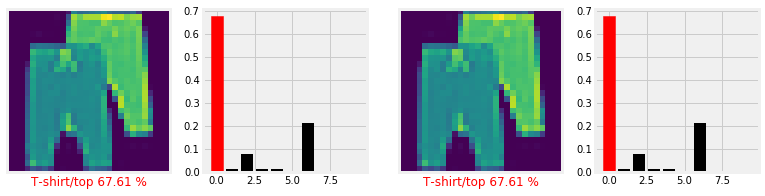

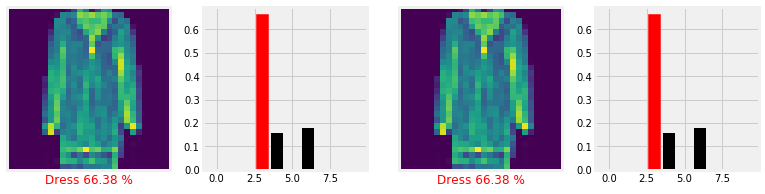

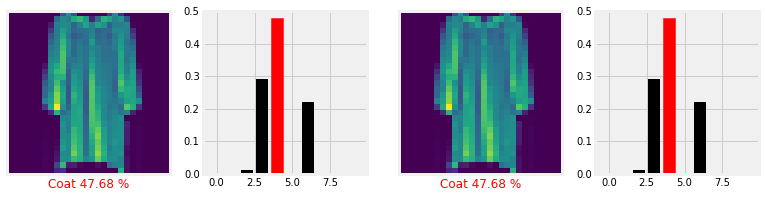

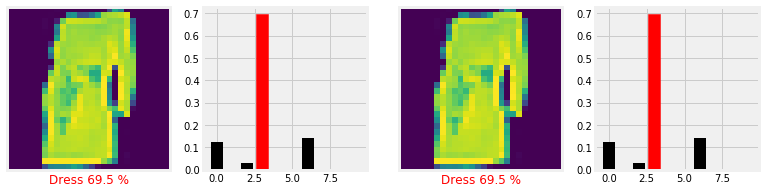

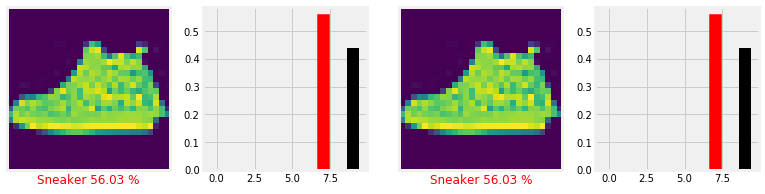

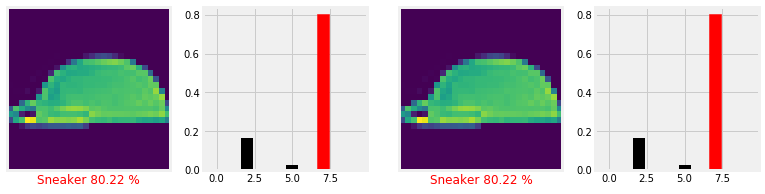

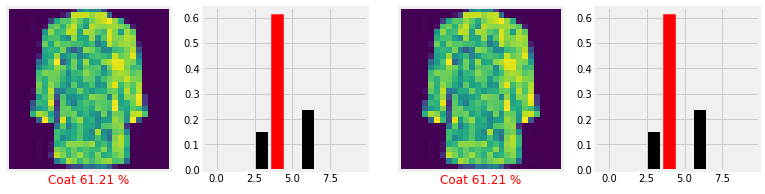

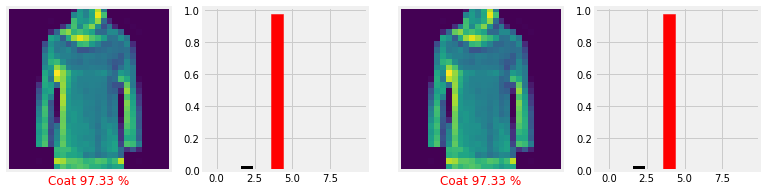

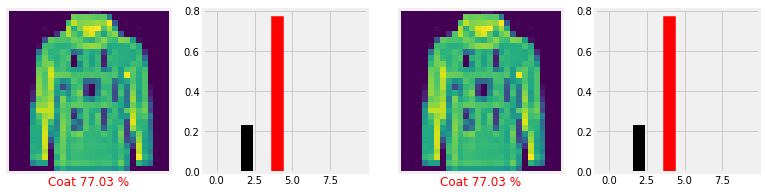

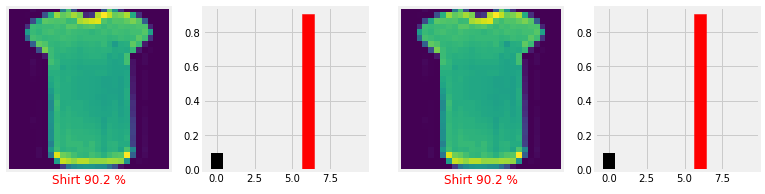

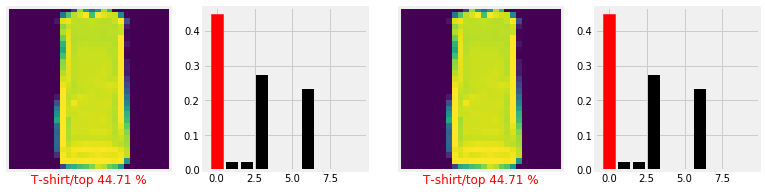

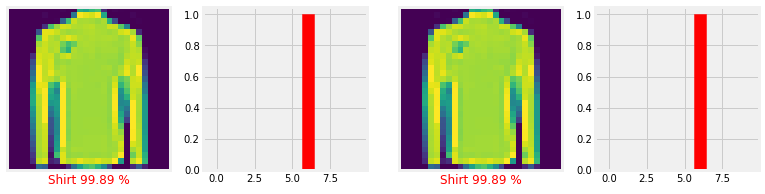

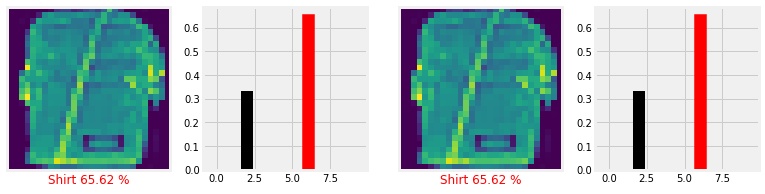

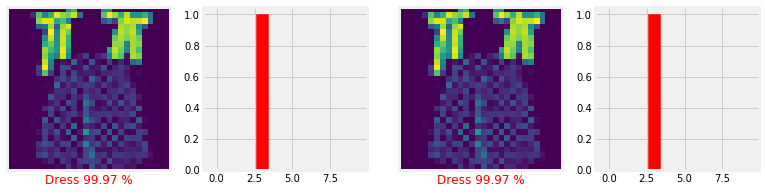

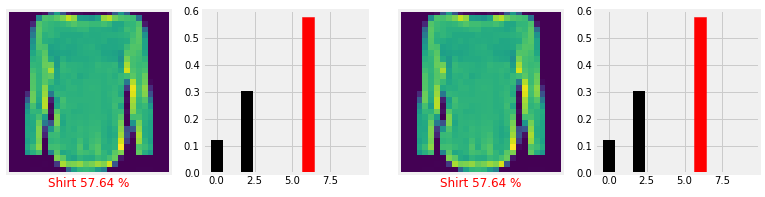

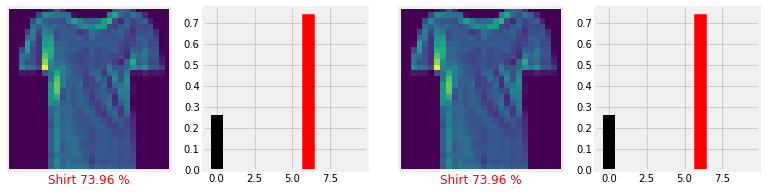

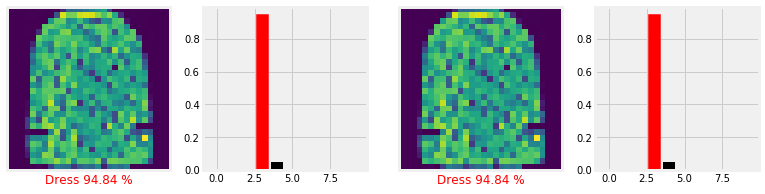

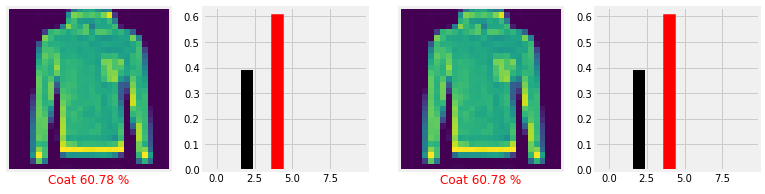

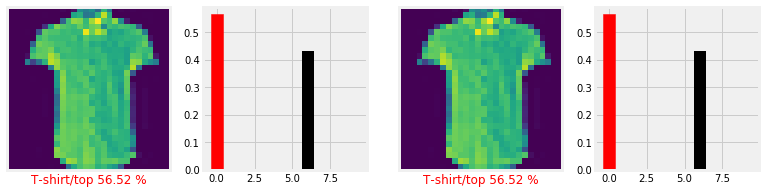

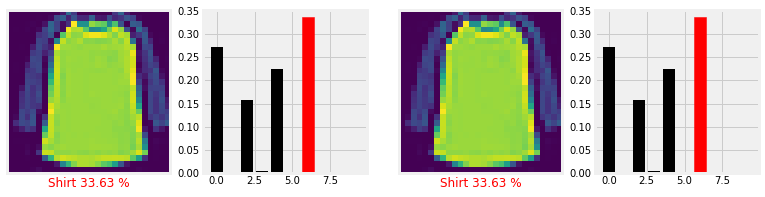

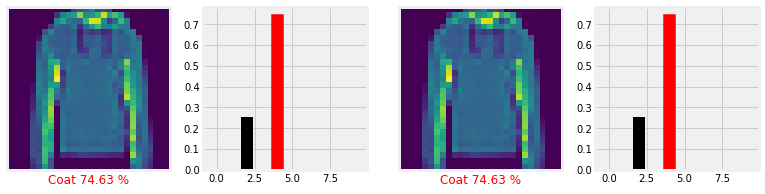

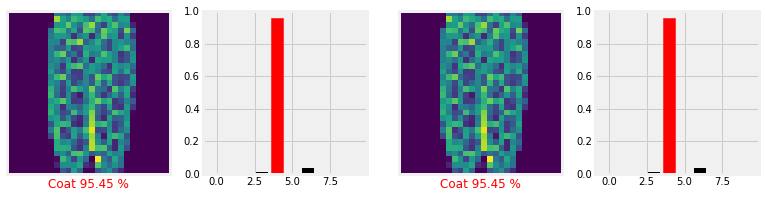

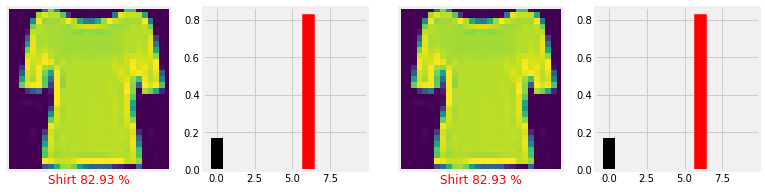

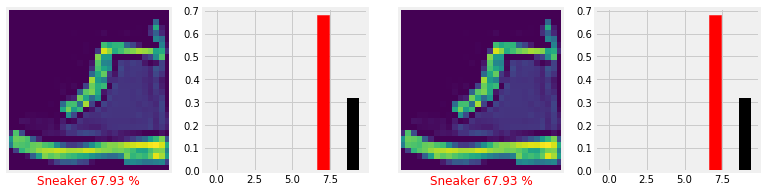

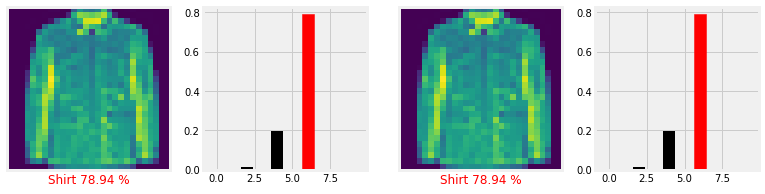

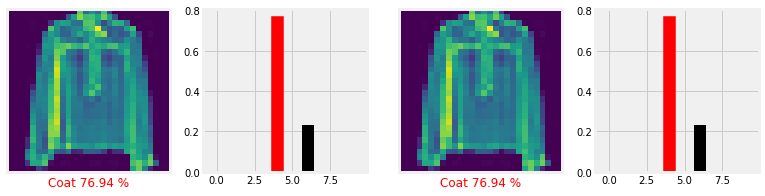

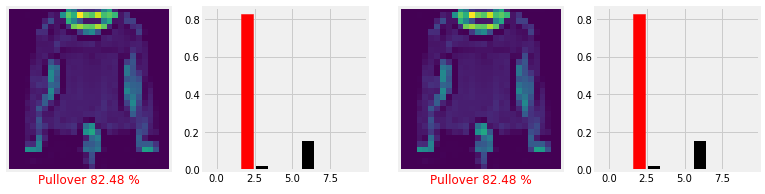

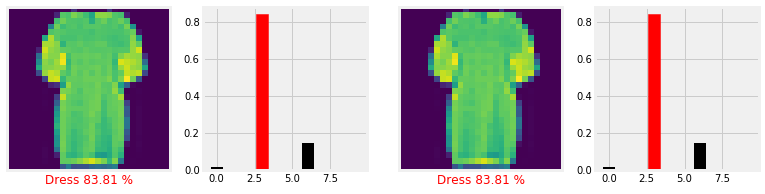

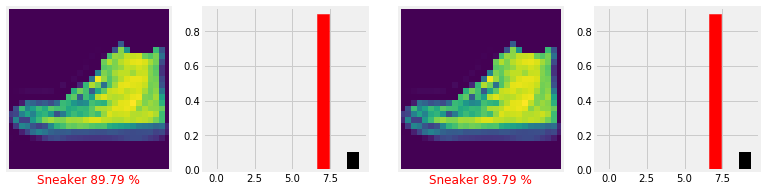

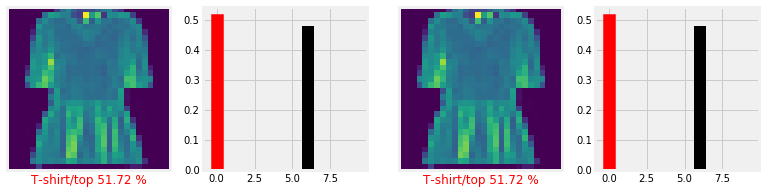

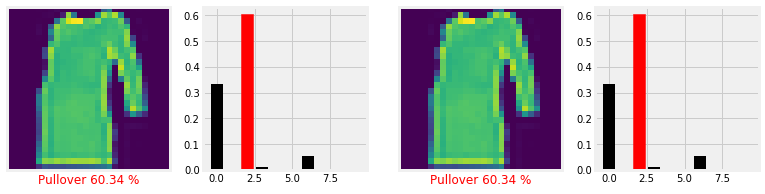

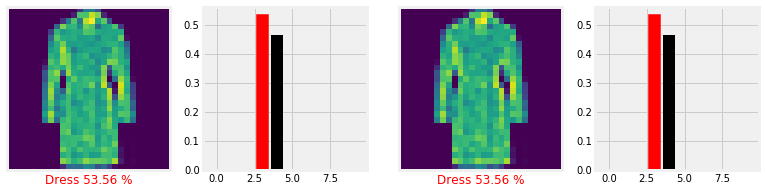

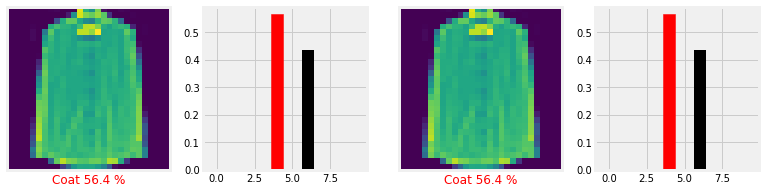

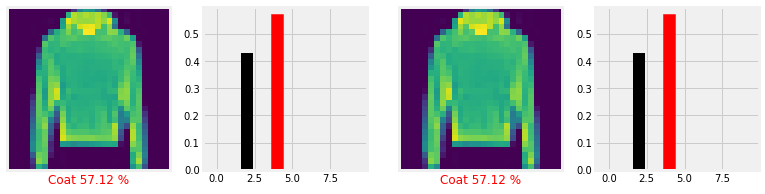

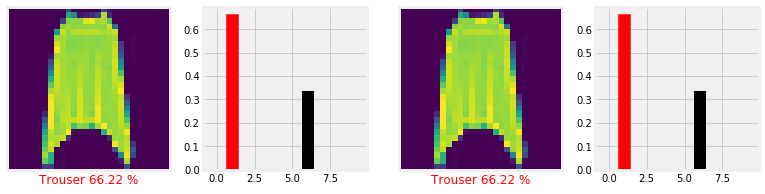

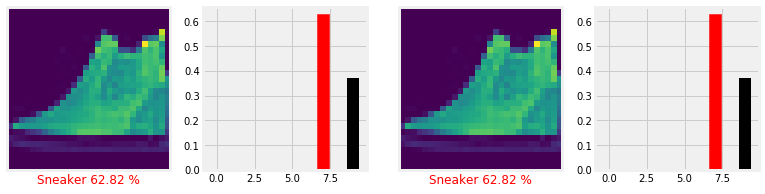

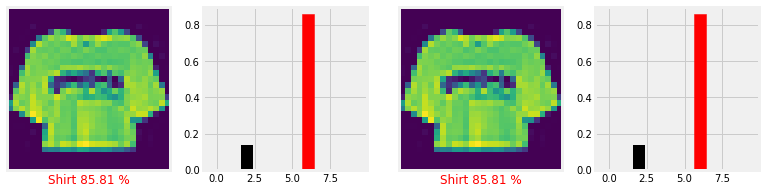

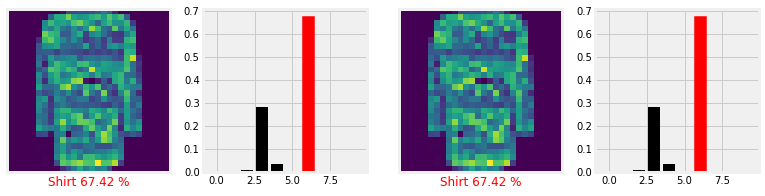

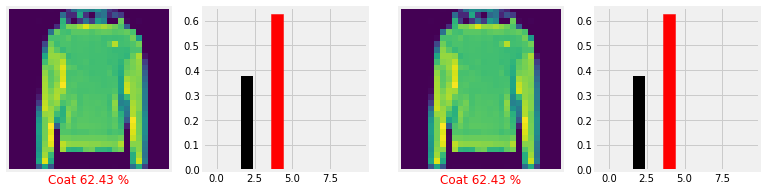

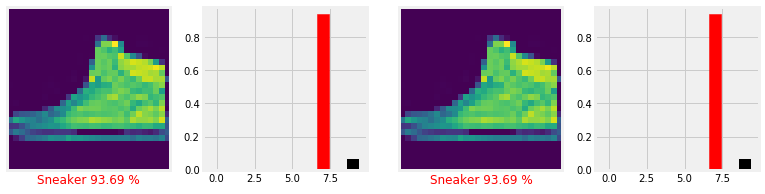

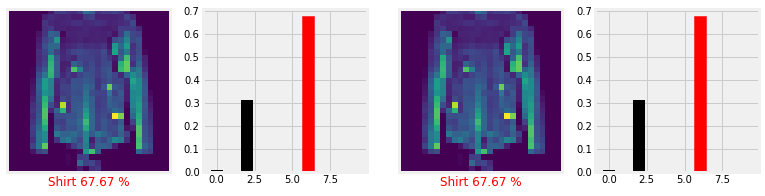

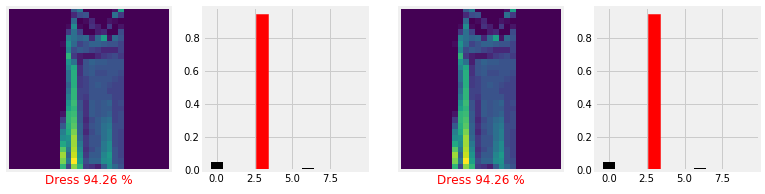

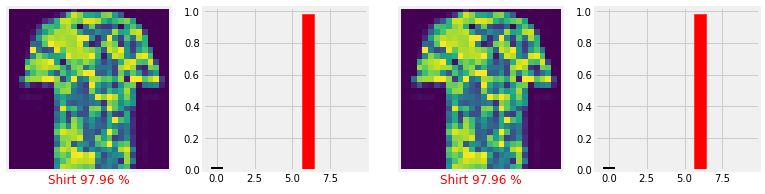

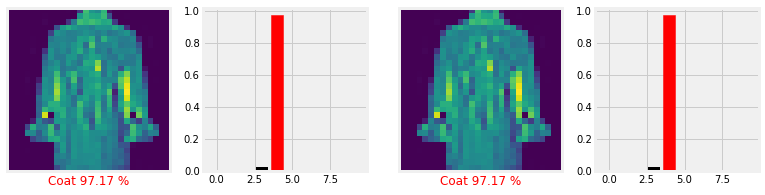

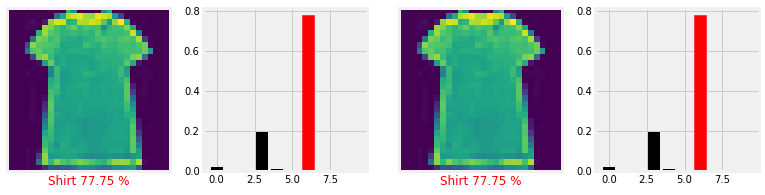

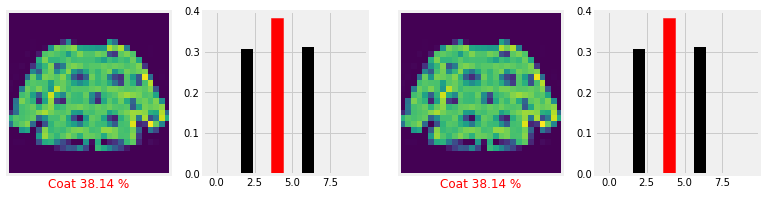

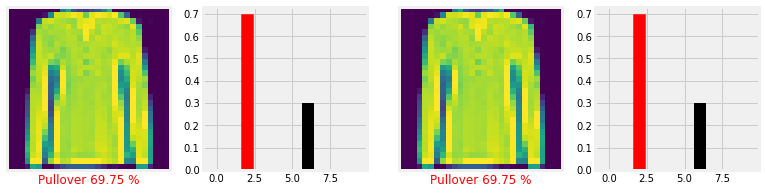

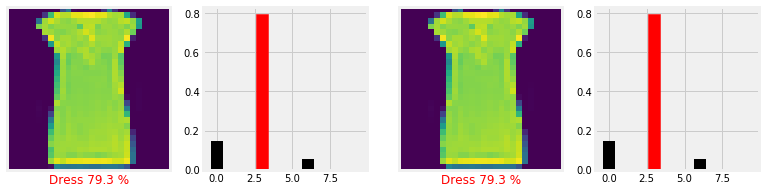

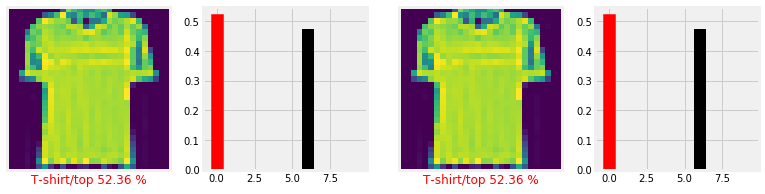

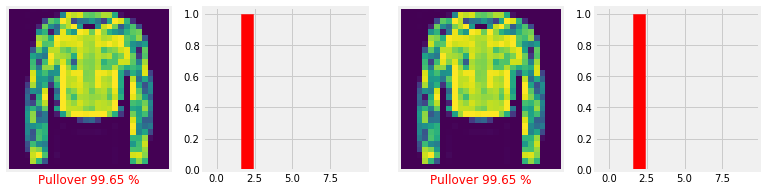

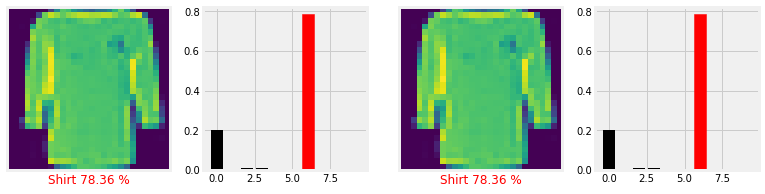

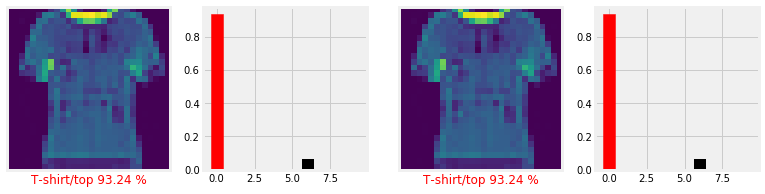

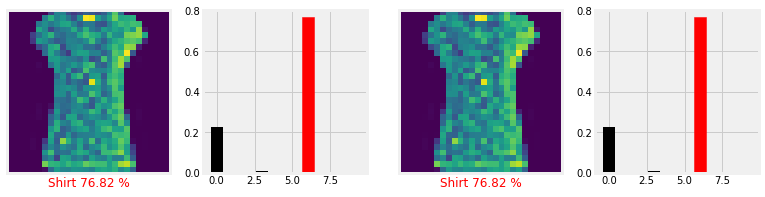

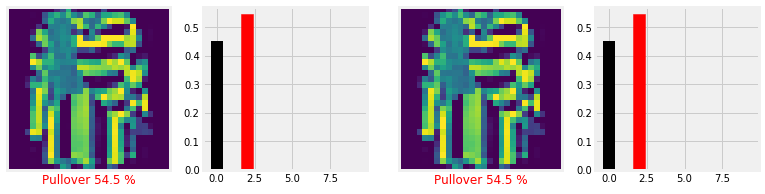

In [35]:
j=0
for i in wrong_predictions:
    plt.figure(figsize=(12,3))
    plt.subplot(1,4,1)
    plottingphoto(i)
    plt.subplot(1,4,2)
    plottingbargraph(i)
    j=j+1
    plt.subplot(1,4,3)
    plottingphoto(i)
    plt.subplot(1,4,4)
    plottingbargraph(i)
    j=j+1
    plt.show()

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________
